# Итоговое задание по курсу «Продвинутая визуализация данных»

## Введение

Сегодня мы будем работать над заключительным заданием в курсе. Оно суммирует всю информацию, которую мы изучали на наших занятиях.

**Цель задания** — сегментировать клиентов в датасете и предсказать эффективность маркетинговых стратегий.

Вас ждет 5 заданий:

1. Настройка визуализаций.

2. EDA.

3. Кластеризация пользователей.

4. Поиск аномалий.

5. Построение модели логистической регрессии.

Критерии оценивания указаны в каждом задании.
Помните, что каждый график должен быть оформлен, иметь подписанные оси, название, смысл и передавать новую информацию.

Для сдачи задания загрузите на платформу исправленный файл Jupyter Notebook.

## Описание датасета

Мы будем работать [над датасетом по сегментации клиентов банка](https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering). Вот какое официальное описание датасета дается авторами:

«Анализ личности клиента включает в себя тщательное изучение оптимальных профилей клиентов компании. Этот анализ способствует более глубокому пониманию клиентов, позволяя компаниям адаптировать продукты для удовлетворения различных потребностей, поведения и озабоченностей различных типов клиентов.

Проводя анализ личности клиента, предприятия могут совершенствовать свои продукты на основе предпочтений конкретных сегментов клиентов. Вместо того чтобы выделять ресурсы для продвижения нового продукта по всей базе данных клиентов, компании могут определить сегменты, которые, скорее всего, будут заинтересованы в продукте. Впоследствии целенаправленные маркетинговые усилия могут быть направлены на эти конкретные сегменты, оптимизируя использование ресурсов и повышая вероятность успешного внедрения продукта».

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px


Импортируем наш датасет и начнем работу:

In [ ]:
customers = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_05_visualization/customer_segmentation.csv')
customers

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [ ]:
df = customers.copy()

## Задание 1. Подготовка к работе (3 балла)

Перед работой с датасетом кастомизируйте отображение в библиотеках `matplotlib` и `seaborn`:
- Выберите любую кастомную палетку из доступных дизайнов этих библиотек. Используйте ее во время выполнения всего задания.
- Уберите отображение рамок со всех сторон графиков.
- Добавьте сетку на фон графиков (`grid`).

**Критерии оценивания:**

* Один балл за выполнение каждого пункта.

### Решение задания 1

In [ ]:
# Your code

# Выбор кастомной палитры
custom_palette = "husl"  # для начала посмотрим вот эту

# Применение палитры в seaborn
sns.set_palette(custom_palette)

# Убрать рамки со всех сторон графиков
sns.set_style("white")  # Устанавливаем стиль без рамок

# Добавление сетки на фон графиков
sns.set_style("whitegrid")  # Добавляем сетку на фон

# Теперь можно продолжить работу с данными и созданием графиков


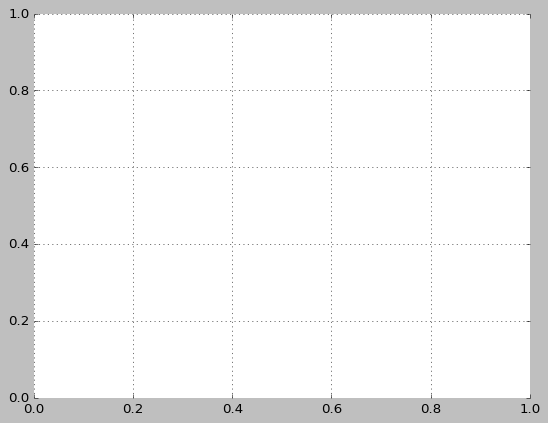

In [ ]:
# Выбор кастомной палитры для matplotlib
custom_palette_plt = "Accent"  # Пример палитры, можно выбрать любую другую доступную для plt

# Применение палитры в matplotlib
plt.style.use('classic')  # Используем стиль seaborn, чтобы включить выбранную палитру
palette = plt.get_cmap(custom_palette_plt)
colors = [palette(i) for i in range(8)]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors) # Применяем выбранную палитру

# Убрать рамки со всех сторон графиков
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

# Добавление сетки на фон графиков
plt.grid(True)

# Теперь можно продолжить работу с данными и созданием графиков с использованием plt

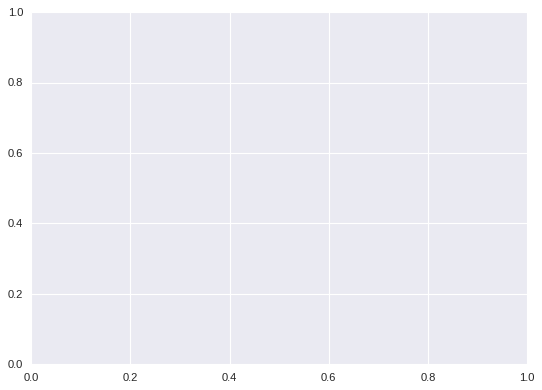

In [ ]:
# Выбор кастомной палитры для matplotlib
custom_palette_plt = "Accent"  # Пример палитры, можно выбрать любую другую доступную для plt

# Применение палитры в matplotlib
plt.style.use('seaborn-v0_8')  # Используем стиль seaborn, чтобы включить выбранную палитру
palette = plt.get_cmap(custom_palette_plt)
colors = [palette(i) for i in range(8)]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors) # Применяем выбранную палитру

# Убрать рамки со всех сторон графиков
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

# Добавление сетки на фон графиков
plt.grid(True)

# Теперь можно продолжить работу с данными и созданием графиков с использованием plt



## Задание 2. Описать датасет, основываясь на результатах EDA и визуализациях (15 баллов)
- Проведите разведанализ данных: проверьте наличие пропущенных значений и выбросов.
- Очистите данные при необходимости.
- Визуализируйте распределение всех характеристик клиентов (например, их возраст и доход) с помощью гистограмм и ящиков с усами.
- Исследуйте зависимость между образованием (`Education`) и суммой, потраченной на вино (`MntWines`). Подберите необходимый график и проанализируйте полученные результаты.
- Создайте поле (`plt.subplots()`) из нескольких графиков. Сделайте выводы из каждого сделанного графика.
- Создайте матрицу корреляции для числовых переменных и визуализируйте ее с помощью тепловой карты. Какие зависимости вам удалось обнаружить?

**Критерии оценивания**:

* Описаны основные черты датасета: распределения, выбросы, внутренняя структура переменных — 4 балла.
* Распределение характеристик визуализировано минимум двумя видами графиков — 2 балла.
* Графики, описывающие ключевые выводы, собраны в единое полотно — 1 балл.
* Вывод о свойствах датасета основан на визуализациях и данных — 2 балла.
* Выявлена зависимость между `Education` и `MntWines`. Обоснование опирается на корректный график — 3 балла.
* Использовано 6 разных типов графиков при анализе датасета — 1 балл.
* Выявлены и обоснованы все значимые корреляции между числовыми признаками — 2 балла.

### Проведите разведанализ данных:

In [ ]:
df.shape

(2240, 29)

Итак у нас 2240 строк и 29 столбцов

In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

Данные подгрузились корректно, посмотрим на них повнимательнее

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Итак у нас 1 столбец числа с плавающей точкой, 3 объектовых, и 25 целочисленных, хотя что то подсказывает что там зарыт булевый тип. Что бы понять это и вообще что бы адекватно работать с набором данных нужно понимать что означают наши признаки и очень хорошо что на сайте kaggle есть его описание - переведем его на русский и внимально изучим

* Id: Уникальный идентификатор для каждого человека в наборе данных
* Year_Birth: Год рождения человека.
* Education: Наивысший уровень образования, полученный человеком.
* Marital_Status: Семейное положение человека.
* Income: Годовой доход человека.
* Kidhome: Количество маленьких детей в семье.
* Teenhome: Количество подростков в семье.
* Dt_Customer: Дата, когда клиент был впервые зарегистрирован или стал частью базы данных компании.
* Recency: Количество дней, прошедших с момента последней покупки или взаимодействия.
* MntWines: Сумма, потраченная на вина.
* MntFruits: Сумма, потраченная на фрукты.
* MntMeatProducts: Сумма, потраченная на мясные продукты.
* MntFishProducts: Сумма, потраченная на рыбные продукты.
* MntSweetProducts: Сумма, потраченная на сладости.
* MntGoldProds: Сумма, потраченная на золото (роскошь).
* NumDealsPurchases: Количество покупок, совершенных со скидкой или в рамках акций.
* NumWebPurchases: Количество покупок, совершенных через сайт компании.
* NumCatalogPurchases: Количество покупок, совершенных через каталоги.
* NumStorePurchases: Количество покупок, совершенных в магазинах.
* NumWebVisitsMonth: Количество посещений веб-сайта компании за месяц.
* AcceptedCmp3: двоичный показатель (1 или 0) того, принял ли человек третью маркетинговую кампанию.
* AcceptedCmp4: двоичный показатель (1 или 0) того, принял ли человек четвертую маркетинговую кампанию.
* AcceptedCmp5: двоичный показатель (1 или 0) того, принял ли человек пятую маркетинговую кампанию.
* AcceptedCmp1: двоичный показатель (1 или 0) того, принял ли человек первую маркетинговую кампанию.
* AcceptedCmp2: двоичный показатель (1 или 0) того, принял ли человек вторую маркетинговую кампанию.
* Complain: Двоичный индикатор (1 или 0), подавал ли человек жалобу
* Z_CostContact: Постоянная стоимость, связанная с контактом с клиентом.
* Z_Revenue: Постоянный доход, связанный с успешным ответом на кампанию.
* Response: Двоичный показатель (1 или 0) того, ответил ли человек на маркетинговую кампанию.

Итак на первый взгляд есть очень значимые характеристики, мы были правы есть и булевые значения, но пусть они останутся в формате int, моделям так удобнее, а вот дату первого контакта так сказать и дату рождения необходимо обязательно привести в формат даты и потом что нибудь из нее придумать

In [ ]:
# Преобразование столбца Dt_Customer в формат даты
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
print(df['Dt_Customer'].dtype)

datetime64[ns]


In [ ]:
# Преобразование столбца Year_Birth в формат даты с указанием только года
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

In [ ]:
print(df['Year_Birth'].dtype)

datetime64[ns]


Формат даты хорошо можно использовать в графиках и в моделях, которые ориентируются на временные ряды, у нас же это признак в котором как нам кажется есть значимые значения (простите за товтологию) и нам их надо вытащить. На мой взгляд из даты рождения правильным будет вытащить примерный возраст а из даты первого контакта - продолжительность то есть скоко уже времени компания знает клиента.

In [ ]:
df['Age'] = 2024 - df['Year_Birth'].dt.year.astype('int')

In [ ]:
import datetime

current_date = datetime.datetime.now().strftime('%d-%m-%Y')
print(current_date)

17-05-2024


In [ ]:
current_date = pd.to_datetime(current_date, format='%d-%m-%Y')

In [ ]:
df['Dating_time'] = (current_date - df['Dt_Customer'])

In [ ]:
delta_days = list()
for i in df['Dating_time']:
   delta_days.append(i.days)

In [ ]:
df['Dating_time'] = delta_days

In [ ]:
df.head()

ID Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524 1957-01-01  Graduation         Single  58138.0        0         0   
1  2174 1954-01-01  Graduation         Single  46344.0        1         1   
2  4141 1965-01-01  Graduation       Together  71613.0        0         0   
3  6182 1984-01-01  Graduation       Together  26646.0        1         0   
4  5324 1981-01-01         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   Age  Dating_time  
0   67         4273  
1   70         3723  
2   59         3922  
3   40         3749  
4   43         3771  

[5 rows x 31 columns]

Теперь все нормально и можно продолжать

In [ ]:
# Установка параметров отображения pandas
pd.set_option('display.max_rows', None)  # Отображать все строки
pd.set_option('display.max_columns', None)  # Отображать все столбцы

In [ ]:
# посмотрим основные статистики по числовым признакам
df.describe()

ID                     Year_Birth         Income  \
count   2240.000000                           2240    2216.000000   
mean    5592.159821  1968-10-21 16:33:51.428571432   52247.251354   
min        0.000000            1893-01-01 00:00:00    1730.000000   
25%     2828.250000            1959-01-01 00:00:00   35303.000000   
50%     5458.500000            1970-01-01 00:00:00   51381.500000   
75%     8427.750000            1977-01-01 00:00:00   68522.000000   
max    11191.000000            1996-01-01 00:00:00  666666.000000   
std     3246.662198                            NaN   25173.076661   

           Kidhome     Teenhome                    Dt_Customer      Recency  \
count  2240.000000  2240.000000                           2240  2240.000000   
mean      0.444196     0.506250  2013-07-10 10:01:42.857142784    49.109375   
min       0.000000     0.000000            2012-07-30 00:00:00     0.000000   
25%       0.000000     0.000000            2013-01-16 00:00:00    24.000000   
50%       0.000000     0.000000            2013-07-08 12:00:00    49.000000   
75%       1.000000     1.000000            2013-12-30 06:00:00    74.000000   
max       2.000000     2.000000            2014-06-29 00:00:00    99.000000   
std       0.538398     0.544538                            NaN    28.962453   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   
std     336.597393    39.773434       225.715373        54.628979   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2240.000000   2240.000000        2240.000000      2240.000000   
mean          27.062946     44.021875           2.325000         4.084821   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   
std           41.280498     52.167439           1.932238         2.778714   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2240.000000        2240.000000        2240.000000   
mean              2.662054           5.790179           5.316518   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   
std               2.923101           3.250958           2.426645   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.072768      0.074554      0.072768      0.064286      0.013393   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   
std        0.259813      0.262728      0.259813      0.245316      0.114976   

          Complain  Z_CostContact  Z_Reven

In [ ]:
df.describe(include='object')

Education Marital_Status
count         2240           2240
unique           5              8
top     Graduation        Married
freq          1127            864

Итак что мы видим уже по этой описательной раскладке? Первое что бросается в глаза это минимальная дата рождения клиента 1893, если это не граф Друкула, то скорее всего это аномалия и дата указана фиктивно. Доход клиентов отличается довольно сильно, мы видим очень бедных 1700 и очень богатых 666666, но в середине между 1 и 3 квантилями прирост довольно равномерный и скорее всего реальный. Интересное также наблюдение что на вино люди в среднем тратят больше чем на все остальные фиксируемые виды товаров. Далее отметим что клиенты всетаки чуть больше склонны покупать товары в магазинах чем на сайте или по каталогу. Вполне понятно почему сумма на поддрежание контакта для всех клиентов одинакова и равно 3, а вот почему доход от всех одинаков и равен 11 это странно, возможно это константный признак (нужно будет посмотреть и дропнуть потому что они - константы обычно мешают). Наиболее встречаемый вид образования Gradueted их всего 5, а вот с супружеством странно 8 видов статуса и замужние / женатые хоть и составляют топ, но их всего 864 (нужно будет посмотреть какие варианты предусмотерны для интереса)

#### проверьте наличие пропущенных значений и выбросов.

<Axes: >

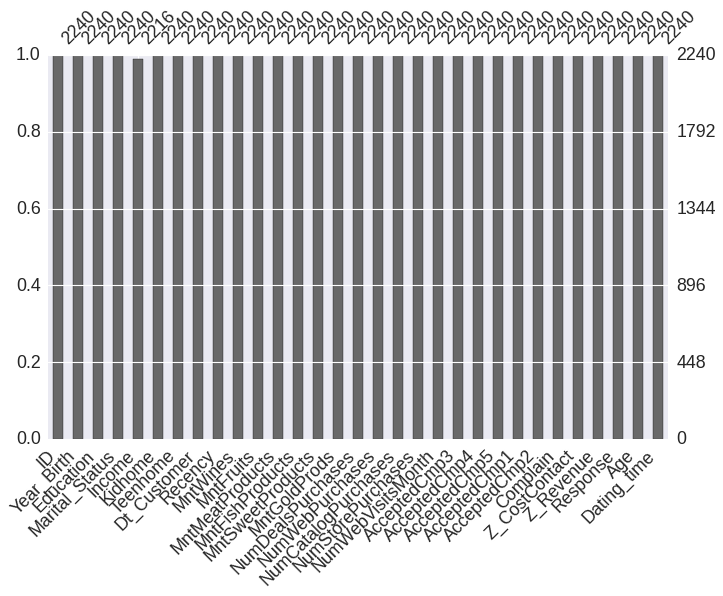

In [ ]:
msno.bar(df, figsize=(10, 6))

В данном случае визуализация не самый лучший вариат, столбец где пропущены значения приходилось искать глазами. Полэтом воспользуемся более привычным методом

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Dating_time             0
dtype: int64

У нас всего 24 пропуска в столбце доход, так то по хорошему их можно дропнуть признак кажется значимым, но у нас очено мало данных не будем без нужды еще сокращать набор, а лучше заполним медианным средним (с учетом наличия выброса среднее арефметическое нас уведет сильно право)

In [ ]:
mean_value = df['Income'].mean()
# думаю что медиана тут подойдет лучше
median_value = df['Income'].median()

print(f'Среднее значение = {mean_value}')
print(f'Медиана = {median_value}')

Среднее значение = 52247.25135379061
Медиана = 51381.5


Ну в целом мы видим что разница не большая - то есть не принципиальна каким значением заполнять пропуски

In [ ]:
# Заполнение пропущенных значений медианным / среднийм значением
df['Income'].fillna(value=median_value, inplace=True)
#df['Income'].fillna(value=mean_value, inplace=True)

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Dating_time            0
dtype: int64

Отлично, пропусков больше нет. Посмотрим на дубликаты

In [ ]:
duplicates = df[df.duplicated()]

if duplicates.empty:
    print("Дубликатов не найдено.")
else:
    print("Обнаружены дубликаты:")
    print(duplicates)

Дубликатов не найдено.


Как и обещал посмотрим на константы ну и вооще на количество ункальных значений

In [ ]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                                          columns = ['Column_name', 'Num_unique']).sort_values(by=['Num_unique'])

In [ ]:
constant = unique_counts['Column_name'][unique_counts['Num_unique'] == 1].to_list()

In [ ]:
# это список столбцов которые можно будет вызуализировать с помощью боксплотов, 2 значения 0 и 1 визуализировать таким способом бессмысленно
to_show = unique_counts['Column_name'][unique_counts['Num_unique'] > 2].to_list()

In [ ]:
constant

['Z_Revenue', 'Z_CostContact']

как и предполагалось ['Z_Revenue', 'Z_CostContact'] вот эти два столбцы одинаковы для всех записей, пользы в ML от них 0, их можно будет удалить (хотя иногда константа чудесным образом не портит а улучшает скор)

In [ ]:
unique_counts

Column_name  Num_unique
27            Z_Revenue           1
26        Z_CostContact           1
25             Complain           2
23         AcceptedCmp1           2
28             Response           2
22         AcceptedCmp5           2
21         AcceptedCmp4           2
20         AcceptedCmp3           2
24         AcceptedCmp2           2
5               Kidhome           3
6              Teenhome           3
2             Education           5
3        Marital_Status           8
18    NumStorePurchases          14
17  NumCatalogPurchases          14
16      NumWebPurchases          15
15    NumDealsPurchases          15
19    NumWebVisitsMonth          16
1            Year_Birth          59
29                  Age          59
8               Recency         100
10            MntFruits         158
13     MntSweetProducts         177
12      MntFishProducts         182
14         MntGoldProds         213
11      MntMeatProducts         558
30          Dating_time         663
7           Dt_Customer         663
9              MntWines         776
4                Income        1975
0                    ID        2240

#### Очистите данные при необходимости.

In [ ]:
# я решил избавиться от констант и ID они нам точно не понадобятся для визуализаций
df.drop(columns = constant, inplace=True)
df.drop(columns = 'ID', inplace=True)

#### Визуализируйте распределение всех характеристик клиентов (например, их возраст и доход) с помощью гистограмм и ящиков с усами.

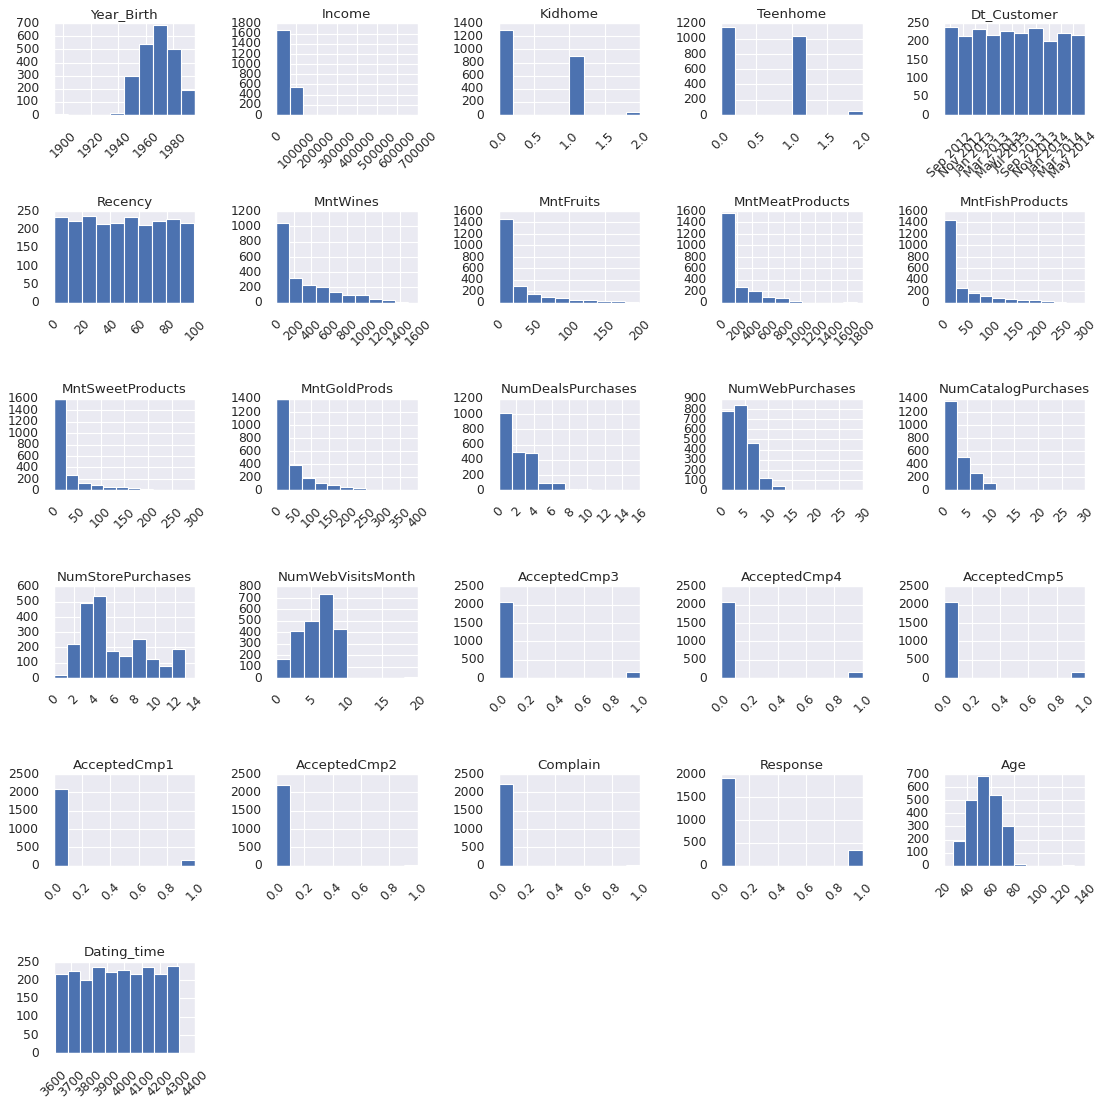

In [ ]:
# Установка размера фигуры и соотношения сторон
sns.set(rc={'figure.figsize': (14, 14)})

# Построение гистограмм
axes = df.hist()

# Развернуть значения по оси x для всех графиков
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Устанавливаем компактное расположение графиков
plt.show()

<ipython-input-37-bd1c4bebee80>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 4, i)


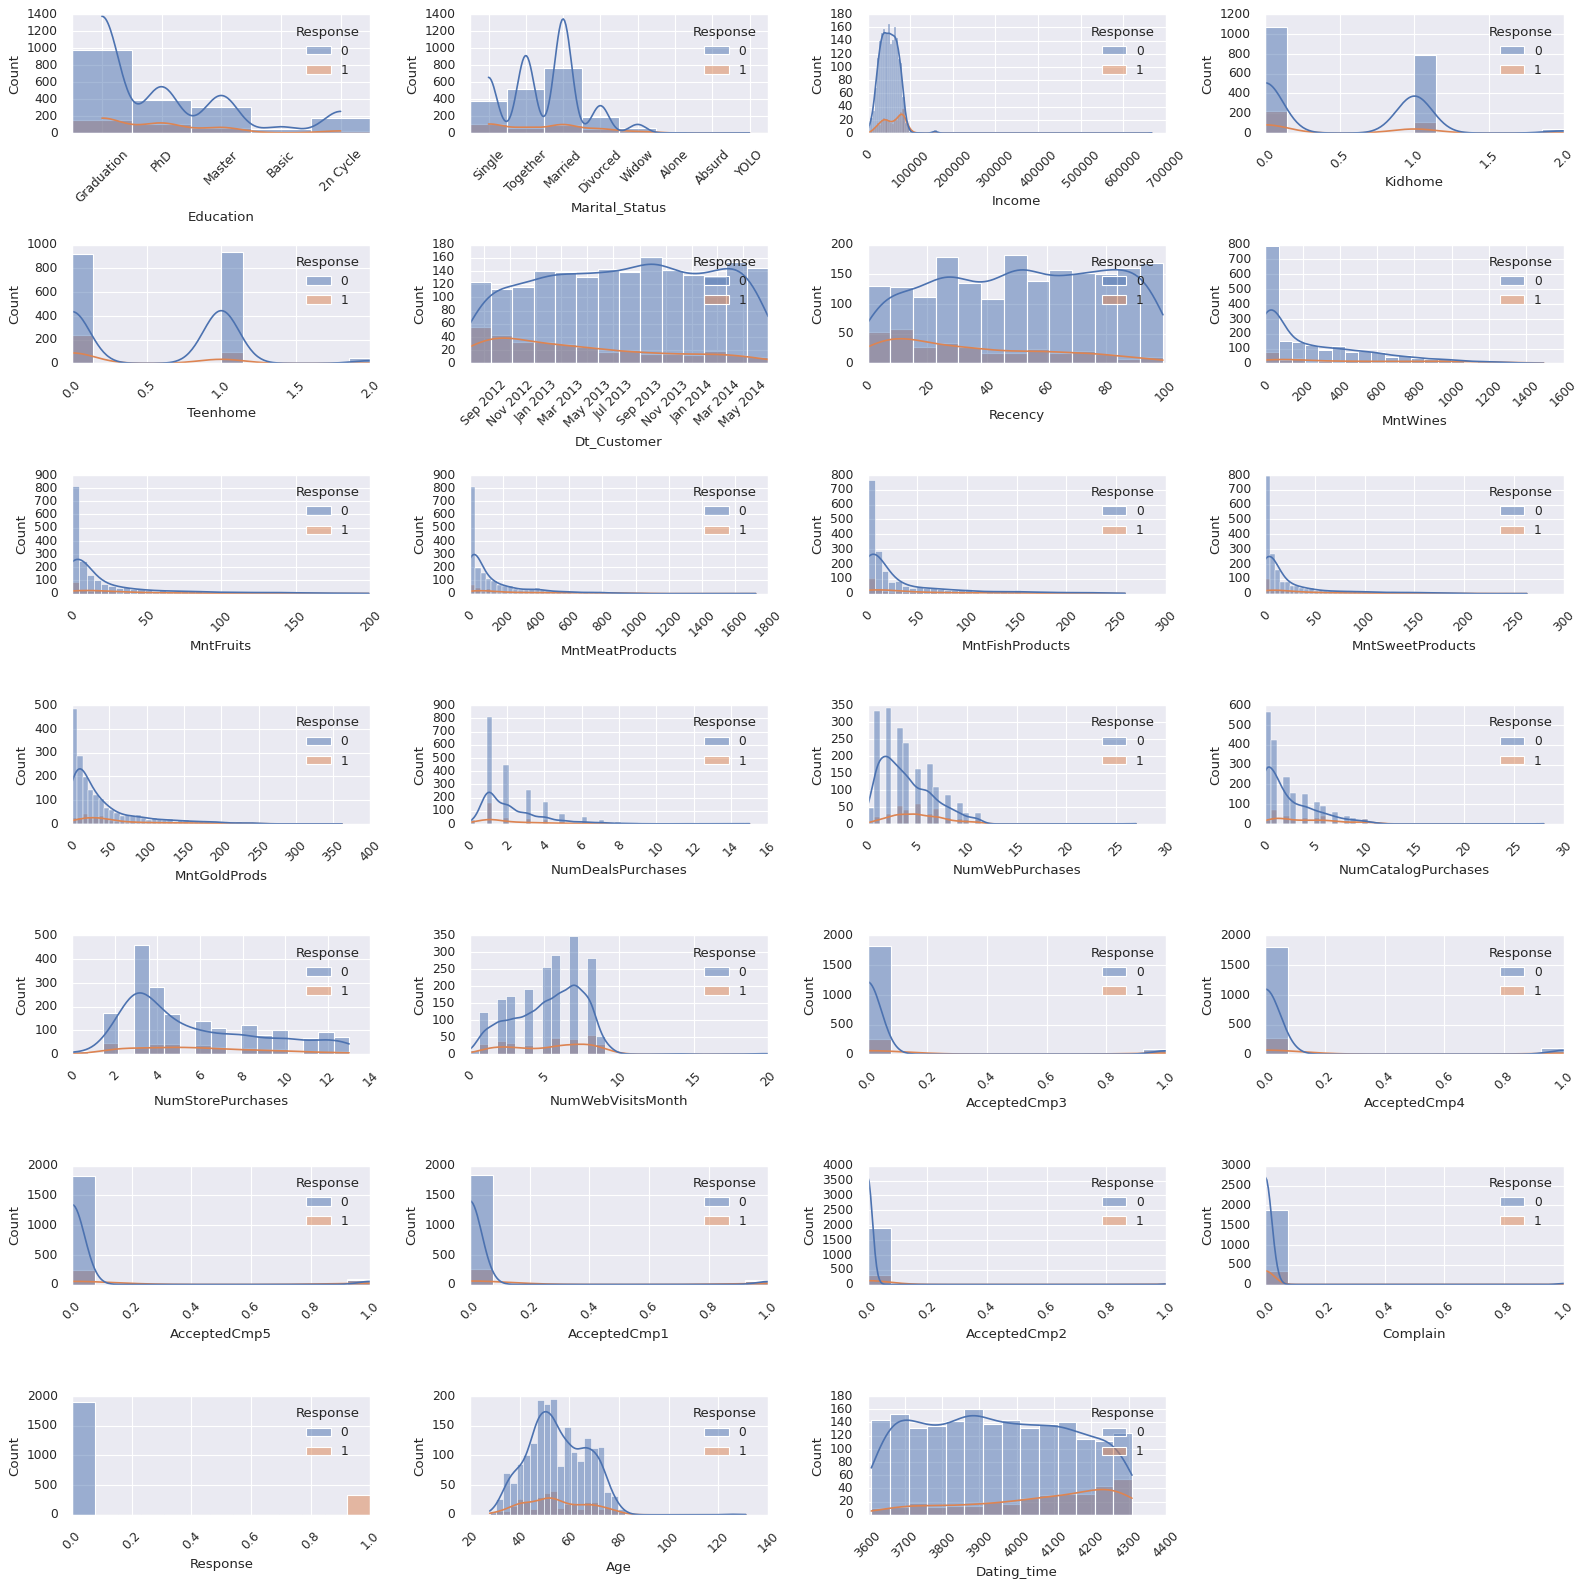

In [ ]:
# Проверяем, есть ли данные в df и больше ли количество столбцов, чем ожидалось
if not df.empty and len(df.columns) > 1:
    # Построение графиков
    fig, axs = plt.subplots(figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    columns = df.columns[1:]
    num_columns = len(columns)
    num_rows = num_columns // 4 + (1 if num_columns % 4 else 0)

    for i, column in enumerate(columns, start=1):
        plt.subplot(num_rows, 4, i)
        sns.histplot(data=df, x=column, hue='Response', kde=True)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Явное удаление осей, чтобы избежать предупреждения
    for ax in fig.get_axes():
        ax.remove()
else:
    print("DataFrame is empty or has fewer columns than expected.")


Так что мы можем сказать основываясь на этой комплексной визуализации. Она на самом деле очень полезная я именно с нее начинаю работу с данными. Итак в поле Age ну и соответсвнено и в поле год рождения однозначно есть выбросы. Мы их посмотрим в блоке где будем искать аномалии (а так средний возраст клиента 50 лет, ну возможно тут ошибка потому что мы не знаем в какой момент собран этот набор данным, но в текушем году вот так). Выьброс скорее всего есть и в столбце указывающего количество покупок в сети. Мы видим что большинство клиентов не активно учствовали в компаниях. У более половины клиентов траты на контролдируемые категории товаров минимальны - то есть от 0 до 200. Очень странно что у половины клиентов компании вообще нет детей (и это при среднем то возрасте в 50 лет? вот кстати это распределение стоит потом посмотреть). Ну и мы видим что четко есть выбросы в поле доход, большая часть распределения сосредоточена в области до 100 000. Такой график в целом - это обзор на лету с опцией быстрого поиска где можно поискать интересное

А теперь boxplot ы, обратите внимание мы исключили признаки в которых всего 2 варинта распредления - графики для них неинформативны

In [ ]:
to_show.remove('ID')

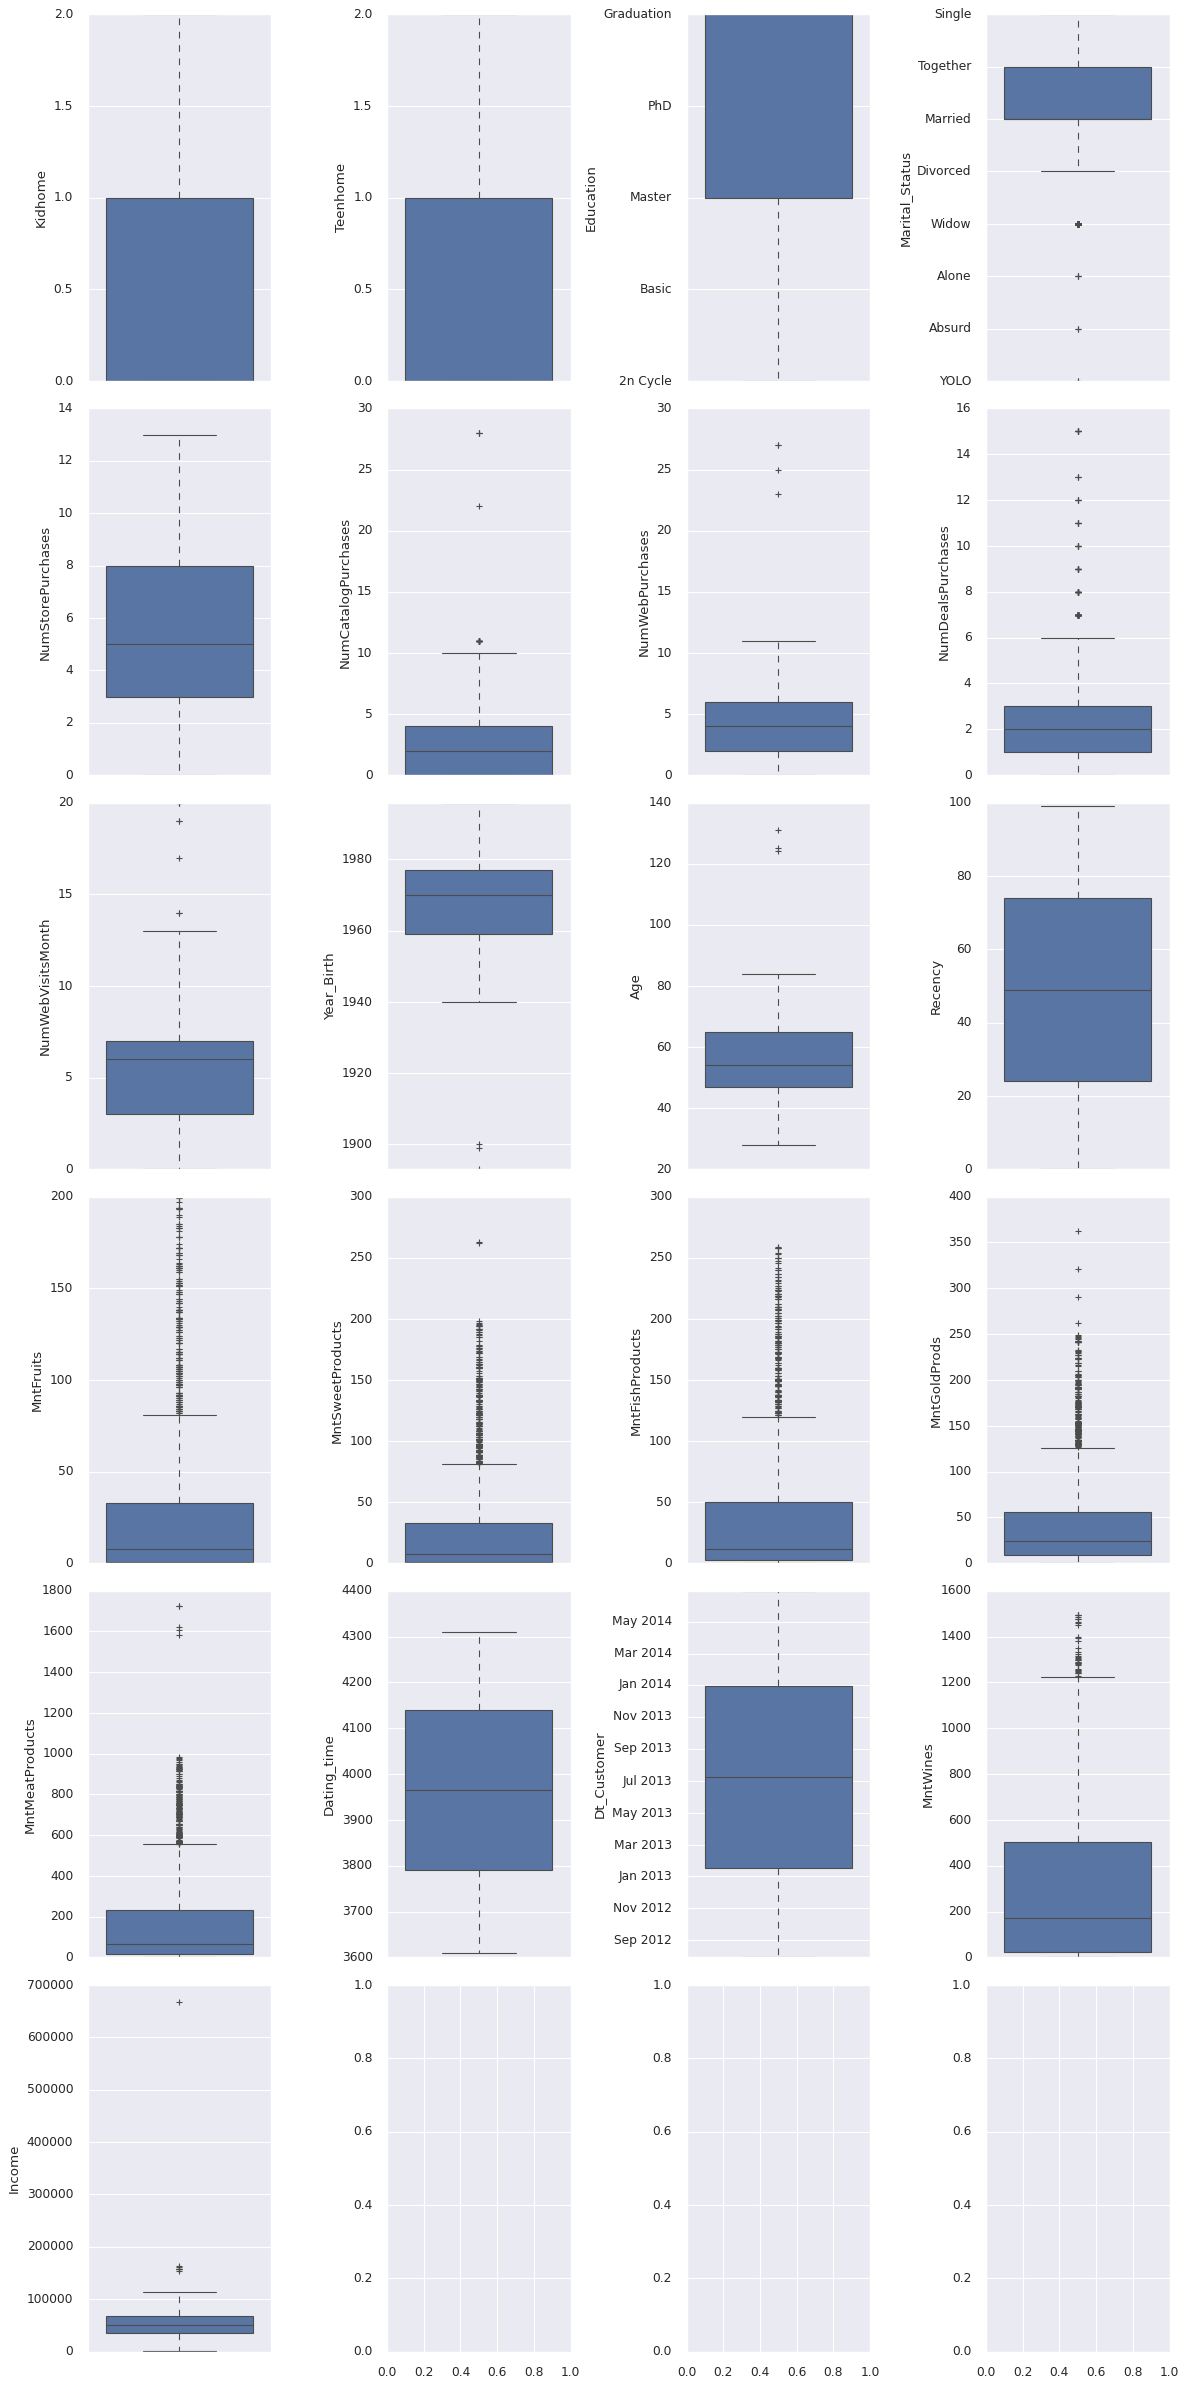

In [ ]:
# Установка размера фигуры и соотношения сторон
sns.set(rc={'figure.figsize': (14, 14)})

# Вычисляем количество строк
num_rows = len(to_show) // 4 + (1 if len(to_show) % 4 != 0 else 0)

# Создаем сетку под-графиков
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, 5*num_rows))

# Построение ящиков с усами для каждого столбца из списка to_show
for idx, col in enumerate(to_show):
    ax = axes[idx // 4, idx % 4]  # Определяем под-график для текущего столбца
    sns.boxplot(data=df[col], ax=ax)
    ax.set_ylabel(col)  # Устанавливаем подпись оси y как название столбца

plt.tight_layout()  # Устанавливаем компактное расположение графиков
plt.show()

Бокс плоты идеальны для изучения ситуации с выбросами и распределением внутьри признака. Конечно более информативны они для числовых признаков но и для категориальных вполне нормальных выход. Итак мы видим что большинство клиентов или находятся в браке или сожительствуют. Практически в каждом числовом признаке есть значения сильно отклоняющиеся от среднего и даже выбросы которые больше чем 1,5 * IQR. Границы с которой начинаются выбросы у каждой продуктовой категории разные и это вполне естественно. Среднее количество покупок в период маркетинговой компании - 2, но есть клиенты которые совершали и 20+ покупок. На таком графике мы четко видим выбросы в поле возраст. Наши клиенты более 130 лет. Это конечно может быть но маловероятно, их немного и думаю от этих записей стоит избавися. Классический вариант пользы боксплотов - это столбец доход. Мы видим что в среднем от между 35-75 тысячами, однако есть несколько клиентов которые получают в районе 150 000 и один клиент 666 666. Лично я думаю что это просто залипание клавиши, которое нам может сильно испортить машинное обучение. Но в целом мы эти впопросы решим когда будем искать аномалии. Сейчас же озвучу свою мысль что в большинстве своем тут нет выбросов то что человек тратик на вино или рыбу существенно больше чем остальные это не выброс это важная характеристика этого человека  - ее нельзя дропать! Ну и плюс к этому у нас всего 2240 записей, это очень мало и данные нужно беречь и соответсвенно не дропать

#### Исследуйте зависимость между образованием (Education) и суммой, потраченной на вино (MntWines). Подберите необходимый график и проанализируйте полученные результаты.

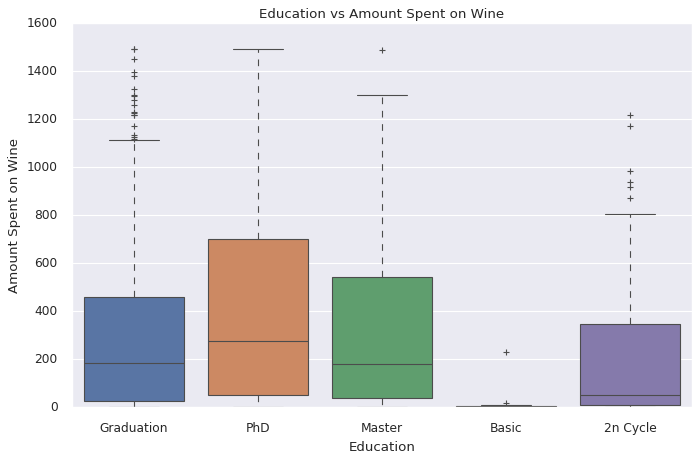

In [ ]:
# Установка размера фигуры
plt.figure(figsize=(10, 6))

# Построеним бокс плот
sns.boxplot(x='Education', y='MntWines', data=df, hue = 'Education')

# Добавление названий осей и заголовка
plt.xlabel('Education')
plt.ylabel('Amount Spent on Wine')
plt.title('Education vs Amount Spent on Wine')

plt.show()

Итак что мы видим, мы видим во-первых что вино пьют как правило образованные люди (возможно потому что у них на это есть деньги). PhD в среднем тратят на вино больше чем люди с другими категориями образования и для них практически нет выбросов (то есть никто не перебарщивает). В то время как Graduation есть клиенты которые тратят на вино сущесвтенно выше среднего

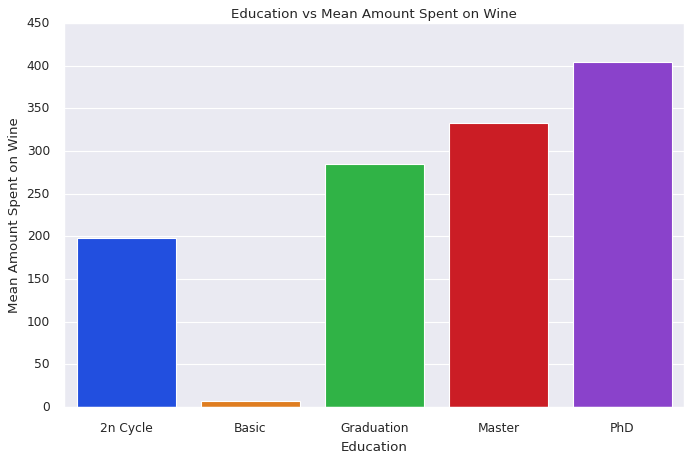

In [ ]:
# Вычисляем среднюю сумму, потраченную на вино, для каждого уровня образования
mean_wine_spending = df.groupby('Education')['MntWines'].mean().reset_index()

# Установка размера фигуры
plt.figure(figsize=(10, 6))

# Построение столбчатой диаграммы с использованием hue для раскраски столбцов по уровню образования
sns.barplot(x='Education', y='MntWines', data=mean_wine_spending, hue='Education', palette='bright', legend=False)

# Добавление названий осей и заголовка
plt.xlabel('Education')
plt.ylabel('Mean Amount Spent on Wine')
plt.title('Education vs Mean Amount Spent on Wine')

plt.show()

На предыдущем графике сложно было сравнить люди с каким типом обрзования в среднем тратят на вино, мы даже не могли сравнить Master и Graduation. А вот на этом графике все достаточно хорошо видно (понятно что сюда вошли выбросы, но среднее это важный показатель). Он позволяет сделать вывод что вино все таки несколько элитарный товар и образованные люди больше тратят на него денег. Загадочная категория 2n Cycle как я понял это что то среднее между graduation и Master для них запросы на вино почему ниже graduation. Этот вопрос можно проанализировать глубже, но нужно понимание предметной области (у меня его не сложилось ну не понимаю я кто это в русской интерпретации)

#### Создайте поле (plt.subplots()) из нескольких графиков. Сделайте выводы из каждого сделанного графика.

Для начала, что бы графики получились красивые и информативные, мы уберем строки с неоправданно высоким доходом и неправильно указанным возрастом.

In [ ]:
df_fixed = df[df['Income'] < 600000]
df_fixed = df_fixed[df_fixed['Age'] < 90]
df_fixed.shape

(2236, 28)

Вот мы потеряли всего 4 строки, но теперь выбросы-ошибки не будут оттягивать наши средние значения и графики получаься точнее и ближе к реальности

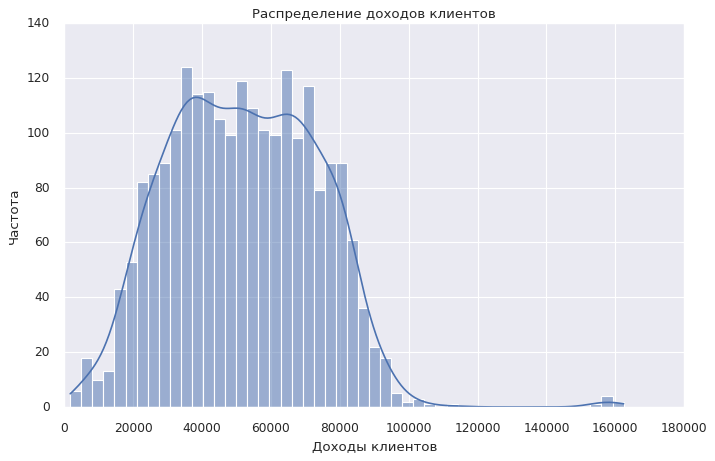

In [ ]:
# График 1 это гистограмма распределения доходов клиентов
plt.figure(figsize=(10, 6))
sns.histplot(df_fixed['Income'], bins=50, kde=True)
plt.title('Распределение доходов клиентов')
plt.xlabel('Доходы клиентов')
plt.ylabel('Частота')
plt.show()

Мы видим, что средние значения сосредоточены в районе 50 000, в этом районе распредление имеет четры нормального. Плюс мы наблюдаем еще одну группу значений в районе 160 000 в контексте нашего пула клиентов это что то типа богатые клиенты. Конечно интересно есть ли разница по доходности от богатых и бедный, но как мы выявнили столбец в доходностью с клиента у нас константный

In [ ]:
# График № 2 как влияет уровень образования на заработок это будет столбчатая диаграмма
# для начала построим заготовку
df_edu_info = df_fixed.groupby('Education')['Income'].agg(['mean', 'median', 'min', 'max'])

In [ ]:
df_edu_info.sort_values(by = 'max', inplace=True)

In [ ]:
df_edu_info

mean   median     min       max
Education                                          
Basic       20306.259259  20744.0  7500.0   34445.0
2n Cycle    47681.395522  46891.0  7500.0   96547.0
Graduation  52162.049290  51594.0  1730.0  157146.0
Master      52896.777027  51044.5  6560.0  157733.0
PhD         56039.735052  54998.0  4023.0  162397.0

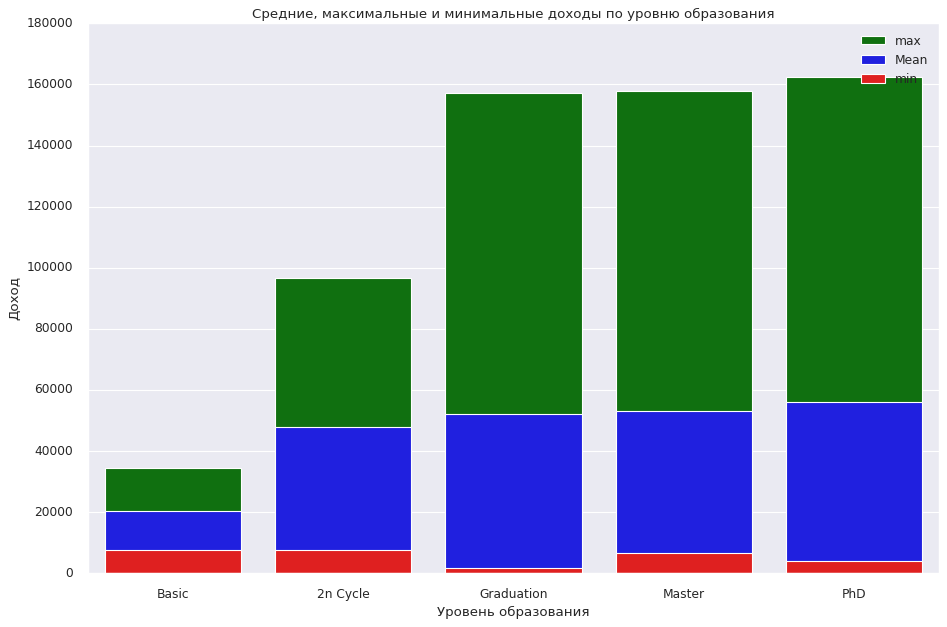

In [ ]:
# Размер графика
plt.figure(figsize=(12, 8))

# Создание графика максимального
sns.barplot(x='Education', y='max', data=df_edu_info, color='green', label='max')
# Создание графика среднего значения
sns.barplot(x='Education', y='mean', data=df_edu_info, color='blue', label='Mean')
# Создание графика минимального
sns.barplot(x='Education', y='min', data=df_edu_info, color='red', label='min')

# Настройка подписей и легенды
plt.xlabel('Уровень образования')
plt.ylabel('Доход')
plt.title('Средние, максимальные и минимальные доходы по уровню образования')
plt.legend()
plt.tight_layout()

# Вывод графика
plt.show()

Итак, что мы получаем. А получаем мы примерно то, что для 4 вариантов уровня образования как средние так и максимальные значения доходов примерно равны. И люди с базовым образованием конечно получают ЗП существенно меньше. Минимальные доходы не так сильно отстоят от среднего и не оттягивают влево меру среднего, поэтому мы их наверное удалять не будем. Теперь нам нужно посмотреть а как расперделены значения внутри образовательной категории, нас безусловно больше будет интересовать те люди которых больше в базе нащих клиентов

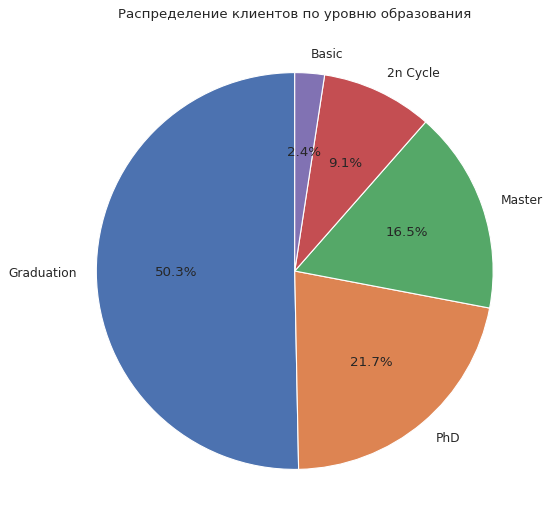

In [ ]:
# График №3  уровень образования распредлеение категорий через круговую диаграмму
Education = df['Education'].value_counts()

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(Education, labels=Education.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение клиентов по уровню образования')
plt.show()

Чуть более половины наших клиентов имеют уровень образования Graduation, удивительно но Phd (это что то типа наших кандидатов наук) составляют почти 1/4 клиентов. Магистры составляют 16%. Вот эти 3 группы являются основыными в нашем поиске. Причем как мы выявнили по уровню доходов они практически не отличаются

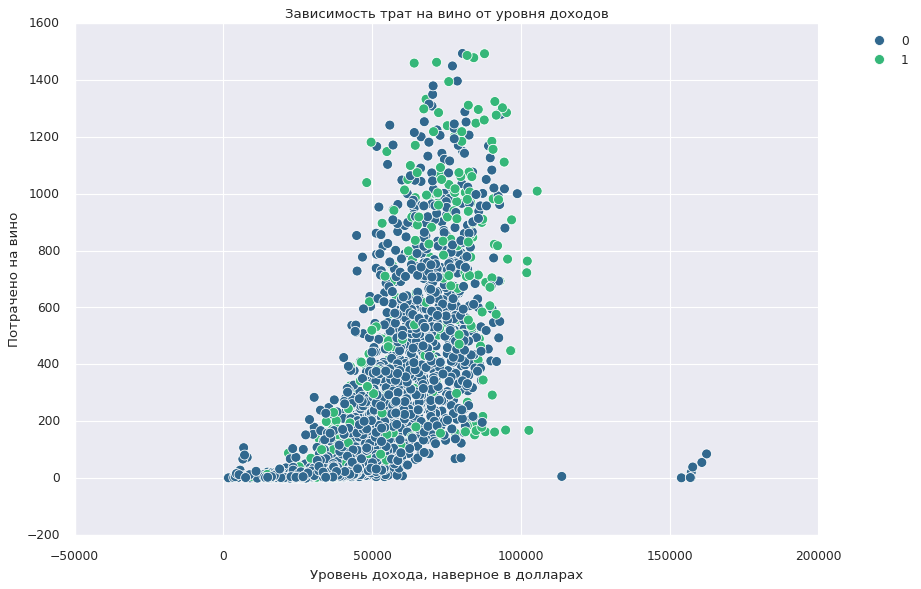

In [ ]:
# График 4. Раз уж мы затронули тему вина, то с ппомощью точечной диаграммы посмотрим как влиет доход на траты на вино, и попробуем
# наложить цветовую метку по нашему таргету то есть по лояльности клиента Response
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='MntWines', hue='Response', data=df_fixed, palette='viridis', legend='full', s=80)
plt.title('Зависимость трат на вино от уровня доходов')
plt.xlabel('Уровень дохода, наверное в долларах')
plt.ylabel('Потрачено на вино')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Перемещение легенды за пределы графика
plt.show()

Итак первое, мы не видим в соотношении этих двах характритик (как в прочем и всех других) четкого деления на тархетные кластеры в зависимости от указанных характеристик. Но что мы видим. мы видим что есть зависимость (она прямая положительная со слабо выраженным но в то же время резким трендом) Скажем так люди, которые зарабатывают от 50 000 уже тратят на вино более 300? до этой суммы дохода нет ни одного человека кто бы мог себе это позваолить. Очень показательно что люди которые зарабатывают более 60 000 уже однозначно тратятся на вино, нет такого кто не тратит (стрессы наверное). Мы попробовали еще несколько распределений и обратили внимание на группу клиентов которые зарабатывают более 110 000. Во первыйх они очен мало тратят на вино (подозрительные), а во вторых никто из них не отреагировл на маркетинговую компанию. Посмотрим их  

In [ ]:
df_fixed[df_fixed['Income'] > 110000]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164  1973-01-01         PhD        Married  157243.0        0         1   
617  1976-01-01         PhD       Together  162397.0        1         1   
655  1975-01-01  Graduation       Divorced  153924.0        0         0   
687  1982-01-01         PhD        Married  160803.0        0         0   
1300 1971-01-01      Master       Together  157733.0        1         0   
1653 1977-01-01  Graduation       Together  157146.0        0         0   
1898 1945-01-01         PhD         Single  113734.0        0         0   
2132 1949-01-01         PhD        Married  156924.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
164   2014-03-01       98        20          2             1582   
617   2013-06-03       31        85          1               16   
655   2014-02-07       81         1          1                1   
687   2012-08-04       21        55         16             1622   
1300  2013-06-04       37        39          1                9   
1653  2013-04-29       13         1          0             1725   
1898  2014-05-28        9         6          2                3   
2132  2013-08-29       85         2          1                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
164                 1                 2             1                 15   
617                 2                 1             2                  0   
655                 1                 1             1                  0   
687                17                 3             4                 15   
1300                2                 0             8                  0   
1653                2                 1             1                  0   
1898                1               262             3                  0   
2132                1                 1             1                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
164                 0                   22                  0   
617                 0                    0                  1   
655                 0                    0                  0   
687                 0                   28                  1   
1300                1                    0                  1   
1653                0                   28                  0   
1898               27                    0                  0   
2132                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
164                   0             0             0             0   
617                   1             0             0             0   
655                   0             0             0             0   
687                   0             0             0             0   
1300                  1             0             0             0   
1653                  1             0             0             0   
1898                  1             0             0             0   
2132                  0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  Dating_time  
164              0             0         0         0   51         3730  
617              0             0         0         0   48         4001  
655              0             0         0         0   49         3752  
687              0             0         0         0   42         4304  
1300             0             0         0         0   53         4000  
1653             0             0         0         0   47         4036  
1898             0             0         0         0   79         3642  
2132             0             0         0         0   75         3914

На первый взгляд ничего необычного, но если они нам будут портить ML мы их дропнем, но это потом

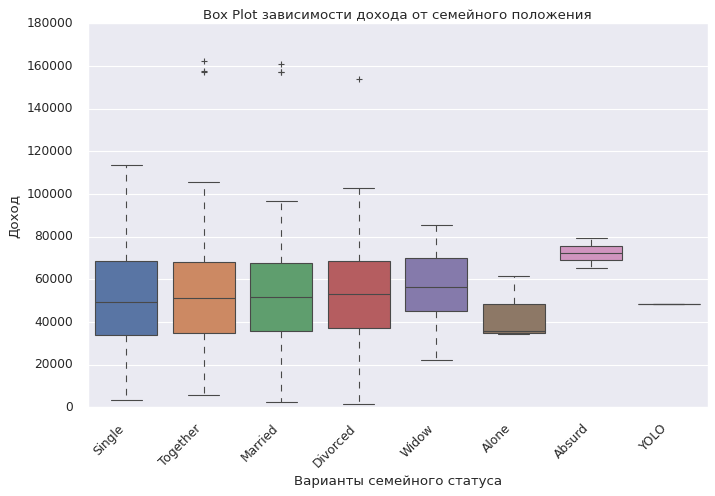

In [ ]:
# График 5 - диаграммы ящика с усами посмотрим на доход и траты на вино и драгоценности в зависимости от семейного положения
# сначала просто доход
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Income', data=df_fixed, hue='Marital_Status')
plt.title('Box Plot зависимости дохода от семейного положения')
plt.xlabel('Варианты семейного статуса')
plt.ylabel('Доход')
plt.xticks(rotation=45, ha='right')  # Поворот меток на оси x для улучшения читаемости
plt.show()

Очень интересный график получился, во первых он дает нам пищу для размышлений в плане наименований категорий. Чем отличается Single от Alone. В этимологи английского языка почти не чем. Только Alone - это быть одному с нейтральным оттенком без переживания этого состояния. Single - одначает тоже самое но уже в контексте брачносемейных отношений, с оттенком грусти по этому поводу. Так вот одинокие волки в среднем зарабатыват существенно меньше чем все остальные, и существенно меньше single получется что это все таки разные категории хотя ранее я хотел их объединить в одну. Вдовцы (вдовы) зарабатывают чуть выше всех остальных. Лучший показатели у небольщой группы Absurd. Как понимать ее название я не знаю - то ли семья для них это абсурд, то ли что то еще, но тем не менее факт остается фактом они самые богатые в среднем. Ну и последний вариант состоящий из одного человека (тоже кандидат на дроп) это человек с кризисом среднего возраста хорошо знакомый с сериалом Симпсоны. YOLO (You Only Live Once, с англ. — «Живём лишь раз») — четвёртый эпизод двадцать пятого сезона мультсериала «Симпсоны» (наверное это что то типа Казановы, но гадать не берусь по доходу это чуть лучшего одиноких волков)   

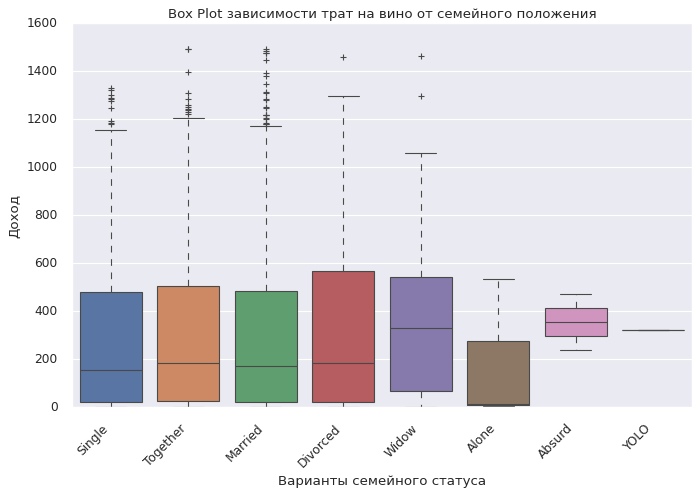

In [ ]:
# теперь в срезе вина

plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='MntWines', data=df_fixed, hue='Marital_Status')
plt.title('Box Plot зависимости трат на вино от семейного положения')
plt.xlabel('Варианты семейного статуса')
plt.ylabel('Доход')
plt.xticks(rotation=45, ha='right')  # Поворот меток на оси x для улучшения читаемости
plt.show()

Тут мы отмечаем, что вдовцы (вдовы), адсурды и человек живущий один раз тратят на вино несоизмеримо больше чем остальные. Одинокие волки настолько равнодушны к совему семейному статусу (а именно этот акцент в это слово закладывает этимология английского языка) что совсем не переживают и следовательно не покупают вина.

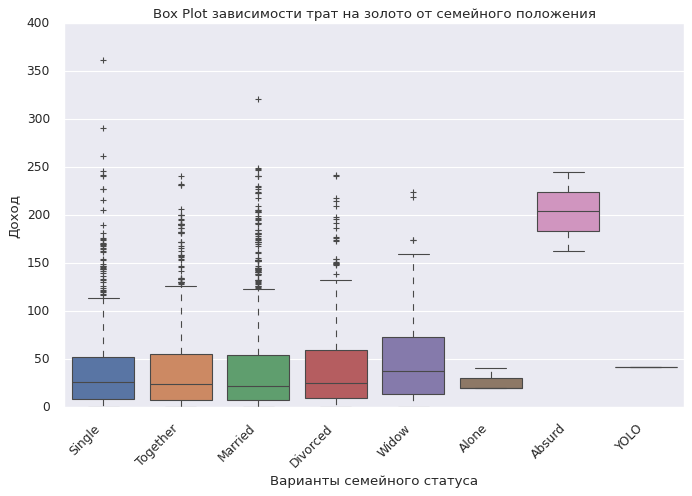

In [ ]:
# теперь о золоте
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='MntGoldProds', data=df_fixed, hue='Marital_Status')
plt.title('Box Plot зависимости трат на золото от семейного положения')
plt.xlabel('Варианты семейного статуса')
plt.ylabel('Доход')
plt.xticks(rotation=45, ha='right')  # Поворот меток на оси x для улучшения читаемости
plt.show()

Очень интересно, но мы видим на сколько абсурды больше тратят на золото чем все остальные. Возможно отчет и причина оченвидны, но мы пока не можем понять что это за семейный статус

[Text(51.5, 0.5, 'Уровень образования')]

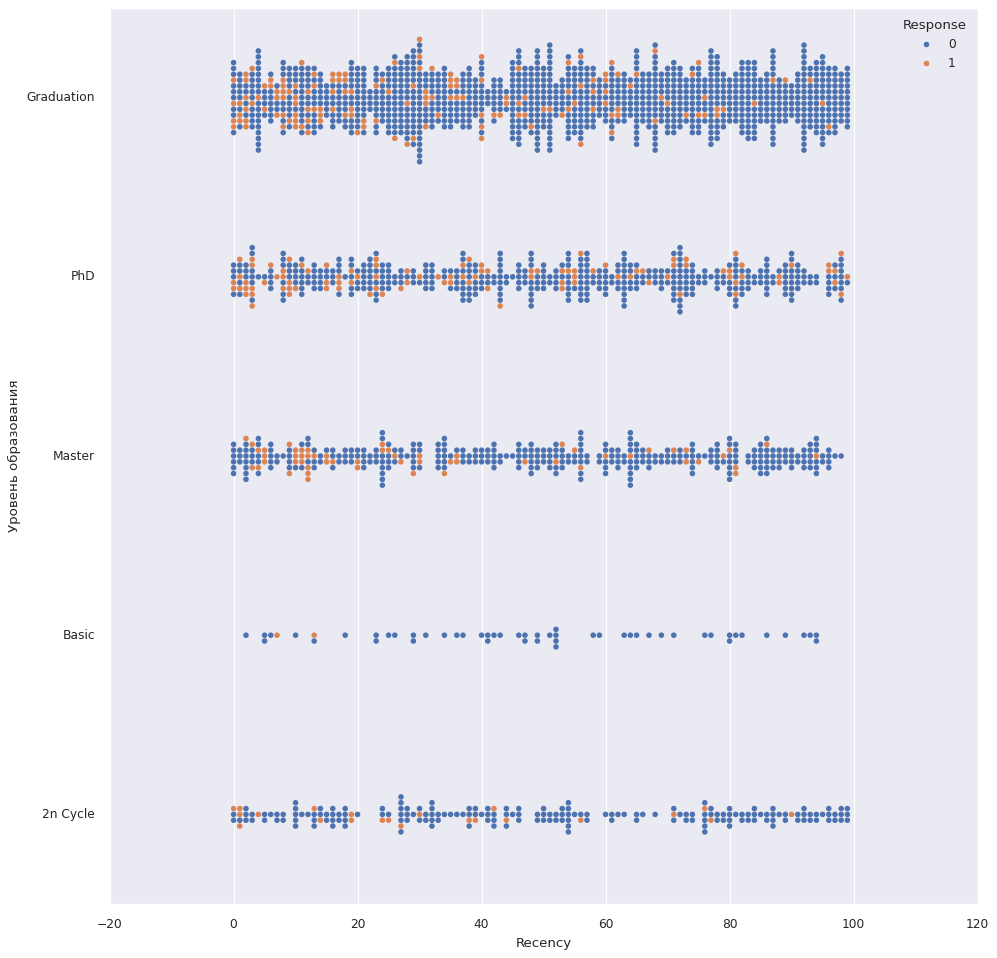

In [ ]:
# За 6 график я долго выбирал первый варинат был сварм плот, в котором сочетаются категории числовой признак и можно рассматривать кластеры
ax = sns.swarmplot(data=df_fixed, x="Recency", y="Education", hue="Response")
ax.set(ylabel="Уровень образования")

Визуально мы можем выделить одно правило чем меньше показатеь последнего взаимодействия с клиентом тем больше вероятность что он отреагирует на компанию, для людей с базовым образованием согласно данным это 100% правило

<Axes: >

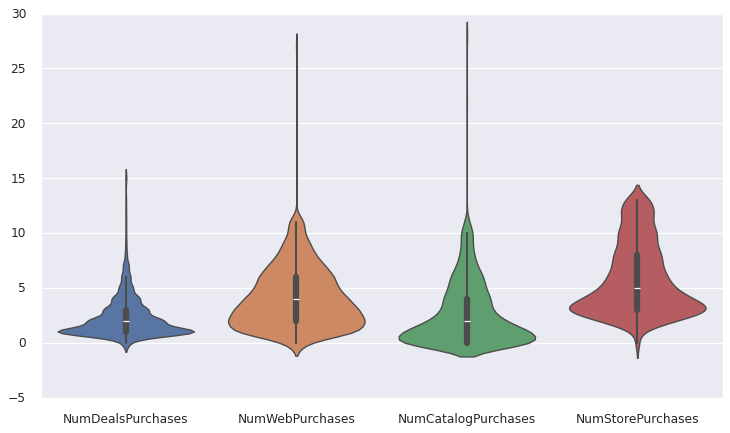

In [ ]:
# второй вариант был виолин плот, я решил выбрать его потому что он отражает признаки, которые я ранее не рассматривал
f, ax = plt.subplots(figsize=(11, 6))

# строим виолин плот по каличеству покупок различным способом
sns.violinplot(data=df_fixed[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])

График очень интересный, он позволяет сранивть меру среднего. Ширина его боков показывает каких значений больше всего в данных, а хвосты как у скатов показывают наличие выбросов (ну или не выбросов а очень высоких/низких значений). Мы сравнили вид покупок и получили что в магазинах в среднем пока покупают больше, но там нет такихх клиентов которые могут купить очень много как по сети или каталогу

In [ ]:
def subplots_class():
  fig, axs = plt.subplots(3, 2, figsize=(20, 20))
  fig.suptitle('Поле графиков с тремя строчками и двумя столбцами по набору данных о клиентах компании', fontsize=20) # Установка названия для всего поля

  # Первый график
  sns.histplot(ax=axs[0, 0], data = df_fixed['Income'], bins=50, kde=True)
  axs[0, 0].set_title('Распределение доходов клиентов', fontsize=15)
  axs[0, 0].set_xlabel('Доходы клиентов')
  axs[0, 0].set_ylabel('Количество объектов')

  # второй график
  sns.barplot(ax=axs[0, 1], x='Education', y='max', data=df_edu_info, color='green', label='Max')
  sns.barplot(ax=axs[0, 1], x='Education', y='mean', data=df_edu_info, color='blue', label='Mean')
  sns.barplot(ax=axs[0, 1], x='Education', y='min', data=df_edu_info, color='red', label='Min')
  axs[0, 1].set_xlabel("Уровень образования")
  axs[0, 1].set_ylabel("Доход")
  axs[0, 1].set_title("Максимальный, минимальный и средний доходы в зависисмости от уровня образования", fontsize=15)
  axs[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  axs[0, 1].tick_params(axis='x', rotation=45)

  # Третий график
  axs[1, 0].pie(Education, labels=Education.index, autopct='%1.1f%%', startangle=90)
  axs[1, 0].set_title('Распределение клиентов по уровню образования', fontsize=15)

  # Четвертый график
  sns.scatterplot(ax=axs[1, 1], data = df_fixed, x='Income', y='MntWines', s=80, hue='Response')
  axs[1, 1].set_xlabel("Уровень дохода, наверное в долларах")
  axs[1, 1].set_ylabel("Потрачено на вино")
  axs[1, 1].set_title("Зависимость трат на вино от уровня доходов", fontsize=15)
  axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

  #Пятый график
  sns.boxplot(ax=axs[2, 0], data=df_fixed, x='Marital_Status', y='MntGoldProds',  hue='Marital_Status')
  axs[2, 0].set_xlabel("Варианты семейного статуса")
  axs[2, 0].set_ylabel("Траты на золото")
  axs[2, 0].set_title("Box Plot зависимости трат на золото от семейного положения", fontsize=15)
  axs[2, 0].tick_params(axis='x', rotation=45)

  # Шестой график
  sns.violinplot(ax=axs[2, 1], data=df_fixed[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])
  axs[2, 1].set_xlabel("Варианты способа покупки")
  axs[2, 1].set_ylabel("Количество покупок")
  axs[2, 1].set_title('Распредление видов покупок с помощью violinplot', fontsize=15)

  plt.tight_layout()
  plt.show()

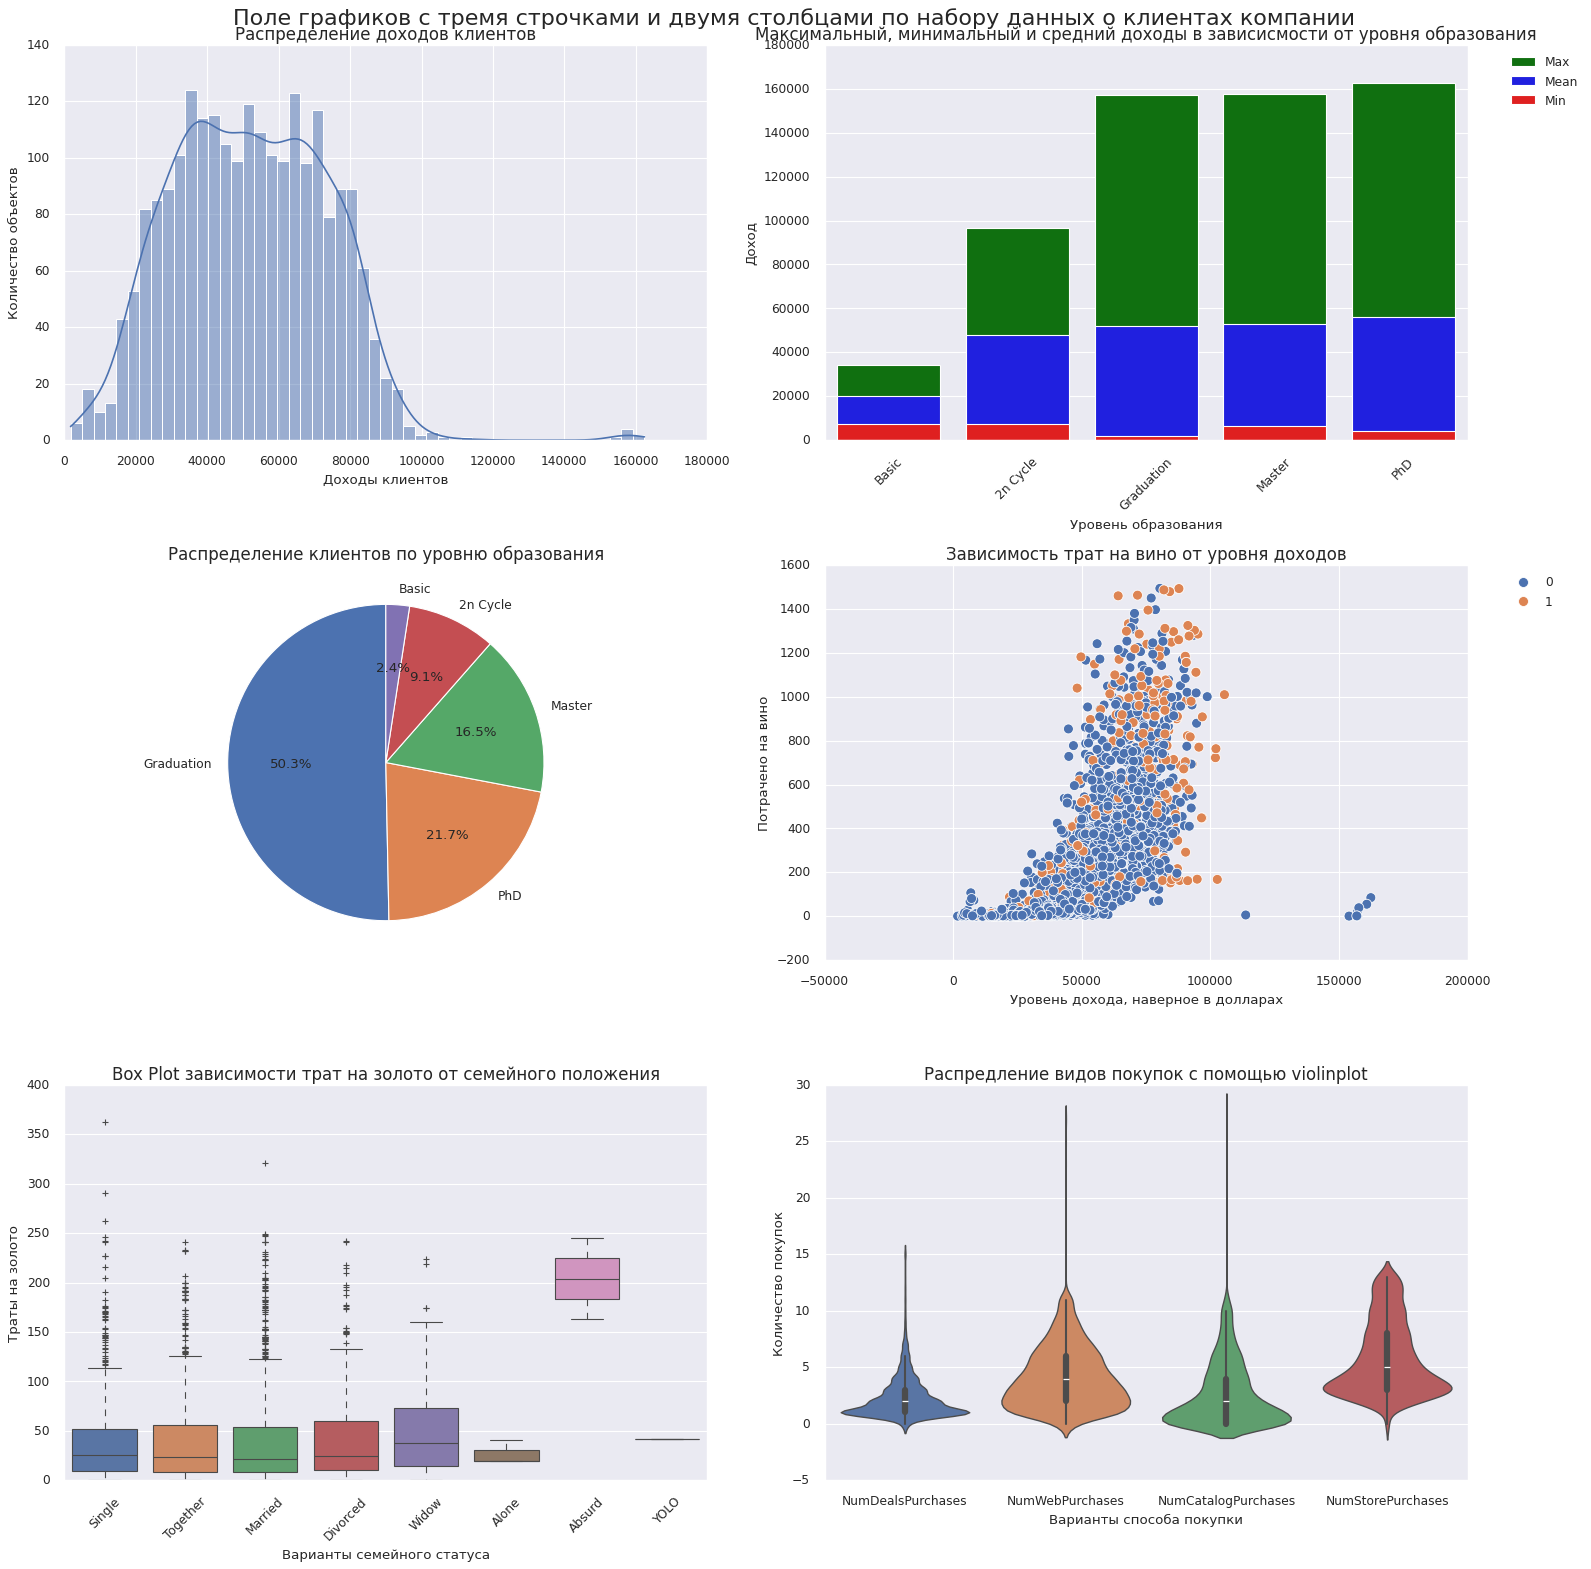

In [ ]:
# вот собственно и наш мини-дашборд
subplots_class()

Аналитический смысл визуализаций я описывал индивидуально когда подбирал графики для дашборда

#### Создайте матрицу корреляции для числовых переменных и визуализируйте ее с помощью тепловой карты. Какие зависимости вам удалось обнаружить?

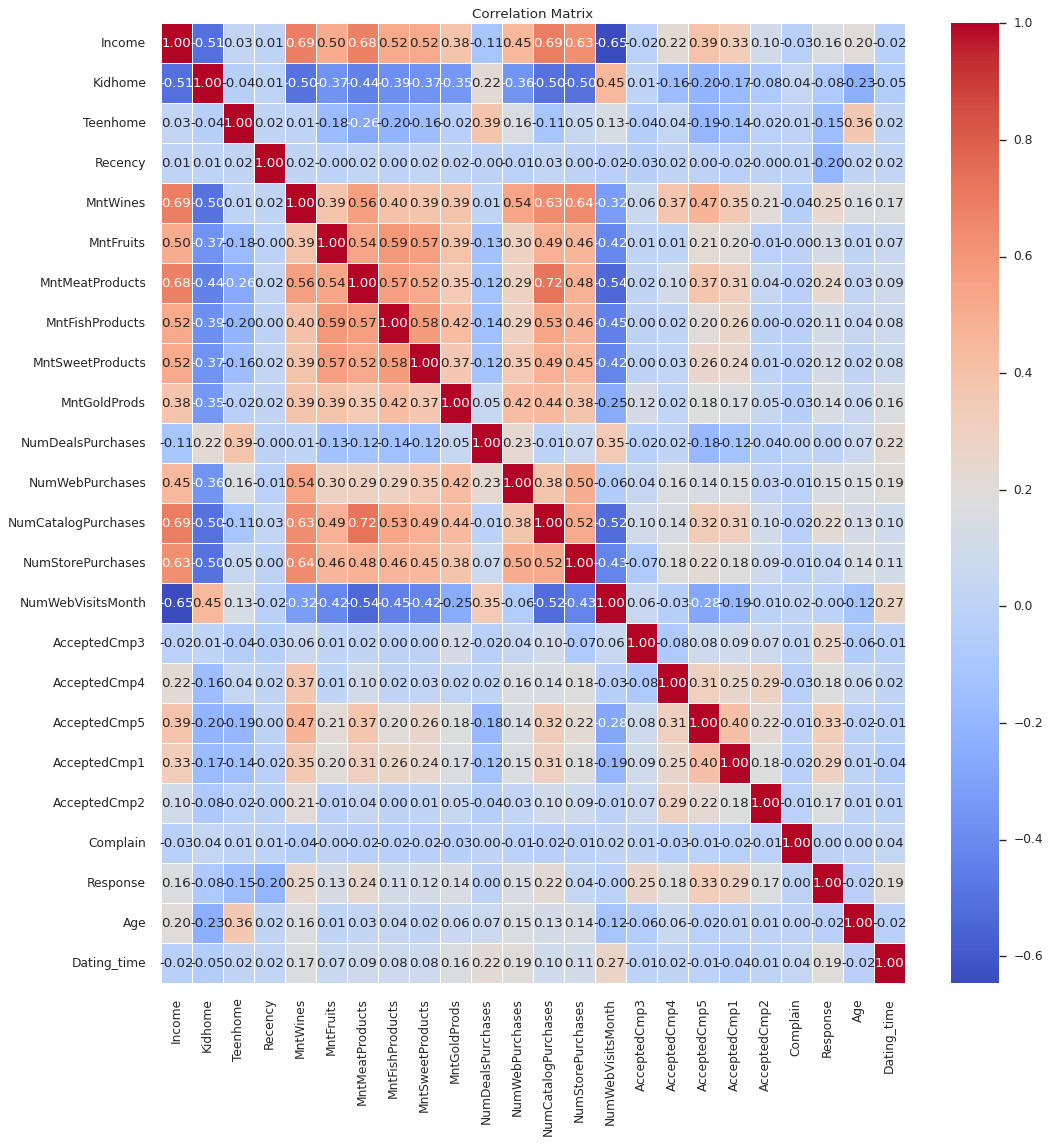

In [ ]:
# Выделение только числовых столбцов
numeric_df = df_fixed.select_dtypes(include=['int64', 'float64'])

# Создание матрицы корреляции
corr_matrix = numeric_df.corr()

# Установка размера фигуры
plt.figure(figsize=(15, 15))

# Визуализация матрицы корреляции с помощью тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()


Большая и неудобная, наложим маску что бы быстро ответить на вопрос

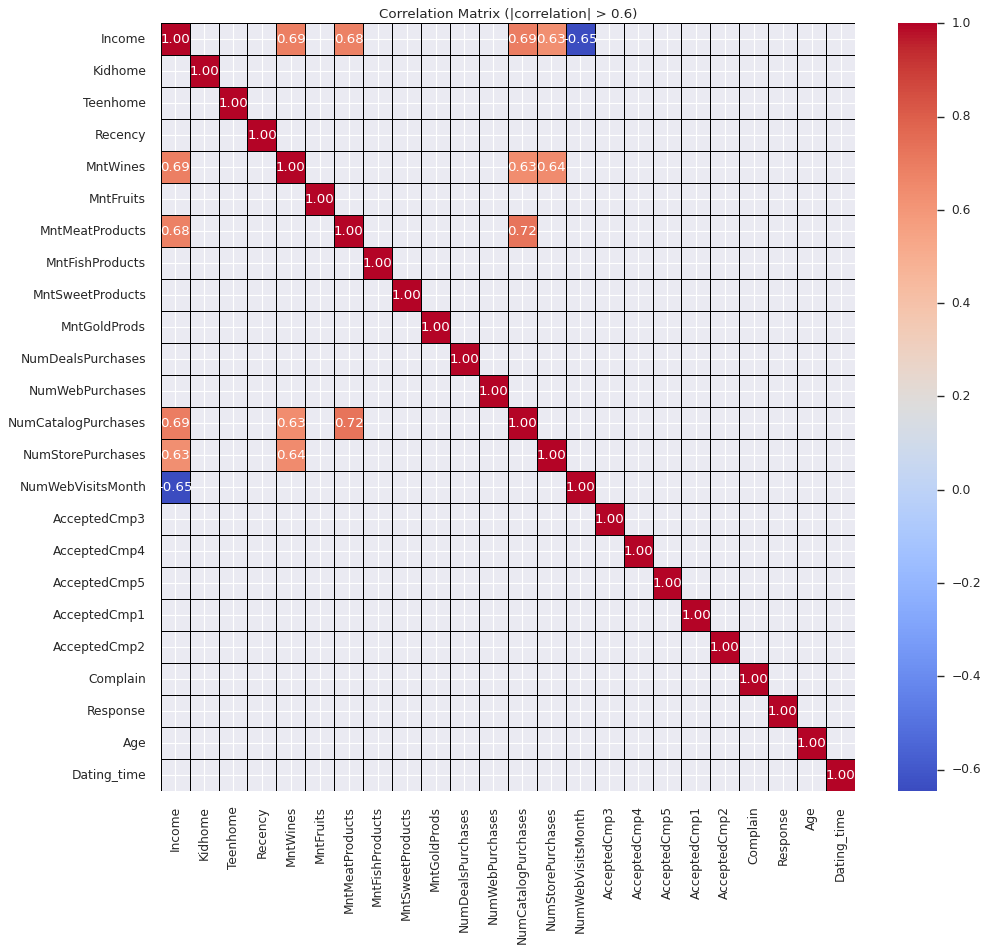

In [ ]:
# Создание маски для значений корреляции больше 0.6 или меньше -0.6
corr_mask = (corr_matrix > 0.6) | (corr_matrix < -0.6)

# Установка размера фигуры
plt.figure(figsize=(14, 12))

# Визуализация матрицы корреляции с применением маски
sns.heatmap(corr_matrix[corr_mask], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')

plt.title('Correlation Matrix (|correlation| > 0.6)')
plt.show()


Итак, первое что мы должны отметить - с таргетной переменной Responce нет ни одной значимой корреляции, это конечно плохо. Ну а теперь про корреляции. Они у нас получились не очень сильные, но все же:
* С доходом. Положительные корреляции чем больше клиент зарабатывает тем больше он покупаем мяса, вина. Он вероятнее всего покупает в магазине или по каталогу и чем больше человек зарабатывает - тем меньше у него времени посещать сайт (тут уже отрицательная корреляция со столбцом NumWebVisitsMouth)
* c покупокой по каталогу. Вольная интерпертация, но все же корреляция 0,72 между покупкой мяса и покупками по каталогу говорит о том, что скорее всего мясо заказывает по каталогу (что странно). Формально это звучит так увеличение количество покупок по каталогу приводит к увеличению показателя куплено мяса. Но мы интерпретируем вольно и надеюсь правиьно. Помимо мяса с показателем количетво покупок по каталогу положиельно коррелирует, но не так сильно покупка вина (0,63) интерпертация аналогичная
* с покупкой в магазине (0,64) покупки вина. Вольная интерпретация, человек приходя в магазин совершат покупки очень часто захватывает и бутылочку вина. То есть он может купить что то не из списка: Мясо, рыбу, золото, фрукты сладкое эта покупка в счет непопадет, а вино попадет, ну или клиент специально приходит в магазин именно за вином. Формально опять же мы должны сказать так, что увеличение количества покупок в магазина увеличин количество покупок вина

### Ваше описание датасета:

`Предоставьте описание в свободном виде`.

Я уже давал свое описанеие данного набора данных по тексту выше. Добавлю лишь то что он представляется несколько не простым. Я изучил Kaggle серебренный код выдает предикт всего 0,86 это невероятно мало, причем тому что этот процент такой большой мы должны быть балгодарны несбалансированности классов, потому что результат предсказания положительной реакции на маркетинговую компанию очень плохой мы больше ошибаемся FN чем правильно угадываем TP. Самой значимой характеристикой как частно в таких случаях бывает я думаю будут количество посещений сайта в месяц и конечно сколько дней прошло с момента последнего взаимодействия с компанией, но все попорядку следующим заданием я должен попробовать снизить размерность, этим и займемся. Мы будем использовать набор данных где мы уже убрали 4 явно аномальных примера

In [ ]:
# вот этот график мы пострили для того что бы сделать попытку кластеризовать таргет глазами
#sns.pairplot(df_fixed, hue="Response")

Есть конечно воображаемые кластеры например вот, ну конечно так себе кластеры, но лучше я глазами не нашел

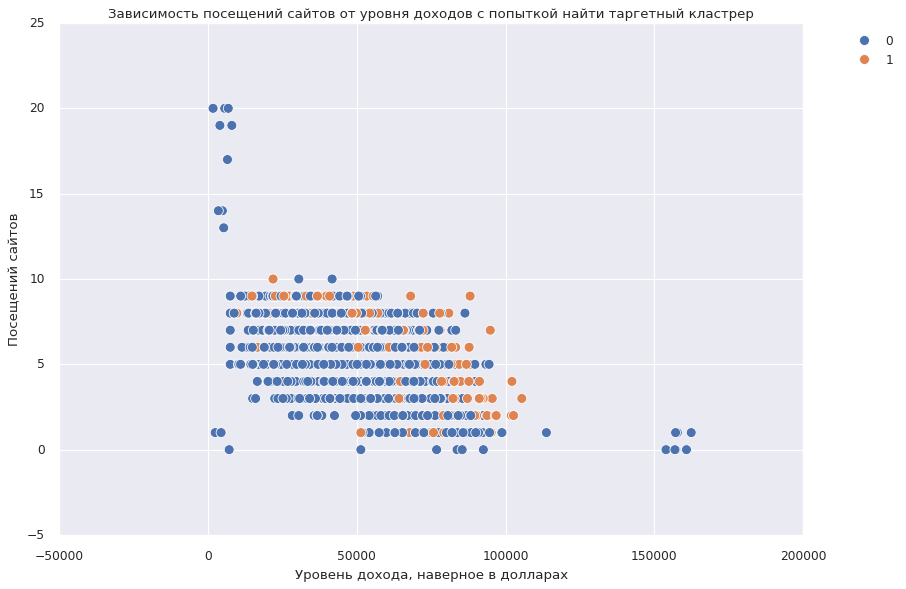

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='NumWebVisitsMonth', hue='Response', data=df_fixed, legend='full', s=80)
plt.title('Зависимость посещений сайтов от уровня доходов с попыткой найти таргетный кластрер')
plt.xlabel('Уровень дохода, наверное в долларах')
plt.ylabel('Посещений сайтов')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Перемещение легенды за пределы графика
plt.show()

In [ ]:
# Анализируя большую картинку мы заметили что таргет связан с реакцией на компании и мы решили просуммировать количество реакций на компании в признак активности или лояльности
df_fixed['Acivity'] = df_fixed[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']].sum(axis = 1)

In [ ]:
df_fixed['Total_spend'] = df_fixed[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']].sum(axis = 1)

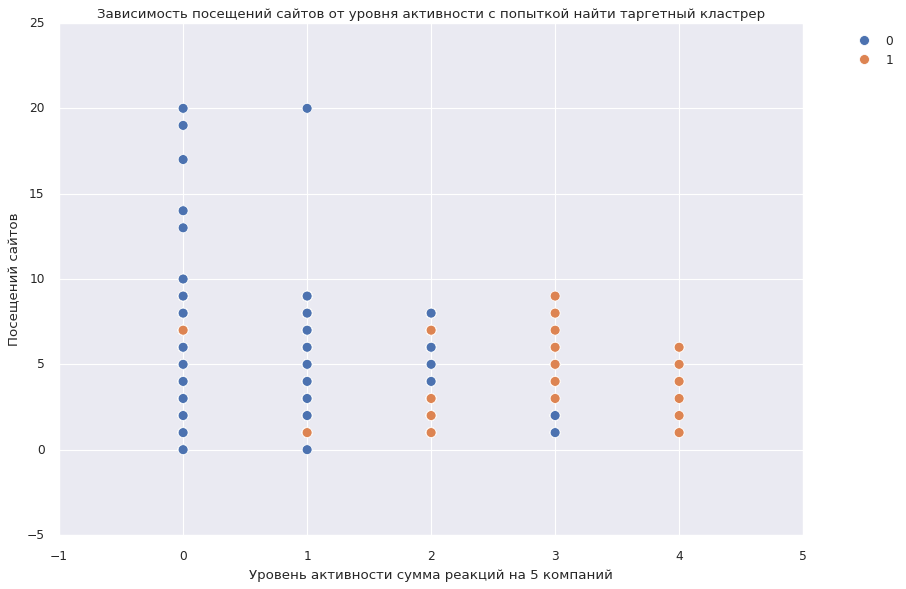

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Acivity', y='NumWebVisitsMonth', hue='Response', data=df_fixed, legend='full', s=80)
plt.title('Зависимость посещений сайтов от уровня активности с попыткой найти таргетный кластрер')
plt.xlabel('Уровень активности сумма реакций на 5 компаний')
plt.ylabel('Посещений сайтов')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Перемещение легенды за пределы графика
plt.show()

Вот это уже интересно - вот это уже правилдо то есть если человек отреагировал на 4 из 5 компаний то он 100 процентов попадает в кластер положительно отреагировавших на маркетинговую компанию

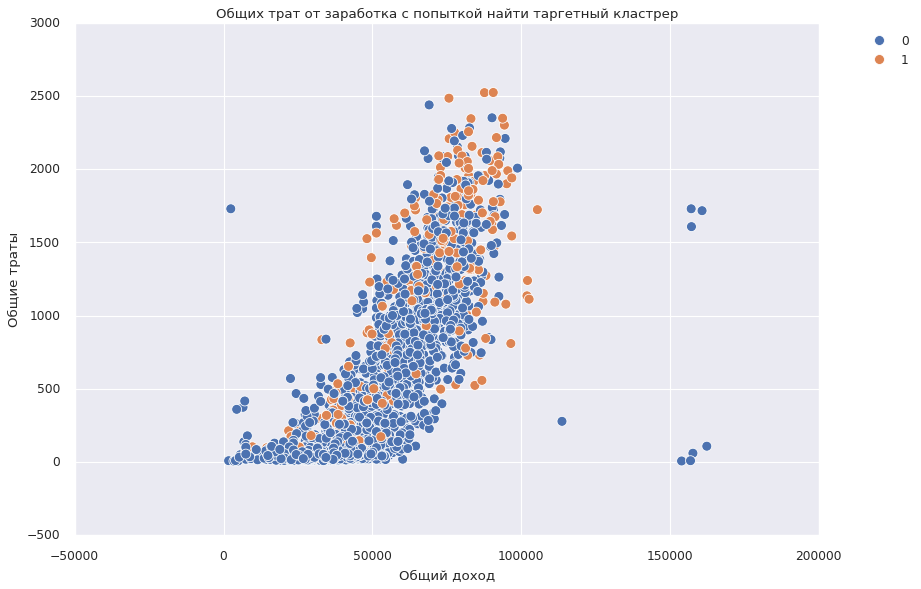

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Total_spend', hue='Response', data=df_fixed, legend='full', s=80)
plt.title('Общих трат от заработка с попыткой найти таргетный кластрер')
plt.xlabel('Общий доход')
plt.ylabel('Общие траты')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Перемещение легенды за пределы графика
plt.show()

А еще можно искать вот так

In [ ]:
for col in df_fixed.columns:
    print(f'Для столбца {col} предусмотрено следующее распределение категорий по отношению к Responce \n')
    display(df_fixed.groupby([col, 'Response']).size().unstack(fill_value=0))

Для столбца Year_Birth предусмотрено следующее распределение категорий по отношению к Responce 



Response     0   1
Year_Birth        
1940-01-01   1   0
1941-01-01   1   0
1943-01-01   4   3
1944-01-01   6   1
1945-01-01   6   2
1946-01-01  13   3
1947-01-01  12   4
1948-01-01  19   2
1949-01-01  19  11
1950-01-01  26   3
1951-01-01  42   1
1952-01-01  46   6
1953-01-01  28   7
1954-01-01  43   7
1955-01-01  41   8
1956-01-01  47   8
1957-01-01  35   8
1958-01-01  48   5
1959-01-01  45   6
1960-01-01  45   4
1961-01-01  28   8
1962-01-01  39   5
1963-01-01  39   6
1964-01-01  37   5
1965-01-01  68   6
1966-01-01  43   7
1967-01-01  38   6
1968-01-01  45   6
1969-01-01  61  10
1970-01-01  61  16
1971-01-01  73  14
1972-01-01  65  14
1973-01-01  63  11
1974-01-01  58  11
1975-01-01  72  11
1976-01-01  81   8
1977-01-01  40  11
1978-01-01  74   3
1979-01-01  47   6
1980-01-01  34   5
1981-01-01  34   5
1982-01-01  32  13
1983-01-01  31  11
1984-01-01  27  11
1985-01-01  28   4
1986-01-01  33   9
1987-01-01  21   6
1988-01-01  27   2
1989-01-01  29   1
1990-01-01  14   4
1991-01-01  11   4
1992-01-01  12   1
1993-01-01   3   2
1994-01-01   2   1
1995-01-01   4   1
1996-01-01   1   1

Для столбца Education предусмотрено следующее распределение категорий по отношению к Responce 



Response      0    1
Education           
2n Cycle    179   22
Basic        52    2
Graduation  974  152
Master      313   57
PhD         384  101

Для столбца Marital_Status предусмотрено следующее распределение категорий по отношению к Responce 



Response          0    1
Marital_Status          
Absurd            1    1
Alone             2    1
Divorced        183   48
Married         766   98
Single          373  106
Together        518   60
Widow            58   19
YOLO              1    1

Для столбца Income предусмотрено следующее распределение категорий по отношению к Responce 



Response   0  1
Income         
1730.0     1  0
2447.0     1  0
3502.0     1  0
4023.0     1  0
4428.0     1  0
4861.0     1  0
5305.0     1  0
5648.0     1  0
6560.0     1  0
6835.0     1  0
7144.0     1  0
7500.0    10  2
8028.0     1  0
8820.0     1  0
8940.0     1  0
9255.0     1  0
9548.0     1  0
9722.0     0  1
10245.0    1  0
10404.0    1  0
10979.0    2  0
11012.0    1  0
11448.0    1  0
12393.0    1  0
12571.0    1  0
13084.0    1  0
13260.0    1  0
13533.0    1  0
13624.0    1  0
13672.0    1  0
13724.0    1  0
14045.0    1  0
14188.0    1  0
14421.0    1  0
14515.0    0  1
14661.0    1  0
14796.0    0  1
14849.0    1  0
14906.0    1  0
14918.0    1  0
15033.0    1  0
15038.0    1  0
15056.0    1  0
15072.0    1  0
15253.0    1  0
15287.0    0  2
15315.0    2  0
15345.0    0  1
15716.0    1  0
15759.0    1  0
15862.0    1  0
16005.0    1  0
16014.0    1  0
16185.0    1  0
16248.0    1  0
16269.0    1  0
16529.0    1  0
16531.0    1  0
16581.0    1  0
16626.0    1  0
16653.0    0  1
16813.0    1  0
16860.0    1  0
16927.0    1  0
17003.0    1  0
17117.0    1  0
17144.0    2  0
17148.0    1  0
17256.0    1  0
17323.0    1  0
17345.0    1  0
17459.0    0  1
17487.0    1  0
17649.0    1  0
17688.0    1  0
18100.0    1  0
18169.0    1  0
18222.0    1  0
18227.0    1  0
18351.0    1  0
18358.0    1  0
18393.0    1  0
18492.0    1  0
18589.0    1  0
18690.0    3  0
18701.0    2  0
18746.0    1  0
18793.0    1  0
18890.0    0  1
18929.0    3  0
18978.0    1  0
18988.0    1  0
19107.0    1  0
19329.0    1  0
19346.0    1  0
19414.0    1  0
19419.0    1  0
19444.0    0  1
19485.0    1  0
19510.0    1  0
19514.0    1  1
19656.0    1  0
19740.0    1  0
19789.0    1  0
19986.0    2  0
20130.0    2  0
20180.0    2  0
20193.0    1  0
20194.0    1  0
20425.0    2  0
20427.0    1  0
20491.0    1  0
20518.0    1  0
20559.0    1  0
20587.0    2  0
20895.0    1  0
20981.0    0  1
21024.0    1  0
21059.0    1  0
21063.0    1  0
21255.0    1  0
21282.0    1  0
21355.0    0  1
21359.0    0  1
21474.0    0  1
21645.0    0  1
21675.0    1  0
21840.0    1  0
21846.0    1  0
21888.0    0  1
21918.0    1  0
21955.0    1  0
21994.0    2  0
22010.0    1  0
22063.0    1  0
22070.0    1  0
22108.0    1  0
22123.0    1  0
22148.0    1  0
22212.0    1  0
22263.0    1  0
22280.0    1  0
22304.0    1  0
22327.0    1  0
22390.0    1  0
22419.0    2  0
22434.0    1  0
22448.0    1  0
22507.0    1  0
22518.0    0  1
22554.0    1  0
22574.0    2  0
22585.0    0  1
22634.0    2  0
22669.0    0  1
22682.0    1  0
22701.0    1  0
22775.0    2  0
22804.0    2  0
22944.0    1  0
22979.0    0  1
23091.0    1  0
23148.0    1  0
23162.0    1  0
23228.0    2  0
23272.0    1  0
23295.0    1  0
23331.0    2  0
23442.0    1  0
23477.0    1  0
23478.0    1  0
23529.0    1  0
23536.0    1  0
23539.0    1  0
23559.0    1  0
23616.0    0  1
23626.0    1  0
23661.0    1  0
23718.0    1  0
23724.0    1  0
23748.0    1  0
23763.0    1  0
23830.0    1  0
23910.0    1  0
23957.0    0  1
23976.0    1  0
24027.0    1  0
24072.0    1  0
24163.0    1  0
24206.0    1  0
24221.0    1  0
24279.0    1  0
24336.0    1  0
24367.0    1  0
24401.0    1  0
24434.0    1  0
24480.0    1  0
24570.0    1  0
24594.0    2  0
24639.0    1  0
24645.0    1  0
24683.0    1  0
24711.0    1  0
24762.0    0  1
24882.0    2  0
24884.0    1  0
25008.0    1  0
25130.0    1  0
25176.0    1  0
25224.0    1  0
25252.0    1  0
25271.0    1  0
25293.0    2  0
25315.0    1  0
25358.0    1  0
25410.0    1  0
25443.0    1  0
25509.0    0  2
25545.0    0  1
25707.0    1  0
25721.0    0  1
25804.0    1  0
25818.0    1  0
25851.0    1  0
25930.0    1  0
25959.0    0  1
25965.0    1  0
26067.0    1  0
26091.0    2  0
26095.0    1  0
26150.0    1  0
26224.0    1  0
26228.0    1  0
26290.0    1  0
26304.0    1  0
26326.0    1  0
26487.0    1  0
26490.0    2  0
26518.0    0  1
26576.0    0  1
26642.0    1  0
26646.0    1  0
26751.0    1  0
26759.0    1  0
26816.0    1  0
26850.0    1  0
26868.0    1  0
26872.0    1  0


Для столбца Kidhome предусмотрено следующее распределение категорий по отношению к Responce 



Response     0    1
Kidhome            
0         1069  222
1          787  110
2           46    2

Для столбца Teenhome предусмотрено следующее распределение категорий по отношению к Responce 



Response    0    1
Teenhome          
0         918  237
1         937   92
2          47    5

Для столбца Dt_Customer предусмотрено следующее распределение категорий по отношению к Responce 



Response      0  1
Dt_Customer       
2012-07-30    0  1
2012-07-31    1  0
2012-08-01    2  2
2012-08-02    3  0
2012-08-03    4  1
2012-08-04    3  1
2012-08-05    1  0
2012-08-06    2  1
2012-08-07    3  1
2012-08-08    5  2
2012-08-09    1  1
2012-08-10    2  0
2012-08-11    2  1
2012-08-12    6  0
2012-08-13    0  2
2012-08-14    2  0
2012-08-15    1  0
2012-08-16    1  2
2012-08-17    5  3
2012-08-18    2  3
2012-08-19    0  2
2012-08-20    1  2
2012-08-21    2  0
2012-08-22    6  2
2012-08-23    1  0
2012-08-24    1  1
2012-08-25    3  0
2012-08-26    2  1
2012-08-27    2  1
2012-08-28    2  0
2012-08-29    7  1
2012-08-30    3  1
2012-08-31   11  1
2012-09-01    0  1
2012-09-02    1  0
2012-09-03    1  3
2012-09-04    2  2
2012-09-05    1  0
2012-09-06    2  2
2012-09-07    3  3
2012-09-08    5  1
2012-09-09    3  0
2012-09-10    2  2
2012-09-11    3  0
2012-09-12    8  3
2012-09-14    4  2
2012-09-15    1  1
2012-09-17    1  2
2012-09-18    2  4
2012-09-19    1  0
2012-09-20    2  0
2012-09-21    3  1
2012-09-22    3  3
2012-09-23    1  2
2012-09-24    1  1
2012-09-25    4  0
2012-09-26    3  0
2012-09-27    1  1
2012-09-28    3  1
2012-09-29    1  1
2012-09-30    1  0
2012-10-01    4  1
2012-10-02    0  1
2012-10-04    5  1
2012-10-05    6  0
2012-10-06    2  0
2012-10-07    0  1
2012-10-09    1  0
2012-10-10    3  2
2012-10-11    0  1
2012-10-12    3  2
2012-10-13    4  2
2012-10-14    5  0
2012-10-15    1  3
2012-10-16    3  1
2012-10-17    2  0
2012-10-18    3  2
2012-10-19    1  0
2012-10-20    1  1
2012-10-21    1  0
2012-10-22    2  1
2012-10-23    2  0
2012-10-24    0  1
2012-10-25    2  0
2012-10-26    3  0
2012-10-27    2  0
2012-10-28    2  2
2012-10-29    6  3
2012-10-30    0  1
2012-10-31    5  0
2012-11-01    2  0
2012-11-02    0  2
2012-11-03    8  0
2012-11-04    1  0
2012-11-05    5  0
2012-11-06    1  1
2012-11-07    4  1
2012-11-08    3  0
2012-11-09    2  6
2012-11-10    4  2
2012-11-11    2  1
2012-11-12    3  0
2012-11-13    4  2
2012-11-14    1  0
2012-11-16    2  0
2012-11-17    2  3
2012-11-18    1  0
2012-11-19    1  2
2012-11-20    2  0
2012-11-21    2  0
2012-11-22    3  0
2012-11-23    7  1
2012-11-24    1  2
2012-11-25    1  1
2012-11-26    2  0
2012-11-27    1  0
2012-11-28    3  0
2012-11-29    4  0
2012-11-30    1  0
2012-12-01    3  1
2012-12-02    2  0
2012-12-03    3  1
2012-12-04    2  0
2012-12-05    3  1
2012-12-06    2  1
2012-12-07    5  0
2012-12-08    1  0
2012-12-09    2  0
2012-12-10    2  0
2012-12-11    3  0
2012-12-12    4  2
2012-12-14    1  0
2012-12-15    1  1
2012-12-16    3  1
2012-12-17    1  0
2012-12-18    1  1
2012-12-19    3  1
2012-12-20    1  0
2012-12-21    1  0
2012-12-22    4  1
2012-12-23    2  0
2012-12-24    5  0
2012-12-25    3  0
2012-12-26    1  0
2012-12-27    1  0
2012-12-28    4  0
2012-12-29    1  1
2012-12-30    4  1
2012-12-31    1  0
2013-01-01    2  2
2013-01-02    6  3
2013-01-03    1  0
2013-01-04    1  1
2013-01-05    4  0
2013-01-06    2  0
2013-01-07    2  0
2013-01-08    5  0
2013-01-09    2  0
2013-01-10    3  4
2013-01-11    2  3
2013-01-12    8  0
2013-01-13    6  0
2013-01-14    1  0
2013-01-15    2  0
2013-01-16    6  1
2013-01-17    4  2
2013-01-19    3  1
2013-01-20    5  0
2013-01-21    2  1
2013-01-22    2  0
2013-01-23    5  0
2013-01-24    0  1
2013-01-25    3  1
2013-01-26    3  0
2013-01-27    2  0
2013-01-29    2  1
2013-01-31    1  1
2013-02-01    1  2
2013-02-02    2  2
2013-02-03    1  1
2013-02-04    2  0
2013-02-06    5  0
2013-02-07    2  0
2013-02-08    2  0
2013-02-09    2  0
2013-02-10    2  1
2013-02-11    4  0
2013-02-12    4  1
2013-02-13    7  0
2013-02-14   10  1
2013-02-15    2  1
2013-02-16    7  0
2013-02-17    3  0
2013-02-18    5  0
2013-02-19    4  1
2013-02-20    7  0
2013-02-21    2  0
2013-02-22    1  3
2013-02-23    2  0
2013-02-25    2  1
2013-02-26    2  0
2013-02-27    2  1
2013-02-28    1  1
2013-03-01    1  2
2013-03-02    1  0
2013-03-03    5  1
2013-03-04    1  3
2013-03-05    1  0
2013-03-06

Для столбца Recency предусмотрено следующее распределение категорий по отношению к Responce 



Response   0   1
Recency         
0         21   7
1         15   9
2         18  10
3         20   9
4         23   4
5          9   6
6         18   3
7          7   5
8         16   9
9         16   8
10        16  10
11        20   6
12        14  10
13        21   6
14        15   4
15        11   5
16        16   5
17        15   5
18        15   4
19        18   7
20        17   4
21        19   2
22        12   1
23        20   6
24        23   5
25        22   3
26        18   3
27        24   3
28        19   4
29        26   3
30        25   7
31        14   4
32        19   2
33        15   2
34        21   2
35        10   7
36        12   5
37        21   3
38        22   3
39        17   2
40        18   7
41        13   2
42        18   2
43        18   2
44         8   3
45        17   0
46        28   3
47        16   3
48        25   3
49        29   1
50        21   1
51        27   1
52        21   1
53        15   5
54        28   4
55        15   5
56        31   6
57        24   0
58        11   4
59        14   0
60        16   6
61        18   3
62        15   4
63        23   0
64        20   3
65        28   2
66        15   1
67        16   2
68        23   2
69        15   1
70        16   2
71        25   4
72        26   1
73        15   5
74        25   1
75        14   3
76        16   3
77        24   1
78        24   2
79        14   3
80        25   3
81        22   5
82        20   2
83        22   0
84        22   1
85        18   0
86        25   1
87        26   1
88        14   2
89        19   1
90        18   2
91        18   0
92        30   0
93        20   1
94        25   1
95        18   1
96        22   3
97        18   2
98        20   2
99        15   1

Для столбца MntWines предусмотрено следующее распределение категорий по отношению к Responce 



Response   0  1
MntWines       
0         13  0
1         32  5
2         39  3
3         25  5
4         31  2
5         37  3
6         31  6
7         21  1
8         29  0
9         27  0
10        21  3
11        22  1
12        24  1
13        13  1
14        18  6
15        17  4
16        13  4
17         9  0
18        18  0
19        18  3
20        10  1
21         6  0
22        16  0
23        16  2
24        12  0
25        14  0
26        10  0
27        11  0
28        10  0
29        13  1
30        16  0
31         9  0
32         7  1
33         6  0
34         9  1
35         9  1
36         4  0
37         8  0
38         7  1
39         7  1
40         6  2
41         4  0
42         6  0
43         6  0
44         4  0
45         5  2
46         6  2
47         2  0
48         5  1
50         2  2
51         6  1
52         3  0
53         6  0
54         3  0
55         3  0
56         8  2
57         3  1
58         1  0
59         2  0
60         1  0
61         1  0
62         6  0
63         4  2
64         3  0
65         4  0
66         2  0
67         5  1
68         9  0
69         3  0
70         5  1
71         5  0
72         2  0
73         5  1
74         1  0
75         1  1
76         4  0
77         2  1
78         2  0
79         2  1
80         4  1
81         5  0
82         1  0
83         1  0
84         3  1
85         5  0
86         4  0
87         3  0
88         2  2
89         1  0
90         3  0
91         2  1
92         1  0
93         1  0
94         1  0
95         2  0
96         1  2
97         5  0
98         3  0
99         5  0
100        3  2
101        1  0
102        4  0
104        3  0
105        2  0
106        1  0
107        1  0
108        2  0
109        1  0
110        4  0
111        3  0
112        8  0
113        1  0
115        0  1
116        2  1
117        1  0
120        2  0
121        3  0
122        1  0
123        4  0
124        0  2
125        2  1
127        2  0
128        1  0
129        4  0
130        2  0
131        1  0
132        1  0
133        1  0
134        2  0
135        6  0
136        1  0
138        4  1
139        0  1
140        2  0
141        4  0
143        2  0
144        3  0
145        2  1
146        1  0
151        2  0
152        2  1
153        1  1
154        4  1
155        2  0
156        1  0
157        1  1
158        4  2
159        3  1
160        2  0
161        3  0
162        7  1
163        3  2
164        1  0
165        0  1
166        2  0
167        5  2
168        0  1
169        0  1
170        1  0
171        4  0
172        4  2
173        5  1
174        2  0
175        1  0
176        1  1
177        0  1
178        2  0
179        2  2
180        1  1
181        1  0
182        5  0
183        3  0
184        3  1
185        3  0
186        1  0
187        2  0
188        1  0
189        3  1
191        2  0
192        1  0
194        2  2
196        1  1
197        1  0
198        2  0
199        3  2
200        3  0
201        3  0
202        3  1
203        3  0
204        3  1
205        2  0
206        2  0
207        2  0
208        2  0
209        3  0
210        1  0
211        1  0
212        3  0
213        3  0
215        3  0
216        2  1
217        2  1
218        1  0
219        2  0
220        1  0
221        1  0
223        1  0
224        4  0
225        1  0
226        1  0
227        3  0
228        2  0
229        3  1
230        4  0
231        2  2
233        3  0
234        1  0
235        3  0
236        1  0
238        2  0
239        4  0
240        4  0
241        2  0
243        3  0
244        2  2
245        3  0
247        3  0
248        1  0
249        1  0
251        1  0
252        2  0
254        3  0
255        3  0
256        1  0
258        2  0
260        1  0
261        2  0
262        1  0
263        1  0
264        2  0
265        3  0
266        2  0
267        3  3
268        1  0
269        3  0
270        3  0
272        1  0
273        2  0


Для столбца MntFruits предусмотрено следующее распределение категорий по отношению к Responce 



Response     0   1
MntFruits         
0          360  39
1          152  10
2          106  14
3           98  18
4           96   8
5           62   3
6           57   4
7           58   9
8           41   7
9           32   3
10          36   6
11          26   3
12          43   7
13          15   2
14          18   4
15          24   5
16          20   6
17          26   9
18           9   1
19          24   5
20          12   2
21          20   6
22          12   6
23          16   5
24          11   6
25           9   3
26          17   5
27           5   7
28          22   3
29           4   4
30           9   1
31           9   0
32          11   1
33          12   2
34           8   1
35          22   3
36           8   1
37           3   3
38           9   2
39           2   1
40           8   0
41           2   0
42          12   2
43           8   3
44           8   5
45           5   1
46           4   1
47           9   1
48           6   5
49           3   0
50           8   3
51           8   2
53          10   2
54           5   2
55           3   1
56           3   0
57           1   2
58           4   1
59           4   3
60           5   1
61          11   3
62           2   0
63           4   1
64           6   1
65           3   0
66           4   2
67           3   0
68           2   2
69           2   1
70           5   0
71           5   2
72           5   1
73           7   0
74           1   2
75           2   0
76           5   3
77           2   0
79           1   1
80          12   3
81           6   0
82           1   1
83           4   2
84           4   0
85           2   0
86           6   0
87           1   0
88           2   1
89           3   0
90           2   0
91           4   1
92           3   0
93           3   1
96           3   0
97           3   0
98           2   2
99           3   0
100          2   1
101          1   0
102          0   5
103          1   0
104          2   1
105          2   3
106          3   0
107          7   1
108          5   0
111          1   2
112          3   1
114          5   1
115          4   0
117          1   1
120          3   2
122          2   0
123          2   0
124          2   0
126          2   1
127          2   0
129          7   1
130          0   1
131          1   0
132          2   0
133          2   1
134          5   0
137          4   0
138          7   1
140          0   1
142          3   1
143          1   0
144          1   0
147          2   1
148          1   1
149          1   0
151          2   1
152          2   0
153          2   2
154          1   0
155          2   0
159          2   0
160          1   0
161          2   3
162          3   1
163          1   0
164          1   0
166          1   0
168          2   1
169          1   1
172          3   2
174          1   0
178          2   1
181          0   1
183          2   1
184          1   0
185          0   2
189          1   0
190          1   0
193          1   1
194          3   0
197          1   0
199          2   0

Для столбца MntMeatProducts предусмотрено следующее распределение категорий по отношению к Responce 



Response          0  1
MntMeatProducts       
0                 1  0
1                13  1
2                29  1
3                40  0
4                30  0
5                49  0
6                41  2
7                52  1
8                38  7
9                34  4
10               38  2
11               48  1
12               29  6
13               28  2
14               24  3
15               28  2
16               31  5
17               20  2
18               22  2
19               25  1
20               15  1
21               25  2
22               16  1
23               15  2
24               19  4
25               13  2
26               13  3
27               15  1
28               11  2
29               11  3
30               13  3
31               10  1
32                7  0
33               10  0
34                6  0
35                6  3
36                2  1
37                6  2
38                8  1
39                9  1
40                6  0
41                4  0
42                5  0
43                8  0
44                9  3
45                7  2
46                7  2
47                5  2
48                8  0
49                6  0
50                5  3
51                5  0
52                5  3
53                6  1
54                7  1
55                2  0
56               10  2
57                8  1
58                2  1
59                8  1
60                3  4
61                4  3
62                4  0
63                3  0
64                7  3
65                6  0
66                7  0
67                3  2
68               12  0
69               11  1
70                4  1
71                5  3
72                2  1
73                7  0
74                6  0
75                4  0
76                8  1
77                3  0
78                4  1
79                3  1
80                5  0
81                3  0
82                6  0
83                8  0
84                4  0
85                3  0
86                5  0
87                4  1
88                5  0
89                4  0
90                5  0
91                3  1
92                9  0
93                4  0
94                2  0
95                1  0
96                3  1
97                5  0
98                4  0
99                5  0
100               9  1
101               5  1
102               5  1
103               2  2
104               3  1
106               9  0
107               6  1
108               2  5
109               4  0
110               3  0
111               2  0
112               4  1
113               4  0
114               3  1
115               3  4
116               1  0
117               1  1
118               5  1
119               3  2
120               0  2
121               1  0
122               2  0
123               2  1
124               8  0
125               4  5
126               1  0
127               4  1
128               4  1
129               3  1
130               2  0
131               3  0
132               4  0
133              11  0
134               8  0
135               2  0
136               3  0
137               6  2
138               0  1
139               1  0
140               3  1
141               4  1
142               8  0
143               3  0
144               1  2
145               0  1
147               1  1
149               2  0
151               3  0
152               2  1
153               3  0
154               4  0
155               2  0
156               3  0
157               2  0
158               1  0
159               3  0
160               3  0
161               5  1
162               2  0
163               1  0
164               1  0
165               3  0
166               1  0
167               2  0
168               5  1
169               2  0
170               2  1
171               7  0
172               3  0
174               1  0
175               1  0
176               1  

Для столбца MntFishProducts предусмотрено следующее распределение категорий по отношению к Responce 



Response           0   1
MntFishProducts         
0                340  44
1                 10   0
2                143  13
3                114  16
4                 90  18
5                  1   0
6                 70  12
7                 58   6
8                 53   4
10                47   8
11                44   2
12                46   1
13                37  11
15                33   5
16                31   4
17                23   4
19                35   1
20                28   7
21                19   3
23                22   5
24                10   1
25                15   3
26                 7   0
27                 4   1
28                16   3
29                16   4
30                11   2
31                 1   1
32                11   6
33                14   2
34                14   2
35                 1   1
36                 8   0
37                 8   2
38                12   2
39                13   3
40                 3   3
41                 5   1
42                 7   4
43                 8   3
44                 1   1
45                 7   1
46                11   1
47                 3   1
48                 1   1
49                 6   2
50                11   4
51                 4   1
52                 8   3
54                 5   1
55                10   1
56                 5   0
58                10   0
59                 4   2
60                 7   2
61                 1   0
62                 8   0
63                 9   2
64                 2   3
65                11   4
67                 5   0
68                 1   1
69                12   2
71                 7   2
72                 4   1
73                 5   0
75                12   0
76                 3   3
77                 4   0
78                 6   0
80                11   2
81                 1   0
82                 4   1
84                 9   0
85                 2   2
86                 5   1
89                 2   2
90                 4   1
91                 6   0
93                 6   1
94                 5   3
95                 3   1
97                 3   3
98                 2   1
99                 8   2
101                2   1
102                4   0
103                2   0
104               11   2
106                4   3
108                1   1
110                5   1
111                3   2
112                2   0
114                1   0
115                0   2
116                2   3
119                7   0
120                4   1
121                2   1
123                4   1
124                0   2
125                2   1
127                2   0
128                1   0
129                2   0
130                4   0
132                3   0
133                3   2
134                2   2
136                2   0
137                2   2
138                6   0
140                2   0
141                2   0
142                1   0
145                3   3
146                3   0
147                2   0
149                5   0
150               10   0
151                6   0
153                2   1
156                1   1
158                2   0
159                1   1
160                2   5
162                1   0
164                1   1
166                1   0
167                1   0
168                7   0
169                1   1
171                1   0
172                3   1
173                2   1
175                3   0
177                2   0
179                3   2
180                3   2
181                1   0
182                2   1
184                2   0
185                2   0
186                1   2
188                2   1
189                1   0
192                1   1
193                1   1
194                1   0
197                2   1
198                1   0
199                3   0
201                1   1
202                1   2
205                2   1
207                1   1
208                2   0


Для столбца MntSweetProducts предусмотрено следующее распределение категорий по отношению к Responce 



Response            0   1
MntSweetProducts         
0                 375  43
1                 144  16
2                 111  17
3                  85  16
4                  75   6
5                  61   4
6                  60   4
7                  52   5
8                  54   2
9                  40   2
10                 34   4
11                 23   3
12                 40   5
13                 22   9
14                 37   4
15                 20   8
16                 14   5
17                 20   3
18                 10   3
19                 16   4
20                 15   5
21                 19   5
22                 10   4
23                 12   3
24                 20   4
25                  6   4
26                 16   6
27                  7   2
28                 14   3
29                  9   4
30                 21   2
31                  9   0
32                 11   2
33                  8   1
34                  5   3
35                 18   0
36                  4   2
37                  5   2
38                 14   3
39                  3   1
40                 10   3
41                  6   1
42                  6   4
43                  9   0
44                 10   2
45                  8   2
46                  6   1
47                  6   0
48                  8   1
49                  4   5
50                  7   2
51                  3   3
53                  4   1
54                  9   2
55                  3   2
56                  6   1
57                  3   2
58                  5   3
59                  2   4
60                  4   1
61                  9   1
62                  2   0
63                  2   0
64                  1   2
65                  1   1
66                  8   1
67                  4   0
68                  2   2
69                  4   1
70                  3   1
71                  4   1
72                  4   2
73                  1   1
74                  2   2
75                  3   1
76                  7   0
77                  2   0
78                  4   0
79                  0   1
80                  9   0
81                  1   1
82                  4   0
83                  1   3
84                  2   1
85                  2   0
86                  3   0
87                  3   0
88                  1   2
89                  4   2
91                  6   2
92                  5   2
93                  3   0
94                  0   2
95                  4   0
96                  3   0
97                  4   1
98                  5   1
99                  1   0
100                 1   0
101                 2   1
102                 4   2
103                 3   0
105                 3   1
106                 2   0
107                 6   2
108                 2   1
109                 1   0
110                 1   0
111                 0   1
112                 4   1
113                 1   0
114                 1   1
115                 3   1
116                 2   0
118                 5   0
120                 1   2
121                 3   0
122                 3   0
123                 2   1
124                 1   0
125                 2   1
126                 1   2
127                 1   0
128                 1   0
129                 2   0
130                 0   1
132                 1   0
133                 5   1
134                 3   0
136                 1   0
137                 3   2
138                 5   1
139                 0   1
141                 2   0
142                 1   0
143                 2   2
144                 1   1
145                 1   0
146                 0   1
147                 3   0
148                 1   1
149                 2   0
150                 2   0
151                 5   0
152                 3   0
153                 2   0
156                 1   0
157                 1   0
160                 2   1
161                 2   2
162                 1   0
163                 2 

Для столбца MntGoldProds предусмотрено следующее распределение категорий по отношению к Responce 



Response       0   1
MntGoldProds        
0             51  10
1             73   0
2             59   2
3             65   4
4             67   3
5             63   0
6             56   1
7             50   4
8             38   2
9             42   2
10            44   5
11            43   3
12            56   6
13            26   4
14            34   1
15            42   6
16            25   6
17            28   8
18            27   7
19            16   6
20            37   6
21            22   4
22            18   4
23            15   4
24            22   5
25            14   1
26            27   5
27            24   7
28            20   3
29            19   1
30            24   7
31            10   5
32            19   2
33            16   4
34            17   7
35            18   4
36            13   5
37            13   3
38            23   4
39             7   6
40            15   5
41            16   3
42            18   9
43            13   4
44             7   3
45            12   4
46             6   4
47            11   1
48            12   3
49             8   1
50             9   4
51             4   4
52             7   0
53            11   1
54            18   2
55             3   2
56             8   1
57            13   0
58             6   3
59             5   1
60             3   0
61            10   0
62             2   1
63             6   2
64             6   3
65             4   1
66            10   1
67             3   1
68             2   1
69             3   2
70             7   0
71             5   0
72             3   2
73             6   0
74             2   0
75             5   1
76            11   1
77             3   1
78             4   0
79             4   2
80             7   5
81             4   1
82             4   1
83             5   1
84             5   1
85             3   1
86             4   1
88             7   1
89             8   1
90             3   0
91             7   0
92             7   0
93             7   0
94             1   0
95             3   3
96             3   1
97             4   2
98             1   1
99             5   2
100            4   0
101            2   1
102            5   1
103            1   0
106            5   0
107            8   2
108            7   2
109            4   0
110            2   0
111            2   2
112            0   3
114            3   2
115            2   0
116            3   0
117            5   0
118            2   0
119            2   1
120            3   0
121            2   0
122            2   1
123            1   0
124            3   0
125            5   1
126            5   1
127            0   1
128            2   0
129            1   2
130            4   1
131            4   0
132            0   1
133            4   2
134            5   0
135            1   1
137            0   1
138            1   1
139            2   1
140            0   1
141            4   0
142            3   0
143            2   0
144            3   1
145            4   1
146            1   1
147            2   2
148            0   1
149            3   0
150            2   0
151            3   0
152            2   1
153            3   3
154            4   0
155            1   0
157            1   0
158            1   0
159            2   0
160            0   1
161            1   0
162            1   1
163            3   0
165            1   0
166            1   1
168            2   1
169            1   0
170            3   0
171            1   0
172            5   2
173            1   0
174            3   2
175            2   0
176            1   2
177            1   0
178            1   0
180            1   0
181            0   1
182            3   2
183            2   1
185            1   1
187            2   1
190            2   1
191            5   1
192            1   2
195            2   0
196            3   0
197            1   0
198            0   1
199            1   0
200            3   0
203            2   0
204            1   0
205       

Для столбца NumDealsPurchases предусмотрено следующее распределение категорий по отношению к Responce 



Response             0    1
NumDealsPurchases          
0                   30   16
1                  807  160
2                  449   48
3                  259   38
4                  162   26
5                   78   16
6                   49   12
7                   32    8
8                   13    1
9                    5    3
10                   2    3
11                   2    3
12                   4    0
13                   3    0
15                   7    0

Для столбца NumWebPurchases предусмотрено следующее распределение категорий по отношению к Responce 



Response           0   1
NumWebPurchases         
0                 48   1
1                332  21
2                342  30
3                281  54
4                237  42
5                162  58
6                176  29
7                110  45
8                 85  17
9                 61  14
10                32  11
11                32  12
23                 1   0
25                 1   0
27                 2   0

Для столбца NumCatalogPurchases предусмотрено следующее распределение категорий по отношению к Responce 



Response               0   1
NumCatalogPurchases         
0                    563  22
1                    424  71
2                    237  39
3                    158  26
4                    150  32
5                    110  30
6                     88  39
7                     61  18
8                     40  15
9                     32  10
10                    25  23
11                    10   9
22                     1   0
28                     3   0

Для столбца NumStorePurchases предусмотрено следующее распределение категорий по отношению к Responce 



Response             0   1
NumStorePurchases         
0                   15   0
1                    7   0
2                  173  48
3                  459  30
4                  281  41
5                  170  42
6                  139  39
7                  112  31
8                  124  25
9                   83  23
10                 104  21
11                  69  12
12                  95  10
13                  71  12

Для столбца NumWebVisitsMonth предусмотрено следующее распределение категорий по отношению к Responce 



Response             0   1
NumWebVisitsMonth         
0                   11   0
1                  122  30
2                  162  40
3                  172  33
4                  191  26
5                  255  25
6                  291  48
7                  348  45
8                  285  57
9                   54  29
10                   2   1
13                   1   0
14                   2   0
17                   1   0
19                   2   0
20                   3   0

Для столбца AcceptedCmp3 предусмотрено следующее распределение категорий по отношению к Responce 



Response         0    1
AcceptedCmp3           
0             1816  257
1               86   77

Для столбца AcceptedCmp4 предусмотрено следующее распределение категорий по отношению к Responce 



Response         0    1
AcceptedCmp4           
0             1797  272
1              105   62

Для столбца AcceptedCmp5 предусмотрено следующее распределение категорий по отношению к Responce 



Response         0    1
AcceptedCmp5           
0             1832  242
1               70   92

Для столбца AcceptedCmp1 предусмотрено следующее распределение категорий по отношению к Responce 



Response         0    1
AcceptedCmp1           
0             1837  255
1               65   79

Для столбца AcceptedCmp2 предусмотрено следующее распределение категорий по отношению к Responce 



Response         0    1
AcceptedCmp2           
0             1892  314
1               10   20

Для столбца Complain предусмотрено следующее распределение категорий по отношению к Responce 



Response     0    1
Complain           
0         1885  331
1           17    3

Для столбца Response предусмотрено следующее распределение категорий по отношению к Responce 



Response     0    1
Response           
0         1902    0
1            0  334

Для столбца Age предусмотрено следующее распределение категорий по отношению к Responce 



Response   0   1
Age             
28         1   1
29         4   1
30         2   1
31         3   2
32        12   1
33        11   4
34        14   4
35        29   1
36        27   2
37        21   6
38        33   9
39        28   4
40        27  11
41        31  11
42        32  13
43        34   5
44        34   5
45        47   6
46        74   3
47        40  11
48        81   8
49        72  11
50        58  11
51        63  11
52        65  14
53        73  14
54        61  16
55        61  10
56        45   6
57        38   6
58        43   7
59        68   6
60        37   5
61        39   6
62        39   5
63        28   8
64        45   4
65        45   6
66        48   5
67        35   8
68        47   8
69        41   8
70        43   7
71        28   7
72        46   6
73        42   1
74        26   3
75        19  11
76        19   2
77        12   4
78        13   3
79         6   2
80         6   1
81         4   3
83         1   0
84         1   0

Для столбца Dating_time предусмотрено следующее распределение категорий по отношению к Responce 



Response      0  1
Dating_time       
3610          2  0
3611          3  0
3612          3  0
3613          4  0
3614          5  0
3615          2  0
3616          1  1
3617          5  0
3618          2  0
3619          2  0
3620          4  0
3621          3  0
3622          2  1
3623          3  1
3624          3  1
3625          1  0
3626          1  0
3627          1  0
3628          1  0
3629          3  0
3630          3  0
3631          4  0
3632          2  1
3633          1  0
3634          3  0
3635          1  0
3636          2  0
3637          2  0
3639          2  0
3640          1  0
3641          6  0
3642          2  2
3643          1  0
3644          3  0
3645          3  0
3646          5  0
3647          7  1
3648         10  0
3651          3  2
3652          5  0
3653          1  0
3654          2  0
3655          1  0
3657          3  0
3658         11  0
3659          8  0
3660          4  0
3661          1  0
3662          3  1
3663          5  0
3664          2  0
3665          1  0
3666          4  0
3667          2  0
3668          7  0
3669          1  1
3670          3  1
3671          2  2
3672          3  1
3673          1  0
3674          1  0
3675          2  0
3676          6  0
3677          5  0
3678          1  0
3679          4  0
3680          4  0
3681          2  0
3682          4  1
3683          2  0
3684          4  0
3685          1  0
3686          2  0
3687          6  0
3688          2  0
3689          4  0
3690          0  1
3691          2  0
3692          1  1
3693          4  0
3694          3  0
3695          9  0
3696          2  0
3697          3  0
3698          1  0
3699          3  0
3700          4  1
3701          6  1
3702          6  0
3703          1  0
3704          1  0
3705          2  0
3706          3  0
3707          4  0
3708          8  1
3709          1  0
3710          2  1
3711          4  0
3712          2  1
3713          5  0
3714          5  2
3715          2  0
3718          1  0
3719          5  0
3720          2  0
3721          4  1
3722          2  0
3723          5  0
3724          2  0
3725          1  1
3726          3  0
3727          3  0
3728          3  0
3729          4  0
3730          9  0
3731          2  0
3732          2  0
3733          2  0
3734          4  1
3735          3  2
3736          2  0
3737          0  1
3740          1  1
3741          3  0
3742          5  0
3743          4  0
3744          3  2
3745          1  0
3746          3  1
3747          2  1
3748          3  0
3749          4  1
3750          3  0
3751          1  0
3752          6  1
3753          1  1
3754          3  0
3755          1  0
3756          1  0
3757          5  0
3758          1  0
3759          1  0
3760          4  0
3761          0  1
3762          3  1
3763          4  0
3764          6  1
3765          5  0
3766          3  0
3767          5  0
3768          4  1
3769          5  0
3771          3  0
3772          3  0
3773          4  0
3775          4  0
3776          1  1
3777          0  1
3778          2  0
3779          5  0
3780          4  0
3781          1  0
3783          2  1
3784          1  0
3785          2  0
3786          2  0
3787          3  0
3788          3  0
3789          2  1
3790          3  0
3791          3  0
3792          4  1
3793          1  0
3794          4  0
3795          4  0
3796          4  0
3797          3  0
3798          4  0
3799          1  0
3800          2  0
3801          2  1
3802          2  0
3803          1  0
3804          4  0
3805          3  1
3806          2  0
3807          1  1
3808          2  0
3809          3  0
3810          4  0
3811          2  0
3812          5  0
3813          2  0
3814          4  1
3815          2  0
3816          2  0
3817          4  0
3818          1  0
3819          3  0
3820          5  0
3821          1  0
3822          4  0
3823          1  1
3824          2  0
3825          3  0
3826          3  0
3828          6  1
3829          3  0
3830      

Для столбца Acivity предусмотрено следующее распределение категорий по отношению к Responce 



Response     0    1
Acivity            
0         1628  146
1          223  101
2           41   42
3            9   35
4            1   10

Для столбца Total_spend предусмотрено следующее распределение категорий по отношению к Responce 



Response      0  1
Total_spend       
5             1  0
6             2  0
8             4  0
9             2  0
10            5  0
11            5  0
12            2  0
13            6  0
14            3  0
15           10  0
16           11  0
17           12  1
18            9  1
19            5  0
20           14  0
21            9  0
22           17  0
23           10  1
24            6  0
25           12  0
26            6  0
27            3  2
28            9  0
29            8  0
30           11  0
31            7  3
32           11  0
33            4  0
34            9  2
35            6  1
36            5  1
37           14  0
38           14  0
39            7  0
40            7  0
41           11  0
42           11  0
43           14  0
44           15  0
45           13  0
46           18  1
47            9  1
48           13  1
49            9  2
50            7  0
51            5  1
52            6  0
53            8  0
54           12  1
55           15  0
56            3  1
57           15  1
58            4  0
59            5  2
60            6  0
61            8  1
62            8  0
63           10  2
64            6  1
65            6  1
66            7  1
67            8  0
68            8  2
69            6  3
70            6  1
71            6  1
72            8  1
73            1  2
74            3  0
75            6  0
76            7  0
77            4  0
78            8  0
79            5  1
80            4  1
81            6  2
82            1  0
83            1  1
84            6  0
85            3  0
86            1  2
87            2  0
88            4  0
89            4  0
90            4  0
91            4  1
92            7  0
93            3  1
94            3  1
95            3  1
96            6  1
97            2  0
98            1  0
99            5  0
100           4  0
101           2  2
102           6  0
103           6  1
106           4  1
107           1  1
108           1  0
109           2  0
112           3  0
114           4  0
115           0  1
116           2  0
117           0  1
119           3  0
120           4  1
121           2  1
122           5  1
123           1  0
124           1  0
125           4  0
126           1  0
127           1  0
128           1  0
129           3  0
130           1  0
131           4  0
132           1  0
133           4  0
134           3  0
135           2  0
137           7  0
138           3  0
139           2  0
140           2  1
141           1  0
143           1  0
144           2  0
145           1  2
146           1  0
147           1  1
148           1  0
149           2  0
151           1  0
152           2  1
153           1  0
155           2  0
156           4  0
157           1  0
158           1  0
159           1  0
160           2  0
161           0  1
162           4  0
163           1  0
165           4  0
167           0  2
169           1  1
170           2  0
171           0  1
172           0  2
173           0  1
174           3  1
175           1  0
176           1  0
177           3  0
178           1  1
180           0  2
182           2  0
183           3  0
184           1  1
185           3  0
186           2  0
187           3  0
188           1  0
189           2  0
191           2  0
192           1  0
193           1  0
194           1  0
195           2  0
198           3  0
199           2  0
201           1  0
203           1  0
205           1  0
207           1  0
209           4  0
210           2  1
211           4  0
213           0  1
215           2  0
216           1  0
217           1  0
218           1  0
219           1  0
221           1  0
222           3  0
223           2  0
224           1  0
225           1  0
227           3  0
231           3  0
232           1  0
233           2  0
235           4  0
236           2  0
237           2  0
240           1  1
241           2  0
242           1  0
244           2  0
246           0  1
251           1  0
252           0  2
253       

Но и тут нет простого правила, все приступаем к понижению размерности

## Задание 3. Кластеризация и оценка качества (15 баллов)

### Для начала завершим предобработку данных

In [ ]:
# Ну и сразу создадим набор данных для обучения
# в нем мы дополнительно дропнем даты

df_for_train = df_fixed.copy()
df_for_train.drop(columns = ['Year_Birth', 'Dt_Customer'], inplace=True)

In [ ]:
drop_cols = ['Response']

X = df_for_train.drop(drop_cols, axis=1, errors = 'ignore')
y = df_for_train['Response']

In [ ]:
cat_features = ['Education', 'Marital_Status']

In [ ]:
# перекодируем категориальные признаки
le = LabelEncoder()
for col in cat_features:
    X[col] = le.fit_transform(X[col])

In [ ]:
X.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          2               4  58138.0        0         0       58       635   
1          2               4  46344.0        1         1       38        11   
2          2               5  71613.0        0         0       26       426   
3          2               5  26646.0        1         0       26        11   
4          4               3  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Age  Dating_time  \
0             0             0             0         0   67         4273   
1             0             0             0         0   70         3723   
2             0             0             0         0   59         3922   
3             0             0             0         0   40         3749   
4             0             0             0         0   43         3771   

   Acivity  Total_spend  
0        0         1617  
1        0           27  
2        0          776  
3        0           53  
4        0          422

In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [ ]:
# Алгоритмы понижения размерности любят нормализацию - нужно ее провести
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [ ]:
X.head()

Education  Marital_Status    Income   Kidhome  Teenhome   Recency  \
0  -0.352133        0.251533  0.288947 -0.824939 -0.930615  0.306856   
1  -0.352133        0.251533 -0.262003  1.032627  0.905974 -0.383971   
2  -0.352133        1.181168  0.918423 -0.824939 -0.930615 -0.798467   
3  -0.352133        1.181168 -1.182183  1.032627 -0.930615 -0.798467   
4   1.429245       -0.678101  0.296187  1.032627 -0.930615  1.550344   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  0.983228   1.554170         1.679746         2.461068          1.475396   
1 -0.871064  -0.636431        -0.713455        -0.650414         -0.631638   
2  0.362159   0.572177        -0.177201         1.344595         -0.147262   
3 -0.871064  -0.560893        -0.651409        -0.503991         -0.583200   
4 -0.389661   0.421101        -0.217088         0.154911         -0.001950   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      0.845669           0.348738         1.407639             2.509801   
1     -0.729742          -0.168700        -1.110921            -0.568970   
2     -0.038098          -0.686137         1.407639            -0.226884   
3     -0.748954          -0.168700        -0.751127            -0.911056   
4     -0.556831           1.383614         0.328256             0.115201   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0          -0.552429           0.692865      -0.28041     -0.284104   
1          -1.167738          -0.131421      -0.28041     -0.284104   
2           1.293496          -0.543564      -0.28041     -0.284104   
3          -0.552429           0.280722      -0.28041     -0.284104   
4           0.062879          -0.131421      -0.28041     -0.284104   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain       Age  Dating_time  \
0     -0.279482     -0.262362     -0.116616 -0.095001  1.016868     1.529793   
1     -0.279482     -0.262362     -0.116616 -0.095001  1.273264    -1.191143   
2     -0.279482     -0.262362     -0.116616 -0.095001  0.333146    -0.206659   
3     -0.279482     -0.262362     -0.116616 -0.095001 -1.290693    -1.062517   
4     -0.279482     -0.262362     -0.116616 -0.095001 -1.034298    -0.953679   

    Acivity  Total_spend  
0 -0.438933     1.680176  
1 -0.438933    -0.962202  
2 -0.438933     0.282541  
3 -0.438933    -0.918994  
4 -0.438933    -0.305762

In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [ ]:
# Ну и на всякий случай сразу подготовим разделение набора данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### - Используя 4 метода понижения размерности (например, PCA), сократите размерность данных, оставив при этом значимую долю объясненной дисперсии.

In [ ]:
!pip install opentsne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.9 MB/s eta 0:00:00


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Dimensionality Reduction библиотеки - импортируем их
from openTSNE.sklearn import TSNE
import umap
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Начнем с PCA

In [ ]:
X.shape

(2236, 27)

Итак у нас на начало операции получилось 27 столбцов

In [ ]:
pca = PCA(n_components = 15, random_state = 42)

data_pca = pca.fit_transform(X)

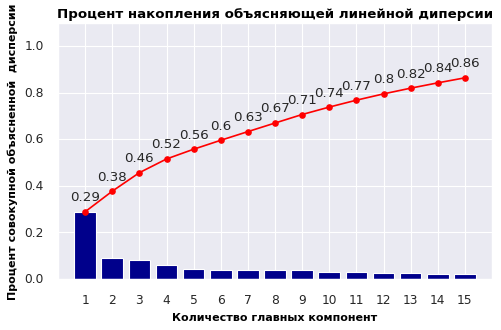

In [ ]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(
    np.arange(len(pd.DataFrame(data_pca).columns)) + 1,
    prop_varianza_acum,
    marker = 'o',
    color = 'red',
    markeredgecolor = 'black',
)

ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_,
    color = 'darkblue'
)

for x, y in zip(np.arange(len(pd.DataFrame(data_pca).columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Процент накопления объясняющей линейной диперсии', fontsize = 12, fontweight = 'bold', color = 'black')
ax.set_xlabel('Количество главных компонент',  fontsize = 10, fontweight = 'bold', color = 'black')
ax.set_ylabel('Процент совокупной объясненной  дисперсии',  fontsize = 10, fontweight = 'bold', color = 'black')
fig.show()

Этот график говорит нам о том, что мы не сможем объеснять дисперсию если сожмем наши данные к менее чем к 12 столбцам (там хотя бы 80 будет) Поэтому все что мы будем делать дальше очень спорно 12+ данных мы не визуализируем, а меньше использовать бессмысленно, на Kaggle используются алгоритмы кластеризации, но какой в этом продуктовый смысл не понятно. Менеджеры ждут от нас четких рекомендаций такого типа как ребята те кто покупает по сети наши или люди с доходом от столькито до стольки-то отреагируют на нашу компанию, им не нужны аморфные 20 столбцов характеристик которые непонятно что выражают. Но задание есть задание поэтому пойдем по пунктам

In [ ]:
pca = PCA(random_state = 42, svd_solver = 'full')
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('Количество столбцов до которых мы можем опуститься что бы сохранить 95% объеснения дисперсии равно - ', d)

Количество столбцов до которых мы можем опуститься что бы сохранить 95% объеснения дисперсии равно -  20


Да вот кстати код который показавает нам сколько нужно оставить столбцов для того что бы сохранить 95% объяснения дисперисии. Для ML на мой взгляд что 20 что 27 не особо сильно оличается, но пойдем по пунктам. Мы можем визуализировать 2 и 3 размерности обучим алгоримы и посмотрим что получается

In [ ]:
pca_2 = PCA(n_components = 2, random_state = 42)

data_pca_2 = pca_2.fit_transform(X)

total_var = pca_2.explained_variance_ratio_.sum() * 100

fig = px.scatter(
    data_pca_2, x=0, y=1, color=df_for_train['Response'],
    size=df_for_train['Response'] + 1,
    title=f'Общая объясненная дисперсия: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}

)


fig.show()

Итак видим что искомый кластер смещен более к верху, но группа плотная, алгоритмы кластризации с нею не справятся и да дисперия объясняется только на 37 %

In [ ]:
# Теперь с 3 компонентами
pca_3 = PCA(n_components = 3, random_state = 42)

data_pca_3 = pca_3.fit_transform(X)

total_var = pca_3.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    data_pca_3, x=0, y=1, z=2, color=df_for_train['Response'],
    title=f'Общая объясненная дисперсия: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

Тоже самое комок из данных не можем увидеть кластеры, дисперсия 45%

In [ ]:
umap_3 = umap.UMAP(n_components = 3, random_state = 42)

data_umap_3 = umap_3.fit_transform(X)

fig = px.scatter_3d(
    data_umap_3, x=0, y=1, z=2, color=df_for_train['Response'],
    title=f'Дисперсия наяву в исполнении UMAP',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Какие то отдельные кластеры есть но они не сочетаются с таргетом

In [ ]:
umap_2 = umap.UMAP(n_components = 2, random_state = 42)

data_umap_2 = umap_2.fit_transform(X)

fig = px.scatter(
    data_umap_2, x=0, y=1, color=df_for_train['Response'],
    size=df_for_train['Response'] + 1,
    title=f'Дисперсия в исполнении UMAP в двумерном пространстве',
    labels={'0': 'PC 1', '1': 'PC 2'}

)
fig.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Интересная картинка, но индивидуальных кластеров опять таки нет

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
X_lle_3 = LocallyLinearEmbedding(n_components=3, random_state=42).fit_transform(X)

fig = px.scatter_3d(
    X_lle_3, x=0, y=1, z=2, color=df_for_train['Response'],
    title=f'Дисперсия наяву в исполнении LocallyLinearEmbedding',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

И снова ничего хорошего, но уже что то интереснее

In [ ]:
X_lle_2 = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)

fig = px.scatter(
    X_lle_2, x=0, y=1, color=df_for_train['Response'],
    size=df_for_train['Response'] + 1,
    title=f'Дисперсия в исполнении LocallyLinearEmbedding в двумерном пространстве',
    labels={'0': 'PC 1', '1': 'PC 2'}

)
fig.show()

ТОже самое но в двумерном пространстве, есть что то интересное в этом, мы видим отдельный кластер в котором очень мало 0 и много единиц (в долях), но как я уже говорил продуктового вывода в этом нет

In [ ]:
lda_1 = LDA(n_components=1)
# Taking in as second argument the Target as labels
X_LDA_1D = lda_1.fit_transform(X, df_for_train['Response'])

fig = px.scatter(
    X_LDA_1D, x=0, color=df_for_train['Response'],
    size=df_for_train['Response'] + 1,
    title=f'Дисперсия в исполнении LDA в одномерном пространстве',
    labels={'0': 'PC 1'}

)
fig.show()

А вот это интереснее если мы сведем все данные к одному вектору то получим хоть какой то намек на резделение кластеров, чем больше наша единственная характеристика тем больше вероятность что мы попадем в клиента который отреагирует на компанию. Что бы график смотрелся мы по y отложили индексы инача все было бы в одну линию

TSNE какпризный алгоритм так же просто как другие не захотел работать на этих данных хотя на семинаре работал хорошо, но мы закостылили его и результат будет получен

In [ ]:
# Проверяем тип данных X
if isinstance(X, pd.DataFrame):
    # Сбрасываем индексы, если они есть
    X_reset = X.reset_index(drop=True)
    # Преобразуем DataFrame в массив NumPy
    X_np = X_reset.to_numpy()
    # Создаем объект TSNE и выполняем понижение размерности
    tsne_3 = TSNE(n_components=3, random_state=42)
    data_tsne_3 = tsne_3.fit_transform(X_np)
else:
    # Если X уже массив NumPy, то сразу выполняем понижение размерности
    tsne_3 = TSNE(n_components=3, random_state=42)
    data_tsne_3 = tsne_3.fit_transform(X)


In [ ]:
# Создание DataFrame для использования в plotly
df_tsne_3 = pd.DataFrame(data_tsne_3, columns=['PC1', 'PC2', 'PC3'])
df_tsne_3['Response'] = df_for_train['Response']

# Построение 3D scatter plot
fig = px.scatter_3d(df_tsne_3, x='PC1', y='PC2', z='PC3', color='Response',
                    title='Дисперсия наяву в исполнении TSNE',
                    labels={'PC1': 'PC 1', 'PC2': 'PC 2', 'PC3': 'PC 3'})
fig.show()


И как ожидалось снова провал - нет даже намека на правильные кластеры

In [ ]:
# Проверяем тип данных X
if isinstance(X, pd.DataFrame):
    # Сбрасываем индексы, если они есть
    X_reset = X.reset_index(drop=True)
    # Преобразуем DataFrame в массив NumPy
    X_np = X_reset.to_numpy()
    # Создаем объект TSNE и выполняем понижение размерности
    tsne_2 = TSNE(n_components=2, random_state=42)
    data_tsne_2 = tsne_2.fit_transform(X_np)
else:
    # Если X уже массив NumPy, то сразу выполняем понижение размерности
    tsne_2 = TSNE(n_components=2, random_state=42)
    data_tsne_2 = tsne_2.fit_transform(X)


# Создание DataFrame для использования в plotly
df_tsne_2 = pd.DataFrame(data_tsne_2, columns=['PC1', 'PC2'])
df_tsne_2['Response'] = df_for_train['Response']

# Построение 2D scatter plot
fig_2d = px.scatter(df_tsne_2, x='PC1', y='PC2', color='Response',
                    title='Дисперсия наяву в исполнении TSNE (2D)',
                    labels={'PC1': 'PC 1', 'PC2': 'PC 2'})

# Отображение графика
fig_2d.show()


И снова у нас нет четких кластеров в акцентом на таргет

#### - Примените 6 разных алгоритмов кластеризации (например, K-Means, DBSCAN) к преобразованным данным. Используйте переменную `Response` в качестве целевой.

Мы выбрали двумерные данные - нам же их визуалдизировать еще потом с помощью точечной диаграммы

In [ ]:
list_of_2D_data = [data_tsne_2, data_umap_2, data_pca_2,  X_lle_2]

In [ ]:
# у нас было много проблем с размерностью поэтому вот такой блок проверки не помешает
for i, data in enumerate(list_of_2D_data):
    print(f"Размерность данных {i}: {data.shape}")


Размерность данных 0: (2236, 2)
Размерность данных 1: (2236, 2)
Размерность данных 2: (2236, 2)
Размерность данных 3: (2236, 2)


In [ ]:
import warnings

# Временно отключаем вывод предупреждений
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, MiniBatchKMeans, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.metrics import silhouette_score

# Список алгоритмов кластеризации
clustering_algorithms = [
    KMeans(n_clusters=2),  # Пример: K-Means
    AgglomerativeClustering(n_clusters=2),  # Пример: Agglomerative Clustering
    Birch(n_clusters=2),  # Пример: Birch
    MiniBatchKMeans(n_clusters=2),  # Пример: Mini-Batch K-Means
    MeanShift(),  # Пример: Mean Shift
    DBSCAN()
]

# Преобразование таргетного столбца в массив NumPy
target = df_for_train['Response'].to_numpy()
# Создаем список имен переменных для названий датасетов
list_of_2D_data_names = ['data_tsne_2', 'data_umap_2', 'data_pca_2', 'X_lle_2']

# Применение каждого алгоритма кластеризации
for algorithm in clustering_algorithms:
    for i, data in enumerate(list_of_2D_data):
        # Обучение модели кластеризации
        algorithm.fit(data)

        # Получение меток кластеров
        cluster_labels = algorithm.labels_

        # Проверка на случай, если алгоритм выдает только один кластер
        if len(np.unique(cluster_labels)) > 1:
            # Вычисление метрик
            ari = adjusted_rand_score(target, cluster_labels)
            ami = adjusted_mutual_info_score(target, cluster_labels)
            silhouette_avg = silhouette_score(data, cluster_labels)

            # Вывод результатов
            print(f"Algorithm: {algorithm.__class__.__name__}, Dataset {list_of_2D_data_names[i]}:")
            print(f"Adjusted Rand Index (ARI): {ari}")
            print(f"Adjusted Mutual Information (AMI): {ami}")
            print(f"Silhouette Score: {silhouette_avg}")
            print()

# Восстанавливаем обычный вывод предупреждений
warnings.filterwarnings('default')


Algorithm: KMeans, Dataset data_tsne_2:
Adjusted Rand Index (ARI): 0.013744247033629895
Adjusted Mutual Information (AMI): 0.03570347748573243
Silhouette Score: 0.4462453883457969

Algorithm: KMeans, Dataset data_umap_2:
Adjusted Rand Index (ARI): 0.2512639031832627
Adjusted Mutual Information (AMI): 0.11210136442150986
Silhouette Score: 0.5924270153045654

Algorithm: KMeans, Dataset data_pca_2:
Adjusted Rand Index (ARI): 0.05637382248703688
Adjusted Mutual Information (AMI): 0.03137880269366609
Silhouette Score: 0.5792804124994296

Algorithm: KMeans, Dataset X_lle_2:
Adjusted Rand Index (ARI): 0.07234123010793828
Adjusted Mutual Information (AMI): 0.03716763815725712
Silhouette Score: 0.9731246790722097

Algorithm: AgglomerativeClustering, Dataset data_tsne_2:
Adjusted Rand Index (ARI): -0.014415504788258168
Adjusted Mutual Information (AMI): 0.023496301852230457
Silhouette Score: 0.4398785714038196

Algorithm: AgglomerativeClustering, Dataset data_umap_2:
Adjusted Rand Index (ARI): 0

Adjusted Rand Index (ARI):

Это мера сходства между двумя наборами меток кластеров. Она варьируется от -1 до 1, где 1 означает идеальное совпадение меток кластеров, 0 означает случайное совпадение, а -1 означает полное несовпадение меток. Чем выше значение ARI, тем лучше.

Adjusted Mutual Information (AMI):

Это также мера сходства между двумя наборами меток кластеров, но учитывает случайное совпадение. Она варьируется от 0 до 1, где 1 означает идеальное совпадение меток кластеров, а 0 означает случайное совпадение. Чем выше значение AMI, тем лучше.

Silhouette Score:

Это мера того, насколько объекты в кластерах сгруппированы по сравнению с другими кластерами. Он вычисляется как среднее значение силуэта по всем объектам. Силуэт каждого объекта измеряет, насколько он близок к другим объектам своего кластера по сравнению с объектам в других кластерах. Silhouette Score варьируется от -1 до 1, где более высокое значение указывает на более компактные и отделенные кластеры.

Исходя из этих метрик ни один из ниших вариантов кластеризации даже близко не подходит к той разметке что у нас есть. Метрика через силуэт показывает что в данных есть кластеры которые отличаются, но получается что они никак не совпадают с нашей разметкой.

- Вывод понижение размерности (ну по крайней мере в моей реализации) и последующая кластеризации это не то что нам поможет классифицировать клиентов

LocallyLinearEmbedding единственный вид понижения размерности внутри которого кластеризация может распознать четкие кластеры, но они не совпадают с нашими таргетами о чем нам говорят метрики AMI ARI

#### Создайте полотно из 24 графиков, визуализируйте результаты кластеризации с использованием `scatter plot`.

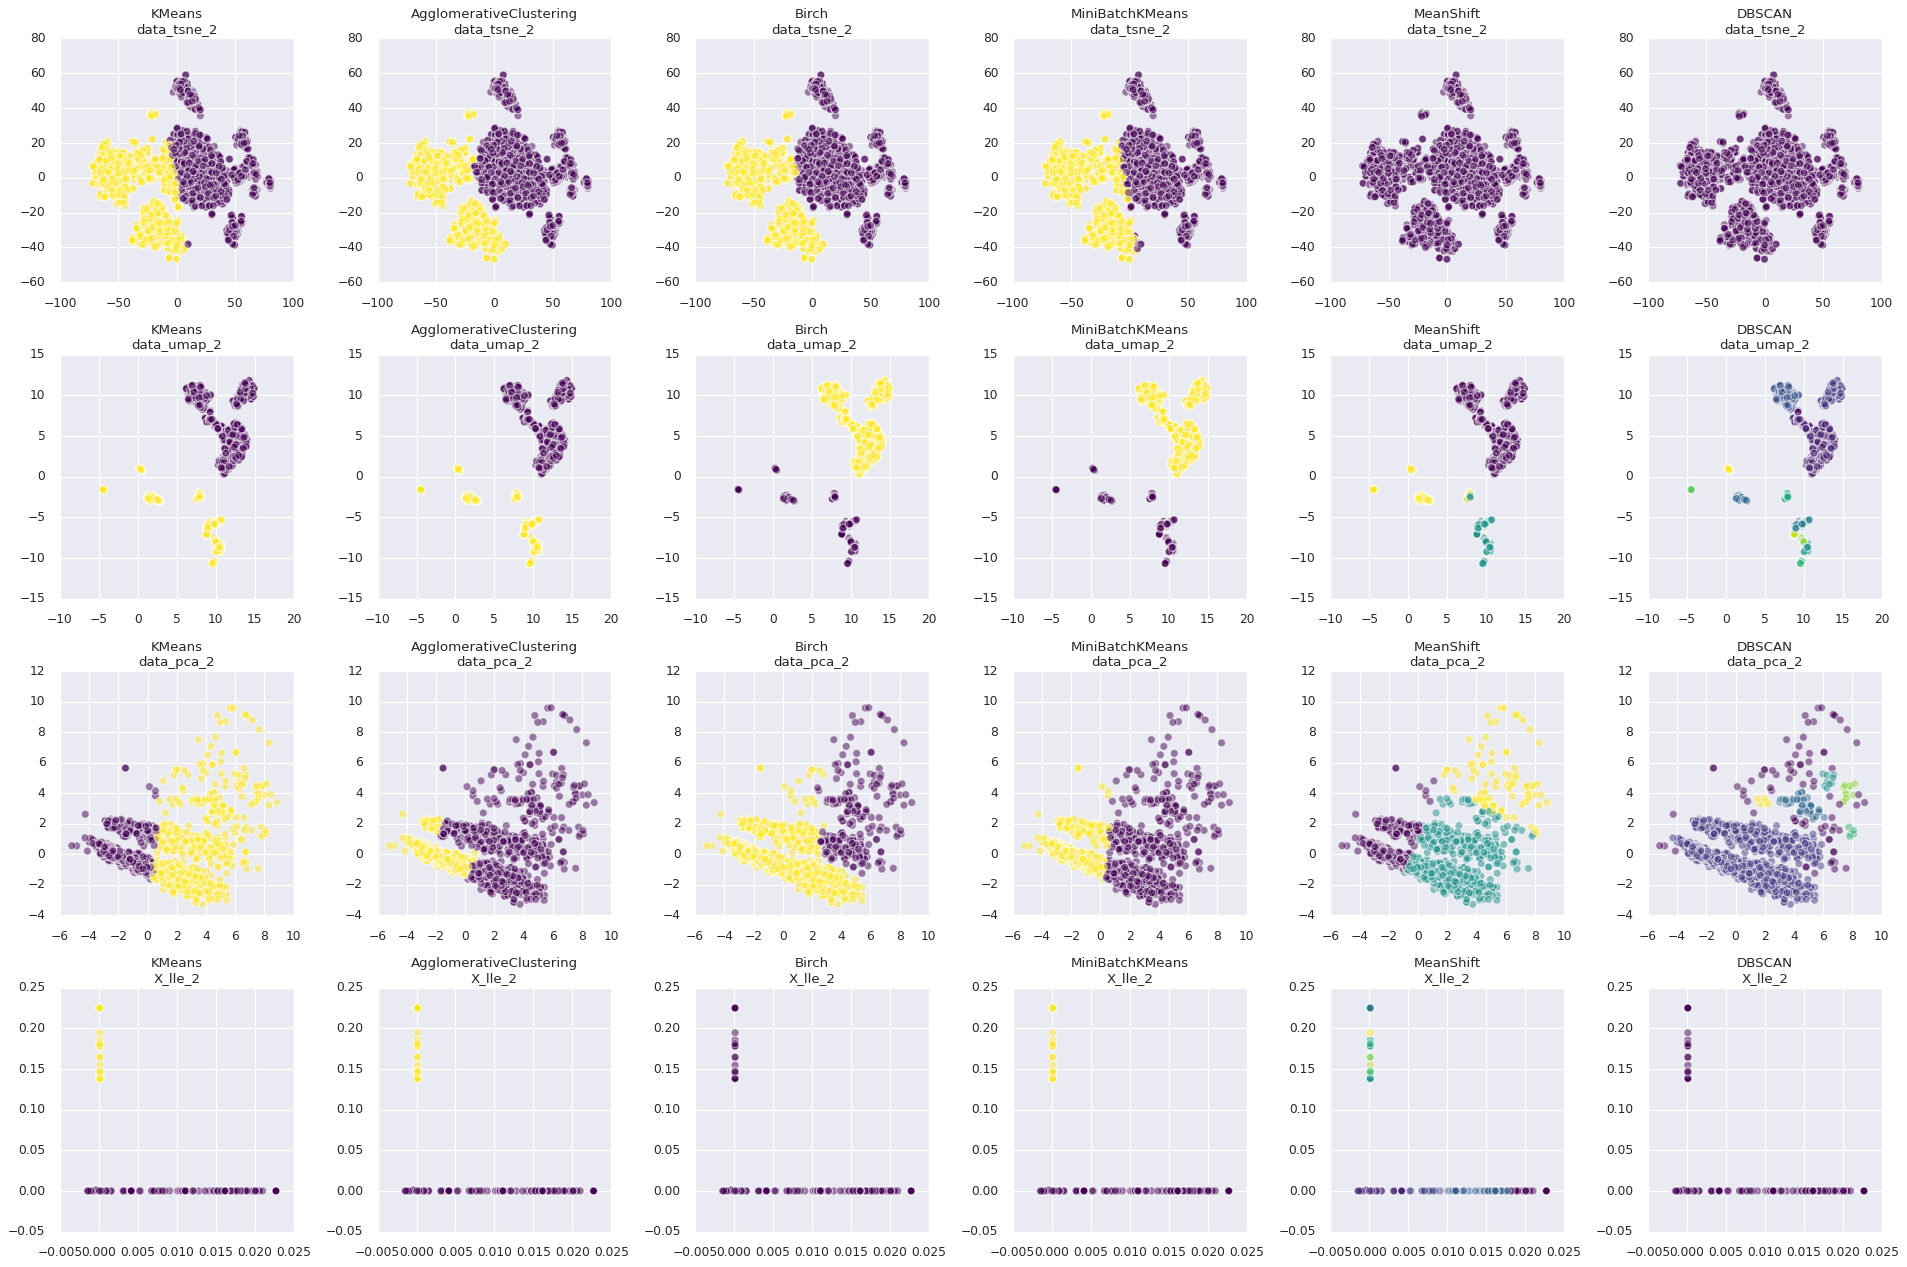

In [ ]:
# Временно отключаем вывод предупреждений
warnings.filterwarnings('ignore')

# Создание полотна с 24 графиками
fig, axs = plt.subplots(4, 6, figsize=(24, 16))

# Список алгоритмов кластеризации
clustering_algorithms = [
    KMeans(n_clusters=2),  # Пример: K-Means
    AgglomerativeClustering(n_clusters=2),  # Пример: Agglomerative Clustering
    Birch(n_clusters=2),  # Пример: Birch
    MiniBatchKMeans(n_clusters=2),  # Пример: Mini-Batch K-Means
    MeanShift(),  # Пример: Mean Shift
    DBSCAN()
]

# Создаем список имен переменных для названий датасетов
list_of_2D_data_names = ['data_tsne_2', 'data_umap_2', 'data_pca_2', 'X_lle_2']

# Применение каждого алгоритма кластеризации
for j, data in enumerate(list_of_2D_data):
    for i, algorithm in enumerate(clustering_algorithms):
        # Обучение модели кластеризации
        algorithm.fit(data)

        # Получение меток кластеров
        cluster_labels = algorithm.labels_

        # Определение позиции на сетке
        row = j
        col = i
        ax = axs[row, col]

        # Создание scatter plot
        ax.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
        ax.set_title(f"{algorithm.__class__.__name__}\n{list_of_2D_data_names[j]}")

# Отображение графиков
plt.tight_layout()
plt.show()


Вот мы видим алгоритмы отработали и нашли кластера, только они как мы уже поняли ранее не сочетаются с нашими таргетами и не имеют продуктового выхода, но визуализация получилась красивая

#### Оцените качество кластеризации с помощью подходящих метрик (например, силуэта). Для оценки качества работы разных алгоритмов в сочетании с разными алгоритмами понижения размерности, можно построить `heatmap`.

Мы уже оценили выше по трем метрикам и поняли, что или я что то не так делаю или понижение размерности и кластеризация тут работают как то не в тему. Плюс почему то результаты кластеризации обобразились только для DBSCAN







**Критерии оценивания:**

* Используемый метод понижения размерности сохраняет значимую долю объясненной дисперсии — 1 балл за каждые два метода, максимум 2 балла.
* С помощью графиков сравнена работа минимум четырех алгоритмов кластеризации — 2 балла, +1 балл за каждый последующий, максимум 4 балла.
* Выбор оптимального сочетания алгоритма и метода понижения размерности опирается на построенные графики — 4 балла.
* Графики собраны в одно полотно — 2 балла.
* Для каждого алгоритма корректно подобрана метрика качества — 3 балла.

### Обоснование выбора комбинации

`Напишите обоснование в свободной форме`.

Ответ будет такой, кластеризация с понижением размерности для задачи не подходит, более менее приемлимый визуально результат я получил только когда применял снижение характеристик к одному вектору при помощи LDA, в остальном все варианты получились ужасными. ДУмается что задача должна решаться без понижения размерности вот этим и займемся далее. На Kaggle мы видили что значимой может быть метрика общее количество потраченных денег на товары мы используем ее потом

## Задание 4. Поиск аномалий (15 баллов)

Это творческое задание, оно максимально приближено к условиям настоящей работы. В нем нет четкого алгоритма выполнения и правильного ответа. Мы ожидаем, что вы продемонстрируете умение широко подходить к решению задачи и сможете сделать обоснованное предположение. Значима внутренняя логика ваших рассуждений и их корректность, поэтому попробуйте самостоятельно нащупать аномалии в датасете.

- Используйте методы обнаружения аномалий (например, Isolation Forest, Local Outlier Factor) для выявления необычных наблюдений в данных.
- Визуализируйте аномалии на графике, используя разные цвета или маркеры для обычных и аномальных точек. Какие результаты вы получили?
- Оцените, какие характеристики клиентов чаще всего связаны с аномальным поведением. Опишите и дайте качественную интерпретацию полученным результатам.

**Критерии оценивания**:

* Использовано 3 или более алгоритмов поиска аномалий — 3 балла.
* При анализе и сравнении результатов использованы корректные визуализации — 3 балла.
* Результаты работы алгоритмов качественно (опираясь на экспертные знания) верифицированы — 6 баллов.
* Вывод о наличии или отсутствии аномалий опирается на построенные визуализации — 3 балла.


Частично мы удалили аномалии глазами, то есть мы уже исключили 4 строчки людей с невероятным доходом и очень возрастных, далее мы пониманем что поиск аномалий нам необходимо осуществлять либо в размеченных либо в неразмеченных данных, попробуем оба варианта

In [ ]:
# Еще раз обновим наш набор данных для обучения, видимо я что то намудрил с размерностью и правильные наборы слетают

df_for_train = df_fixed.copy()
df_for_train.drop(columns = ['Year_Birth', 'Dt_Customer'], inplace=True)

In [ ]:
drop_cols = ['Response']

X = df_for_train.drop(drop_cols, axis=1, errors = 'ignore')
y = df_for_train['Response']

In [ ]:
cat_features = ['Education', 'Marital_Status']

In [ ]:
# перекодируем категориальные признаки
le = LabelEncoder()
for col in cat_features:
    X[col] = le.fit_transform(X[col])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import numpy as np

# Список методов для выявления аномалий
anomaly_algorithms = [
    ("KMeans", KMeans(n_clusters=2)),
    ("Isolation Forest", IsolationForest(contamination=0.1)),
    ("Local Outlier Factor", LocalOutlierFactor(contamination=0.1)),
    ("One-Class SVM", OneClassSVM(nu=0.1))

]

# Применяем каждый метод и выводим аномальные строки
for name, algorithm in anomaly_algorithms:
    if name == "One-Class SVM":
        # Обучаем One-Class SVM на данных и предсказываем аномалии
        algorithm.fit(X)
        outliers = algorithm.predict(X)
        anomaly_indices = np.where(outliers == -1)[0]
    else:
        # Обучаем другие алгоритмы на данных и предсказываем аномалии
        outliers = algorithm.fit_predict(X)
        anomaly_indices = np.where(outliers == -1)[0]

    # Выводим результаты
    print(f"{name}: Number of anomalies detected: {len(anomaly_indices)}")
    print(f"Anomalous indices: {anomaly_indices}")



KMeans: Number of anomalies detected: 0
Anomalous indices: []
Isolation Forest: Number of anomalies detected: 224
Anomalous indices: [   9   15   18   21   27   53   55   67   77   87   98  111  113  116
  124  155  164  176  179  202  208  216  230  238  241  244  246  250
  264  286  293  310  317  334  339  348  357  401  409  414  415  421
  423  424  427  444  453  460  463  469  516  520  540  554  556  572
  583  588  619  624  641  643  647  678  684  685  700  702  720  731
  732  746  750  788  801  817  821  823  842  849  851  852  867  872
  894  911  914  921  924  940  942  963  969  981  984  987  997  998
  999 1007 1013 1027 1039 1047 1049 1057 1058 1063 1064 1072 1081 1084
 1097 1108 1110 1112 1130 1131 1176 1188 1196 1234 1242 1249 1256 1259
 1262 1277 1278 1285 1295 1298 1304 1305 1310 1320 1326 1329 1331 1339
 1382 1408 1410 1429 1440 1441 1455 1470 1477 1484 1485 1489 1504 1525
 1567 1569 1574 1598 1604 1638 1650 1666 1667 1684 1696 1707 1708 1718
 1719 1746 1785

Что же мы видим что аномальные строки найдены и их около 200. Они разные для разных моделей, но есть и очень много схожих. НО мы должны помнить что их количество зависит от процента который мы задали алгоритму и поэтому ориентироваться на них точно не стоит, попробуем визуализировать где в нас аномалии, возлмем последний вывод от SVM и попробуем визуализировать поиск аномалий

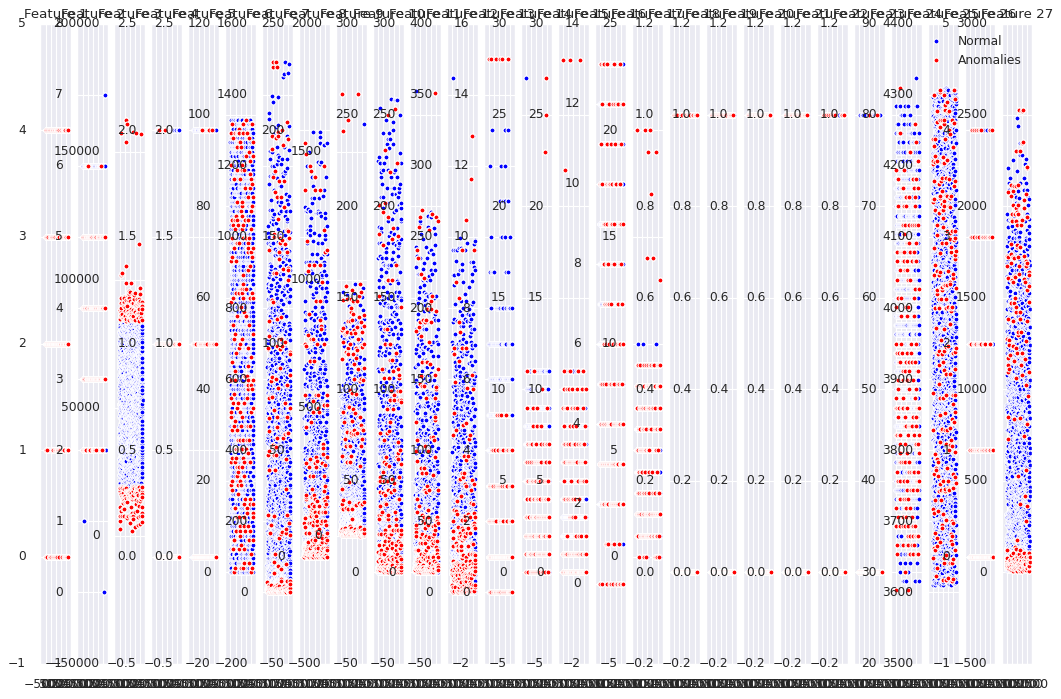

In [ ]:
# Определяем размеры сетки графиков
num_cols = X.shape[1]
num_rows = 1

# Создаем сетку графиков
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 10))

# Перебираем столбцы данных X
for i in range(num_cols):
    # Создаем точечный график для текущего столбца данных
    ax = axs[i] if num_rows == 1 else axs[i // num_cols, i % num_cols]

    # Отображаем нормальные точки синим цветом
    ax.scatter(X.index, X.iloc[:, i], c='blue', label='Normal')

    # Отображаем аномальные точки красным цветом
    ax.scatter(anomaly_indices, X.iloc[anomaly_indices, i], c='red', label='Anomalies')

    # Добавляем заголовок к текущему графику
    ax.set_title(f'Feature {i+1}')

# Отображаем легенду
plt.legend()

# Отображаем графики
plt.tight_layout()
plt.show()



Не красиво, попробуем по другому

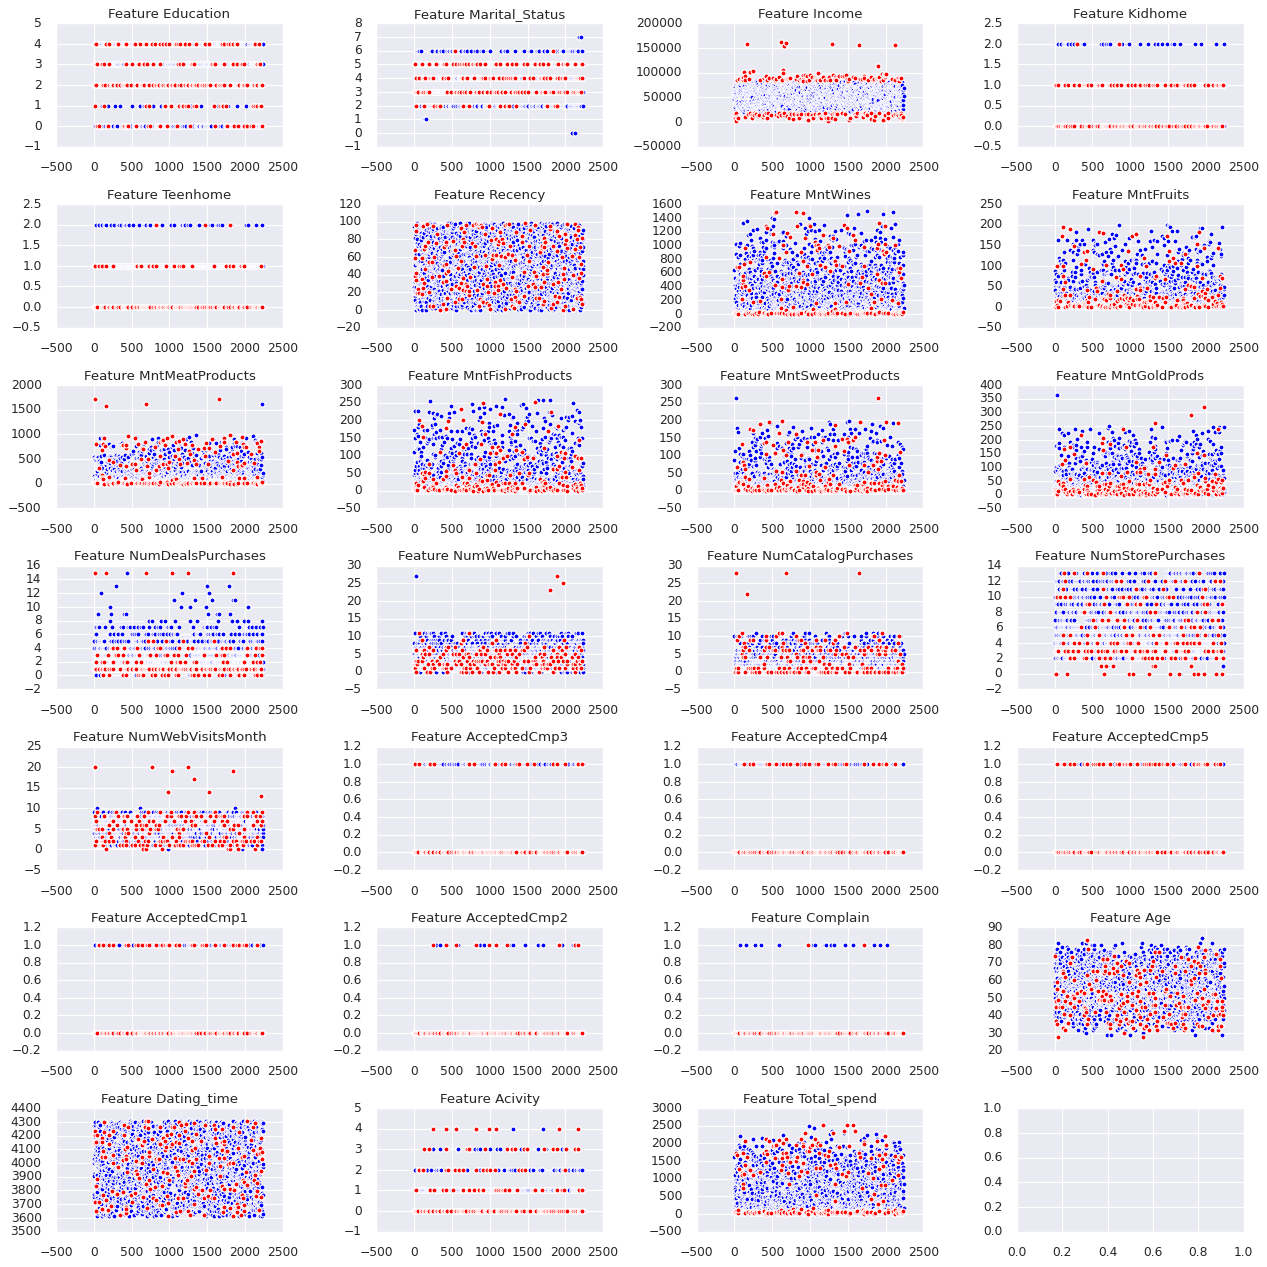

In [ ]:
# Определяем количество строк и столбцов в сетке графиков
num_cols = 4
num_rows = (X.shape[1] + num_cols - 1) // num_cols

# Создаем сетку графиков
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# Перебираем столбцы данных X
for i, col in enumerate(X.columns):
    # Определяем текущий подграфик
    ax = axs[i // num_cols, i % num_cols] if num_rows > 1 else axs[i % num_cols]

    # Отображаем нормальные точки синим цветом
    ax.scatter(X.index, X.iloc[:, i], c='blue', label='Normal')

    # Отображаем аномальные точки красным цветом
    ax.scatter(anomaly_indices, X.iloc[anomaly_indices, i], c='red', label='Anomalies')

    # Добавляем заголовок к текущему графику
    ax.set_title(f'Feature {col}')

# Отображаем легенду
plt.legend()

# Отображаем графики
plt.tight_layout()
plt.show()


Получалось что то интересное во первых на графиках четко видно что доход ниже и выше определенного предела модель вопспринимает как аномалию и это логично (у нас получился прям коридор из 1 и 3 квантилей среднего) Аналогичное наблюдение можно сделать и для количества сделок, есть логика и в том что те люди которые много покупают по сети почему зачислены в аномалии. Люди которые не отреагировали ни на одну компанию зачислены в аномалии, равно как и бездетные. А в остальном аномалии смешиваются с нормальными и логику работы алгоритма и сочетания каких признаков он применял для маркировки аномалий понять невозможно

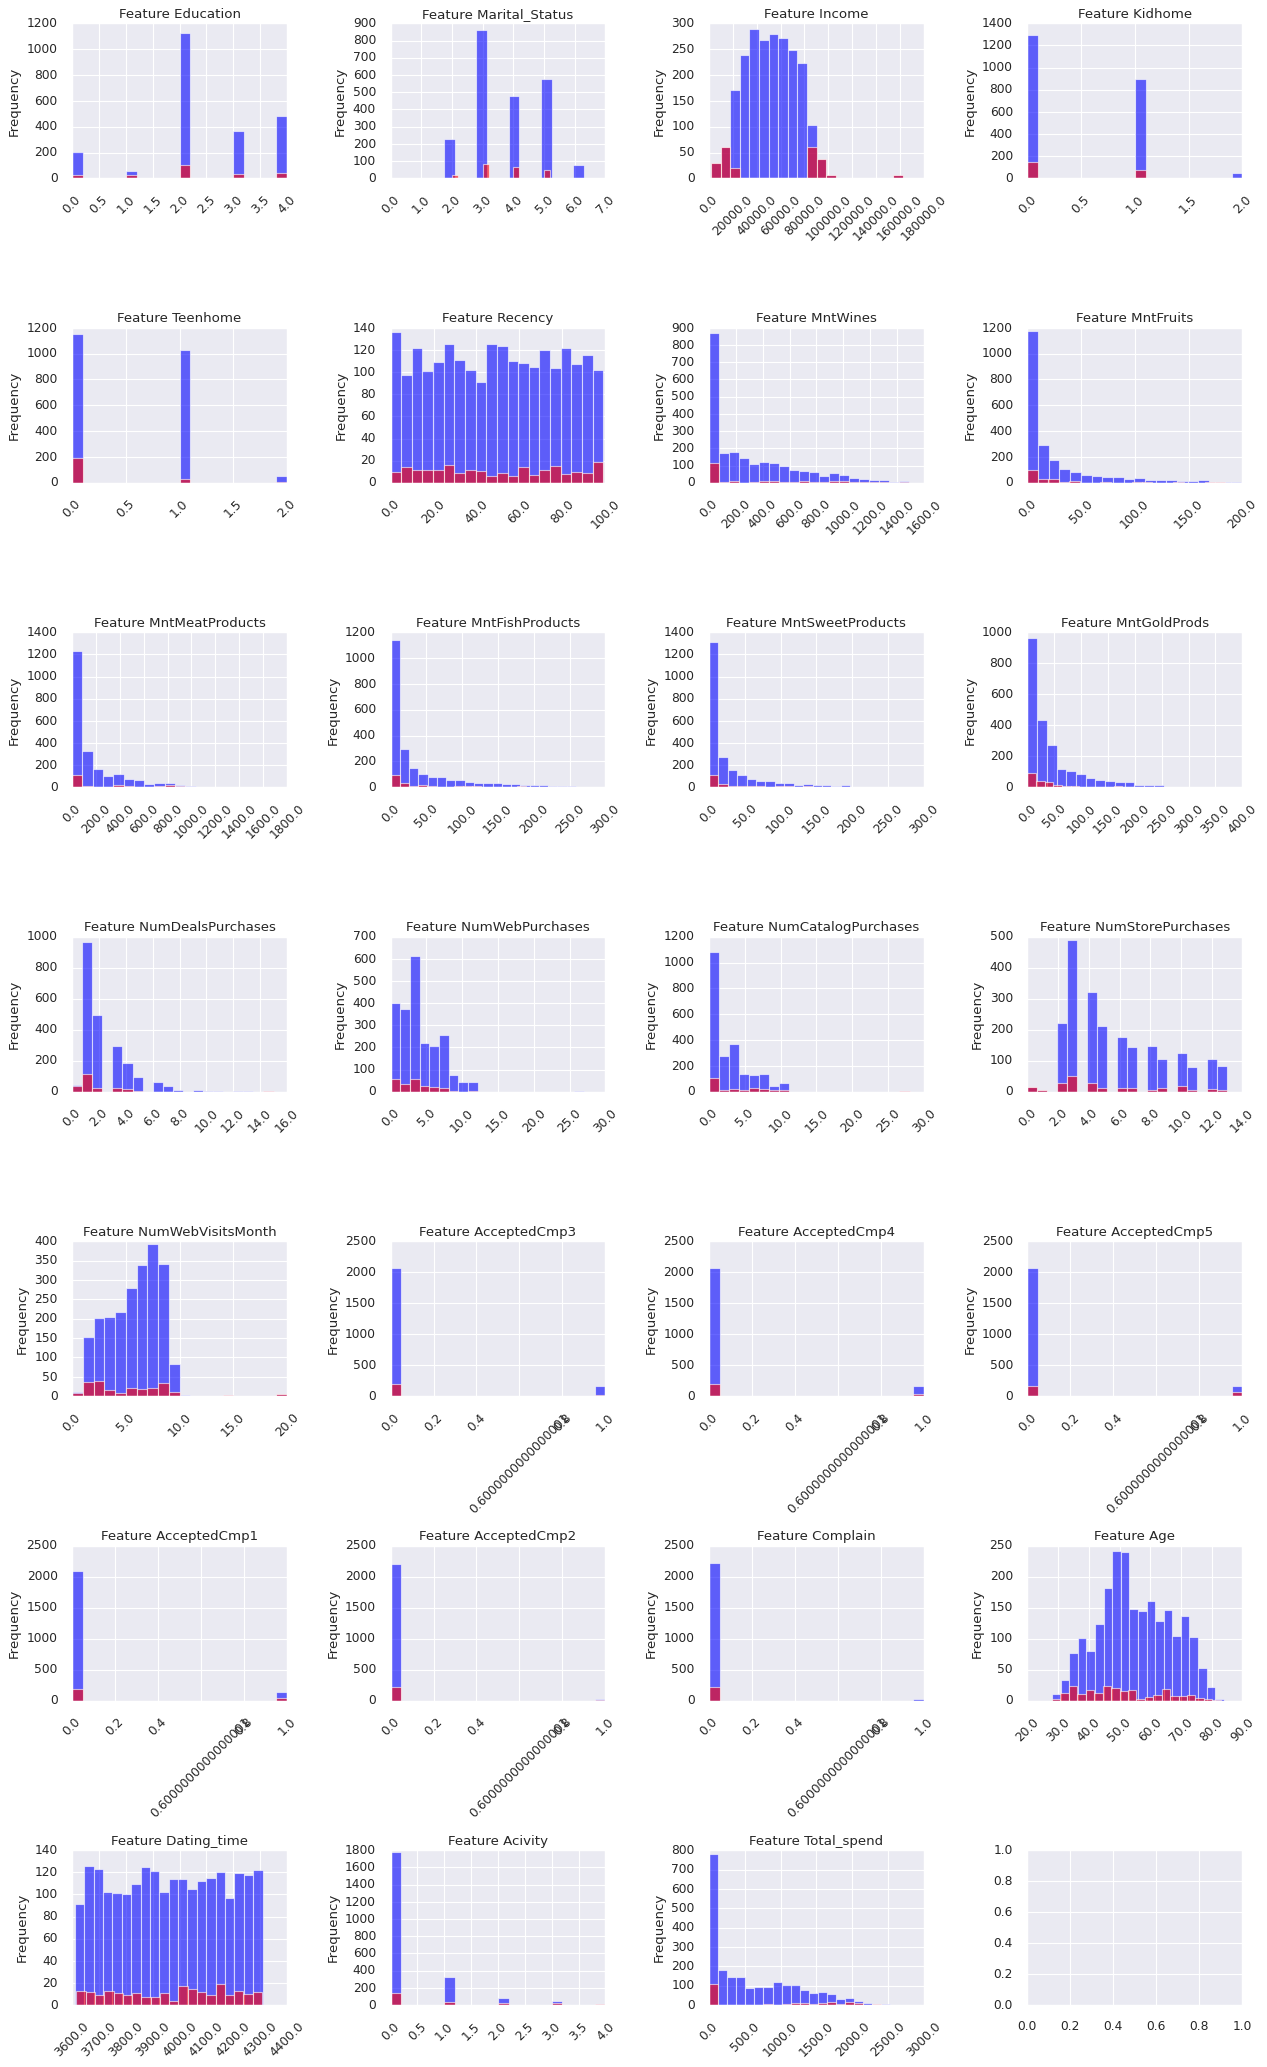

In [ ]:
# Определяем количество строк и столбцов в сетке графиков
num_cols = 4
num_rows = (X.shape[1] + num_cols - 1) // num_cols

# Создаем сетку графиков
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 26))

# Перебираем столбцы данных X
for i, col in enumerate(X.columns):
    # Определяем текущий подграфик
    ax = axs[i // num_cols, i % num_cols] if num_rows > 1 else axs[i % num_cols]

    # Отображаем гистограмму для текущего столбца данных
    X[col].plot(kind='hist', bins=20, ax=ax, color='blue', alpha=0.6)

    # Выделяем аномальные значения красным цветом
    ax.hist(X.iloc[anomaly_indices][col], bins=20, color='red', alpha=0.6)

    # Устанавливаем заголовок для текущего подграфика
    ax.set_title(f'Feature {col}')

    # Поворот меток на оси x
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

# Отображаем графики
plt.tight_layout()
plt.show()


Ну и вот такой варинат в принципе возможнен но не так нагляден как точечная диаграмма мы можем понять логику аномальности только по столбцу общий доход они по бокам от среднего +- несколько отклонений

### Обоснование (не)обнаруженных аномалий

`Напишите обоснование в свободной форме`.

В целом мы нашли 4 главные аномалии еще на первых этапах и удалили их, эти 200 + аномалий которые мы выявлили мы удалять не будем, потому что за ними нет четкой логики а данных очень мало, попробуем обучать алгоритмы с этими аномалиями и посмотрим на результат. Конечно мы еще можем удалить несколько аномалий с очень низким и очень высоким доходом но этого тоже делать пока не будем


## Задание 5. Прогнозирование отклика на маркетинговую кампанию (12 баллов)
- Постройте модель логистической регрессии для прогнозирования отклика клиента на маркетинговую кампанию (переменная Response).
- Оцените значимость признаков и их влияние на вероятность отклика.
- Визуализируйте ROC-кривую и рассчитайте площадь под кривой (AUC) для оценки качества модели.
- Постройте любые 3 других модели и визуализацию результатов их работы. Также постройте визуализацию кривых ROC-AUC. Опишите, какие модели отработали лучше.

**Критерии оценивания**:

* Вывод о лучшей модели корректен и основан на построенных визуализациях — 6 баллов.
* Визуализации позволяют корректно сравнить результаты работы моделей — 6 баллов.

Итак приступим, у нас сохранились корректные X и y, проверим это

In [ ]:
X.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          2               4  58138.0        0         0       58       635   
1          2               4  46344.0        1         1       38        11   
2          2               5  71613.0        0         0       26       426   
3          2               5  26646.0        1         0       26        11   
4          4               3  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Age  Dating_time  \
0             0             0             0         0   67         4273   
1             0             0             0         0   70         3723   
2             0             0             0         0   59         3922   
3             0             0             0         0   40         3749   
4             0             0             0         0   43         3771   

   Acivity  Total_spend  
0        0         1617  
1        0           27  
2        0          776  
3        0           53  
4        0          422

In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочную и тестовую выборку с учетом сохранения баланса по y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Проверка размеров выборок
print(f"Размер тренировочной выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")
print(f"Размеры таргетов тренировочной выборки: {y_train.shape[0]}")
print(f"Размеры таргетов тестовой выборки: {y_test.shape[0]}")


Размер тренировочной выборки: 1788
Размер тестовой выборки: 448
Размеры таргетов тренировочной выборки: 1788
Размеры таргетов тестовой выборки: 448


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель логистической регрессии
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       381
           1       0.66      0.34      0.45        67

    accuracy                           0.88       448
   macro avg       0.78      0.66      0.69       448
weighted avg       0.86      0.88      0.86       448



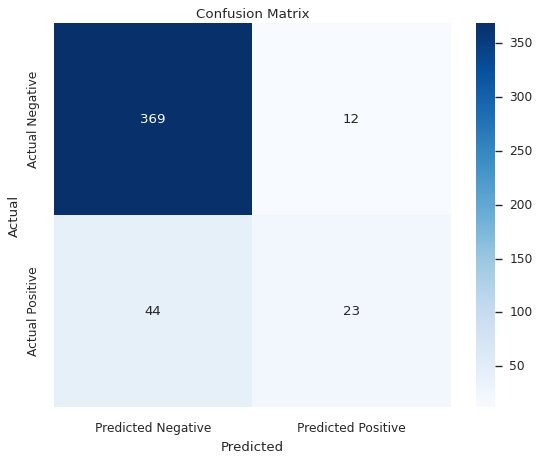

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix

# Получаем предсказания для тестовой выборки
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred_log_reg)
classification_rep = classification_report(y_test, y_pred_log_reg)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Выводим метрики
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

# Визуализируем матрицу ошибок как тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Что же мы получили неплохой результат на Kaggle у кода с серебром такой же, но мы конечно видим, что пропускаем очень много клиентов которые бы отреагировали на нашу маркетинговую компанию мы на тесте выявили только 23 а 44 пропустили, это плохо и 88% точность это не та метрика на которую мы должны равняться на нужен Recall для 1, но наша задача не в накручивании скора, а в визуализации и и ответе на вопросы зачета вот этим и замемся

Feature Importance:


Feature  Coefficient  Absolute Coefficient
24          Dating_time     0.890095              0.890095
5               Recency    -0.849982              0.849982
15    NumStorePurchases    -0.634469              0.634469
4              Teenhome    -0.554615              0.554615
25              Acivity     0.425053              0.425053
0             Education     0.413996              0.413996
17         AcceptedCmp3     0.384513              0.384513
8       MntMeatProducts     0.319904              0.319904
19         AcceptedCmp5     0.286613              0.286613
20         AcceptedCmp1     0.255154              0.255154
16    NumWebVisitsMonth     0.243773              0.243773
13      NumWebPurchases     0.242148              0.242148
7             MntFruits     0.221435              0.221435
12    NumDealsPurchases     0.213538              0.213538
6              MntWines    -0.177897              0.177897
2                Income     0.156948              0.156948
23                  Age     0.151467              0.151467
18         AcceptedCmp4     0.138619              0.138619
21         AcceptedCmp2     0.124786              0.124786
14  NumCatalogPurchases     0.121718              0.121718
10     MntSweetProducts    -0.116999              0.116999
1        Marital_Status    -0.058203              0.058203
22             Complain     0.053949              0.053949
9       MntFishProducts    -0.047334              0.047334
11         MntGoldProds     0.040277              0.040277
26          Total_spend     0.026061              0.026061
3               Kidhome    -0.010342              0.010342

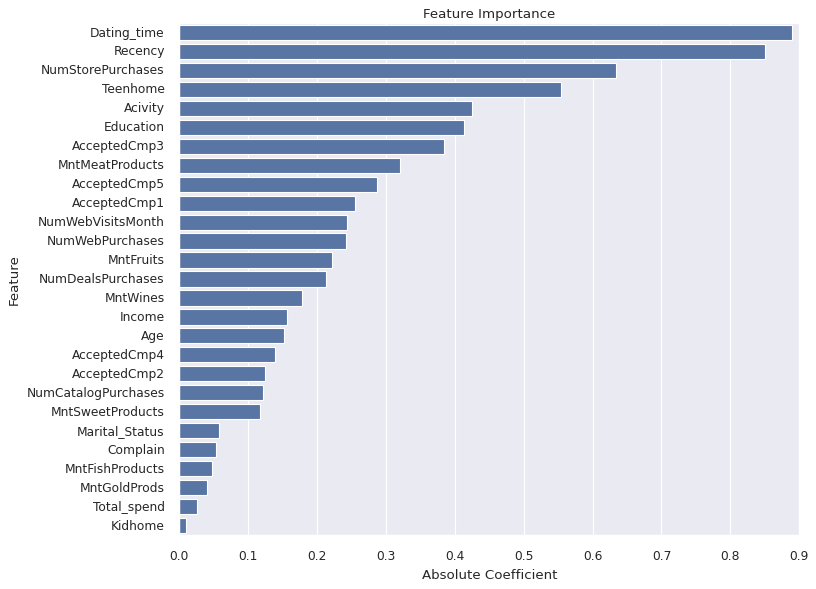

In [ ]:
# Получаем коэффициенты модели
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Добавляем столбец с абсолютными значениями коэффициентов для сортировки
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()

# Сортируем признаки по значимости
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("Feature Importance:")
display(feature_importance)

# Визуализация значимости признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()



Вот мы сами реализовали значимость признаков без каких либо сторонних библиотек. И что мы видим мы ориентируемя на коэфициенты и понимаем что наиболее значимый у нас это дата начала знакомства он положительный и умножается на 0,89 то есть чем раньше человек попал в базу тем больше у него шансов отреагировать на компанию, и это логично это старые проверенные клиенты. Следующий коэфициент что то типа сколько прошло с последней транзакции, это похожая метрика но у нее отрицательный коэфициент это значит чем меньше прошло от последней покупки тем больше шанс, что клиент отреагирует на маркетинговую компанию - и это тоже очень логично (никакого черного ящика). Далее идет уже странный отрицательный коэфициент -0,63 чем больше человек купил в магазине тем меньге вероятность того что он положительно отреагирует на нашу маркетинговую коспанию. Что же есть в этом тоже логика, что то типа того то что я хочу я куплю в магазине мне не интересно что там предлагают на сайтах или в рассылках (а именно так наверное и работает маркетинг) => нужно делать больше рекламы в самих магазинах. Ну дальше коэфициенты не очень интересные.

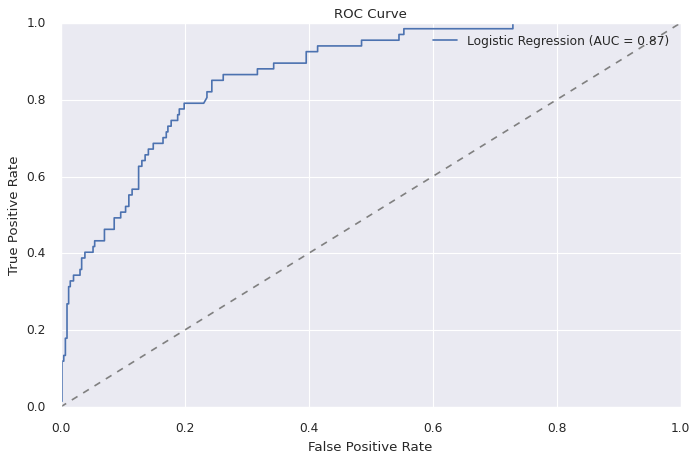

In [ ]:
# Получаем предсказанные вероятности для тестовой выборки
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Рассчитываем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Рассчитываем AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Визуализируем ROC-кривую
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Вот собственно наша ROC кривая и площадь под ней рассчитана как 0,87 как минимум мы можем сказать что наша модель работает не по принципу случайности, ну и в целом все что касается клиентского спроса все что больше 0,8 уже хорошо

Но попробуем еще какие нибудь модели, на очереди CatBoost!!!

In [ ]:
%pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier


In [ ]:
cat_features

['Education', 'Marital_Status']

In [ ]:
cat_boost = CatBoostClassifier(random_state=42,
                           cat_features=cat_features,
                           thread_count=-1)
cat_boost.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=100, plot=False,
          early_stopping_rounds=100)

Learning rate set to 0.03658
0:	learn: 0.6590929	test: 0.6610731	best: 0.6610731 (0)	total: 26.7ms	remaining: 26.7s
100:	learn: 0.1991650	test: 0.2753201	best: 0.2751835 (99)	total: 1.04s	remaining: 9.24s
200:	learn: 0.1434080	test: 0.2602168	best: 0.2599739 (186)	total: 2.01s	remaining: 7.98s
300:	learn: 0.1048011	test: 0.2591487	best: 0.2575663 (231)	total: 3.23s	remaining: 7.49s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2575662662
bestIteration = 231

Shrink model to first 232 iterations.


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       381
           1       0.82      0.40      0.54        67

    accuracy                           0.90       448
   macro avg       0.86      0.69      0.74       448
weighted avg       0.89      0.90      0.88       448



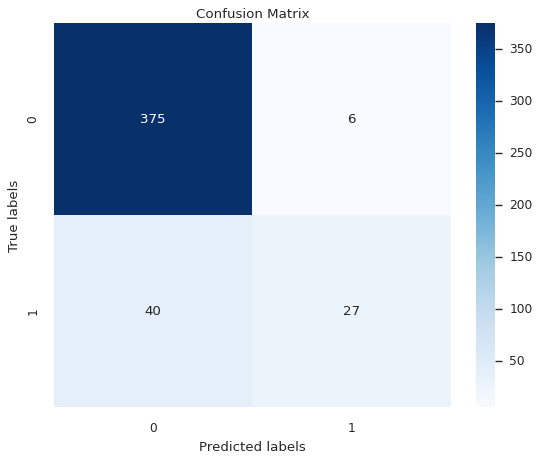

In [ ]:
# Модельная предсказания
y_pred_cat = cat_boost.predict(X_test)

# Вывод отчета о классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_cat))

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_cat)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Итак мы видим уже точноть 90%, это лучше чем открытые бронзовые и серебряные коды на Kaggle, ранее я прогонял сырые данные через catboost и получал 88%, наш успех это удаление 4 аномалий + 4 сгенерированных столбца: даты мы перевели в года и дни с момента регистрации и плюс добавли суммурные столбцы по общим тратам и на сколько компаний отреагировал человек, посмотрим как вплетаются они в значимость. У catboost есть встроенные методы для просмотра значимости признаков вот ими и воспользуемся

In [ ]:
# посмотрим на важность признаков катбуста
fi = cat_boost.get_feature_importance(prettified=True)
fi

Feature Id  Importances
0               Recency    14.285024
1           Dating_time    13.014708
2        Marital_Status     7.592280
3               Acivity     7.516198
4     NumStorePurchases     5.992920
5   NumCatalogPurchases     5.089639
6       MntMeatProducts     4.723126
7     NumWebVisitsMonth     4.463889
8              Teenhome     4.440132
9             Education     3.710451
10         MntGoldProds     3.392881
11               Income     3.376129
12                  Age     3.049131
13          Total_spend     2.724631
14             MntWines     2.363731
15      MntFishProducts     2.162548
16    NumDealsPurchases     2.115893
17     MntSweetProducts     2.108961
18         AcceptedCmp3     1.855692
19      NumWebPurchases     1.765420
20            MntFruits     1.728799
21              Kidhome     0.975611
22         AcceptedCmp5     0.697373
23         AcceptedCmp1     0.695863
24         AcceptedCmp4     0.082005
25         AcceptedCmp2     0.064059
26             Complain     0.012910

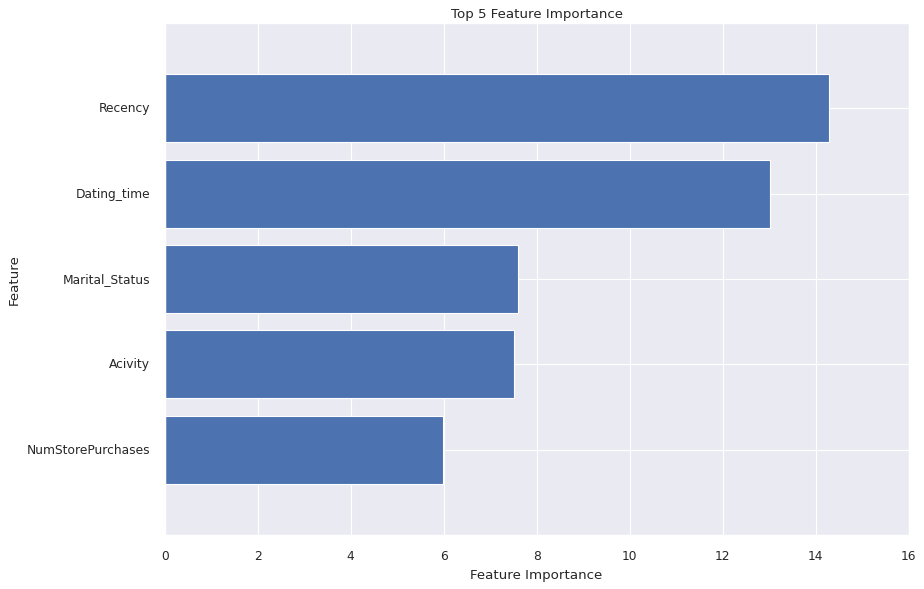

In [ ]:
feature_importance = cat_boost.feature_importances_
sorted_idx = np.argsort(feature_importance)[-5:]  # Выбор топ 5 признаков
fig = plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Top 5 Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Вот мы видим в топе 2 признака - те же самые это дата знакомства и сколько прошло с момента последней покупки, а ниже статус супружества и наш сгенерированный признак реакции на все компании, ну и опять таки покупки в магазинах

Теперь давайте обратимся к другому универсальному инструменту из библиотеки sklearn

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
perm_importance = permutation_importance(cat_boost, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

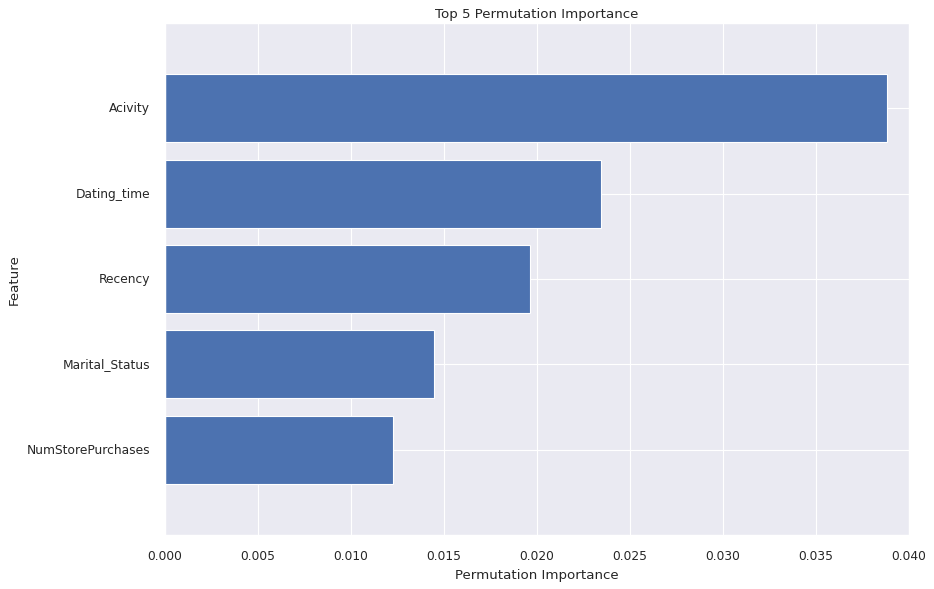

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.barh(range(5), perm_importance.importances_mean[sorted_idx][-5:], align='center')
plt.yticks(range(5), np.array(X.columns)[sorted_idx][-5:])
plt.title('Top 5 Permutation Importance')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.show()

Мы видим все те же признаки но их места в ранжире поменялись на первом месте активность, помните мы отмечали что если человек отреагировал на 3-4 компании он почти 100% отреагирует и на таргетную маркетинговую компанию - потому что он активный это его стиль жизни

Бустинговые алгоритмы не показывают нам коэфициенты явно как мы сделали с логистической регресиией, но есть ключ к этому черному ящику это SHAP воспользуемся его мощью

In [ ]:
%pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
import shap
explainer = shap.Explainer(cat_boost)
shap_values = explainer(X_test)


Начнем с анализа водопадного графика - он очень крутой!

Посмотрим как повлияли характеристики на предсказание реакции первого клиента из тестовой выборки

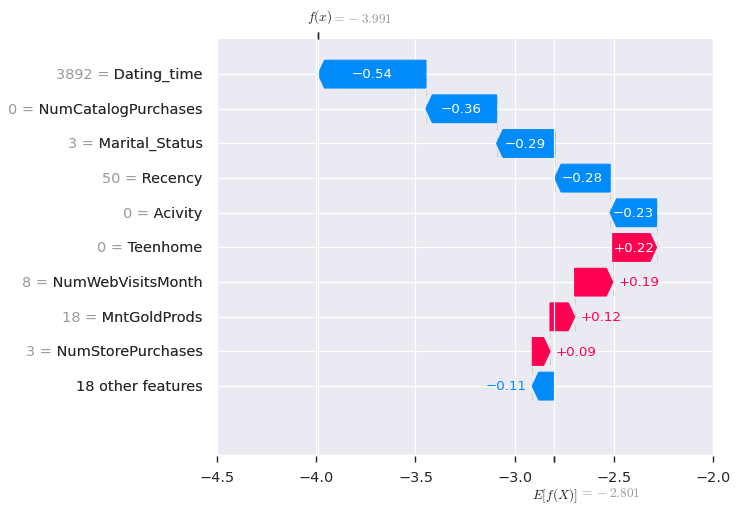

In [ ]:
shap.plots.waterfall(shap_values[0])

Мы видим что показатель 3892 сильно отодвинул нашего клиента в строну 0, равно как и его семейный статус и отсутствие активной реакции на маркетинг, а вот то что у него нет детей подвинул в плюс

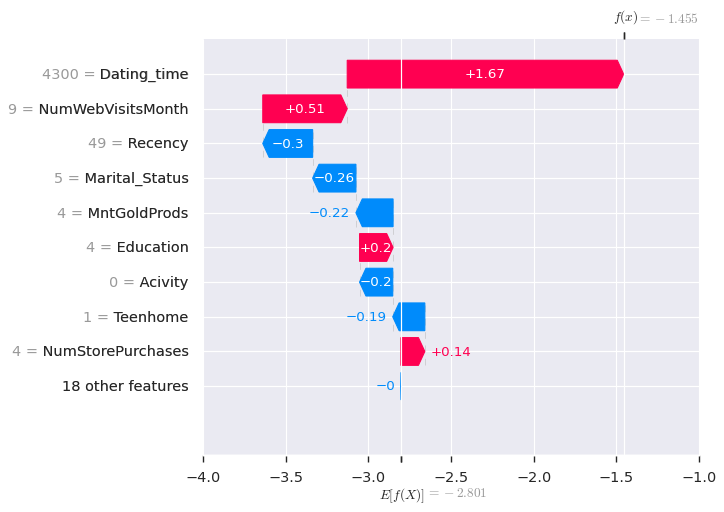

In [ ]:
shap.plots.waterfall(shap_values[98])

А вот для этого клиента мы видим что с момента его регистарции прошло дольше времени и это алгоритм понял что мол он старый клиент и это увеличивает вероятнсоть его положительного отклика на компанию, плюс он активно заказывает по сети тоже двигает в сторону 1, значит пользовалтели которые активно заказывают по сети видимо видят много таргетной рекламы и охотнее откликаются на маркетинговые компании. То же самое как и в случае с логистической регрессией показатель сколько времени прошло с момента последнего взаимодействия важен, чем он больше тем больше отодвигает суммарнуй скор к 0

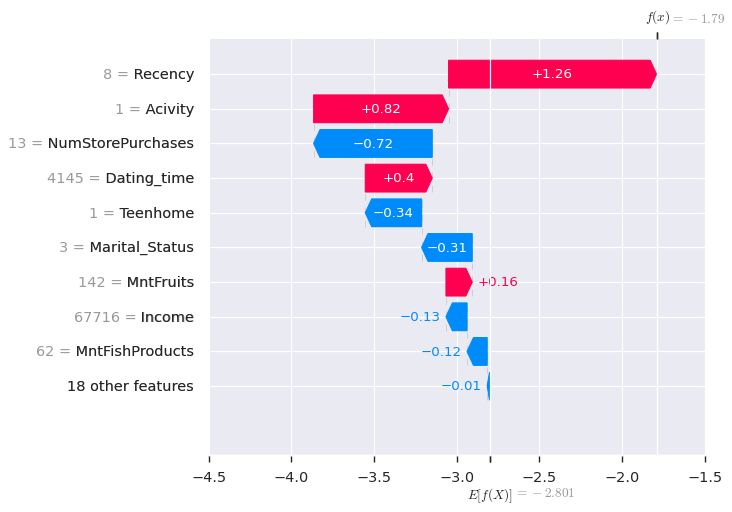

In [ ]:
shap.plots.waterfall(shap_values[49])

А вот хороший пример челокек последнюю покупку совершал 8 дней назад - это очень сильно толкает скор в сторону плюса, он реагировал 1 компанию и это снова толкает скор сторону 1, а вот его любовь к магазинам все отталкивает назад

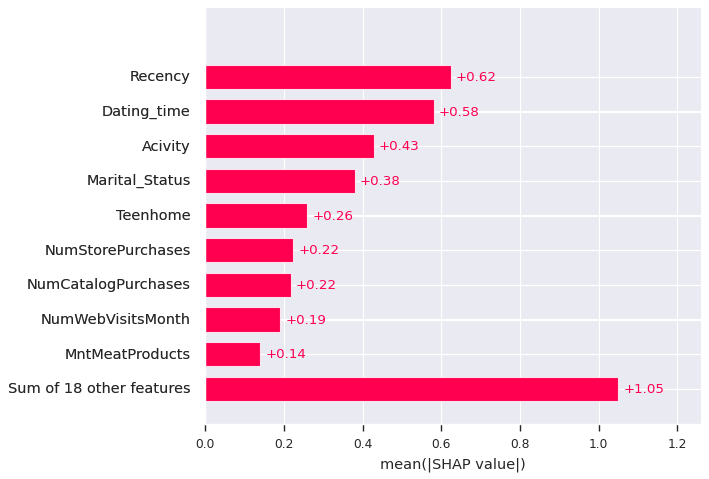

In [ ]:
shap.plots.bar(shap_values)

Вот совокупный график значимости признаков для SHAP, мы видим в лидерах все те же признаки, но отмечаем про себя что на 18 оставшихся непоименовынными приходится 1 это значит что их нельзя просто дропнуть, хотя мы попроьбуем)

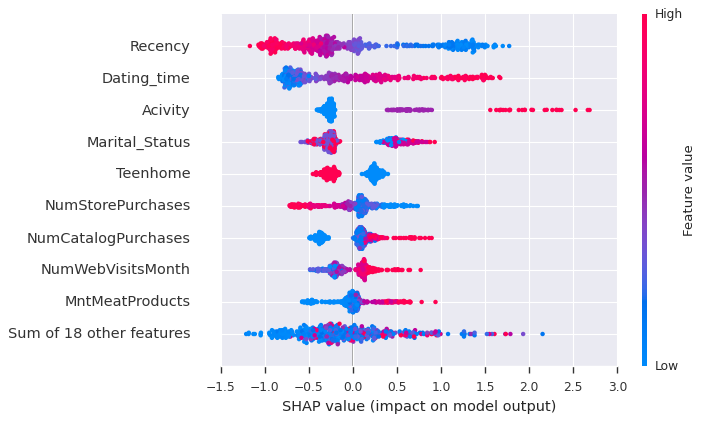

In [ ]:
shap.plots.beeswarm(shap_values)

А вот это максимально крутой график он суммируем все те выводы что мы озвучивали. Итак первый признак сколько прошло с момента последней покупки - чем меньше тем больше шанс положительной реакции на компанию (красненькие слева), далее как долго клиент с нами - чем дольше тем лучше (красненькие справа), чем больше человек проявлял активность тем лучше (красные справа), супружеский статус хаотичен, количество тинейджеров чем меньше тем больше шанс отклика (людям с тинейджерами видимо не до этого), чем меньше покупок в магазинах тем лучше для нас как представителей продвиждения маркетинга, наоборот чем больше человек посещает сайт тем лучше и удивительно те кто покупают мясо с большей готовностью откликаются на маркетинговую компанию

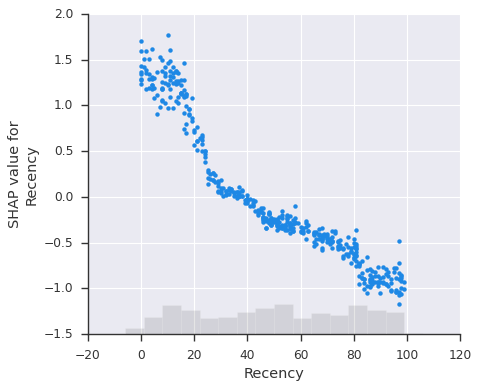

In [ ]:
shap.plots.scatter(shap_values[:,"Recency"])

А вот вариат визуализации одног опризнака - обратим внимание какой четки тренд у озвученного признака сколько прошло с последней покупки

ПО СУТИ МЫ ОПИСАЛИ КЛАСТЕРЫ НАШИХ КЛИЕНТОВ ИСПОЛЬЗУЯ ЗНАЧИМОСТЬ ПРИЗНАКОВ МОДЕЛИ!!!

Ну положено 3 значит 3 обучим еще и Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Создание и обучение модели RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf_rf.fit(X_train, y_train)

# Получение предсказаний
y_pred_rf = clf_rf.predict(X_test)

# Оценка точности модели
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.8794642857142857


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       381
           1       0.70      0.34      0.46        67

    accuracy                           0.88       448
   macro avg       0.80      0.66      0.70       448
weighted avg       0.86      0.88      0.86       448



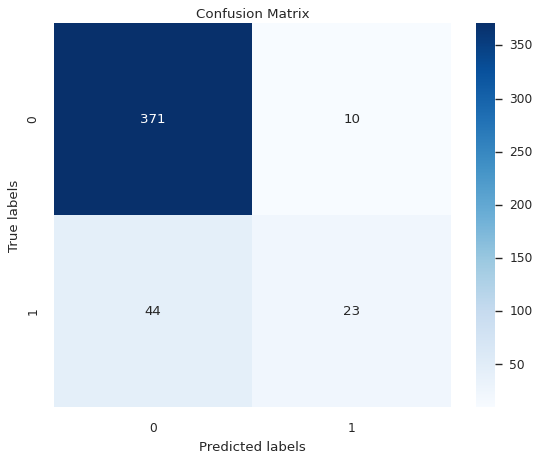

In [ ]:
# Вывод отчета о классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Мы видим что случайный лес оказался существенно хуже CatBoost и даже нашей простой логистической регрессии.

In [ ]:
from xgboost import XGBClassifier

# Создание и обучение модели XGBoost с учетом категориальных признаков
xgb = XGBClassifier(random_state=42, objective='binary:logistic',
                    eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train, y_train)

# Получение предсказаний
y_pred_xgb = xgb.predict(X_test)

# Оценка точности модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)


Accuracy: 0.8816964285714286


Но настало время эксперимента. Попробуем оставить толкько самые знамымые признаки, которые мы выявили и попробуем обучить на них catboost

In [ ]:
X.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Age', 'Dating_time', 'Acivity', 'Total_spend'],
      dtype='object')

In [ ]:
X_cut = X[['Teenhome', 'Marital_Status', 'Recency', 'MntMeatProducts', 'NumCatalogPurchases',
           'NumStorePurchases', 'NumWebVisitsMonth', 'Dating_time', 'Acivity']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cut, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
cat_features_cut = ['Marital_Status']

In [ ]:
cat_boost = CatBoostClassifier(random_state=42,
                           cat_features=cat_features_cut,
                           thread_count=-1)
cat_boost.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=100, plot=False,
          early_stopping_rounds=100)

Learning rate set to 0.03658
0:	learn: 0.6601786	test: 0.6608896	best: 0.6608896 (0)	total: 8.06ms	remaining: 8.05s
100:	learn: 0.2093603	test: 0.2762360	best: 0.2762360 (100)	total: 925ms	remaining: 8.23s
200:	learn: 0.1625664	test: 0.2660385	best: 0.2651567 (194)	total: 1.84s	remaining: 7.31s
300:	learn: 0.1305381	test: 0.2647390	best: 0.2634016 (225)	total: 2.86s	remaining: 6.64s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2634015572
bestIteration = 225

Shrink model to first 226 iterations.


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       381
           1       0.72      0.39      0.50        67

    accuracy                           0.89       448
   macro avg       0.81      0.68      0.72       448
weighted avg       0.87      0.89      0.87       448



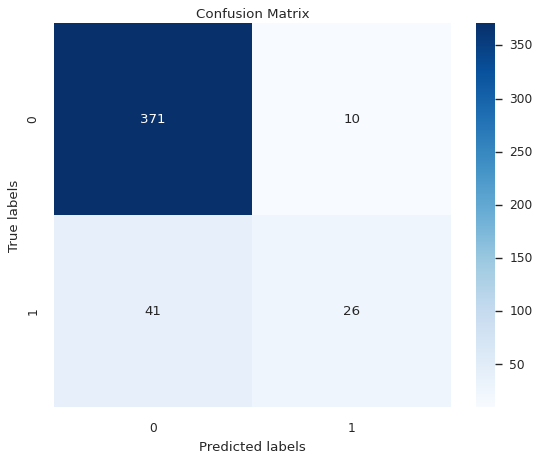

In [ ]:
# Модельная предсказания
y_pred_cat = cat_boost.predict(X_test)

# Вывод отчета о классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_cat))

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_cat)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Мы получили скор чуть хуже чем со всеми признаками, но совсем не много, это означает что на оставшуюся часть приходится совсем немного и это дает нам возможность сделать выводы

### Обоснование лучшей модели

`Напишите обоснование в свободной форме`.

Лучшей моделью по результатам экспериментов мы признаем CatBoost, она дала нам точность 90% и что немаловажно - понимание действительно важных характеристик. Ну и плюс мы обогнали по скору все серебрянные и бронзовые демо-коды на Kaggle. Мы видим что используя только выделенные нами характеристики мы получаем точность выше чем у всех других моделей (кроме полного catboost). Важно такую модель нельзя отдавать в прод, она пропускает сущесвтенную часть клиентов которые готовы реагировать на компанию, но в то же время довольно точно отмечает тех кто не с нами. Наша основная модель показала что мы ошиблись только в 6 случаях причислив клиента к тем кто отреагирует на компанию и ошиблись. На Recall для 0 класса - 0,98 это очень хорошо. То есть отрицательный результат это тоже результат мы точно можем предсказывать что вот этот не отреагирует и мы знаем какие признаки и как на это влияют. Мы можем инвертировать цель и отдать результат маркетологам. И сказать что то типа ребята если мы видим что челокек ранее на нас не реагировал или очень давно не совершал покупок или склонен к покупкам магазине - то скорее всего он не обратит внимания на нашу компанию. Ну и естественно все это подробнее и красиво описать и будет неплохо. Хорошие маркетологи и продуктовые аналитики знают что с этим сделать